<a href="https://colab.research.google.com/github/lizbeth-cortes/Data_science/blob/main/Proyecto_del_m%C3%B3dulo_2_Hipertensi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto de Ciencias de datos

Integrantes:
- Lizbeth Cortés León
- María del Carmen García Galindo
- Laura Paola Reyes Montoya
- Josefa Francisco Hernández


##Módulo 1. Procesamiento de datos con Python

### Problemática
La hipertensión arterial es un problema de salud global que afecta a un gran número de personas. La comprensión de los factores que contribuyen a su desarrollo es esencial para la prevención y el manejo de esta condición. En este estudio, buscamos explorar la relación entre diversos parámetros de salud, como niveles de colesterol, glucosa, medidas antropométricas y otros indicadores, y el riesgo de hipertensión en una población específica. Al identificar patrones y asociaciones, se pretende mejorar la comprensión de los factores de riesgo y contribuir a estrategias más efectivas para la gestión de la hipertensión.

###Planteamiento de preguntas
- ¿Cuál es la distribución del riesgo de hipertensión en la población?
- ¿Hay diferencias significativas en los niveles de riesgo de hipertensión entre hombres y mujeres?
- ¿Cómo afectan la edad, el IMC y la actividad física al riesgo de hipertensión?
- ¿Hay alguna relación entre la cantidad de horas de sueño y el riesgo de hipertensión?
- ¿Cómo se distribuye el riesgo de hipertensión en función de la actividad física total?
- ¿Existe una correlación entre los niveles de tensión arterial y la concentración de hemoglobina?
- ¿Hay alguna relación entre la tensión arterial y los niveles de colesterol (HDL, LDL, total)?
- ¿Existen diferencias significativas en los niveles de ácido úrico, glucosa, colesterol, etc., entre aquellos con y sin hipertensión?
- ¿Existe algún patrón entre las personas que tienen hipertensión?


###Recolección de datos
El conjunto de datos que se utilizará a continuación provienen de la plataforma de Kaggle, el cual se llama [Hipertension Arterial Mexico Data Set](https://www.kaggle.com/datasets/frederickfelix/hipertensin-arterial-mxico) (Hipertensión arterial en México).

Para empezar con el análisis de datos, primero debemos de importar las librerías que utilizaremos:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

Se utilizó la biblioteca pandas de Python para leer el archivo CSV desde una URL y cargarlo en un DataFrame. No se utilizó el dataset desde Kaggle, preferimos descargarlo y almacenarlo en un repositorio público en github.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/lizbeth-cortes/Data_science/main/Hipertension_Arterial_Mexico.csv",index_col=0)

A continuación se solicitó ver las primeras 10 filas del DataFrame df. Esto es útil para obtener una vista previa rápida de los datos y entender cómo se estructura el conjunto de datos

In [ ]:
df.head(10)

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
FOLIO_I,,,,,,,,,,,,,,,,,,,,,
2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,222.2,107,4,32.889389,120,1
2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,222.2,117,5,26.265339,275,1
2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0
2022_01001017,2,70,14.2,22,4.8,4.0,34,86.0,139,0.58,...,96.00,150.0,47.5,41.0,222.2,149,3,1.000000,775,0
2022_01001024,2,30,13.8,15,4.6,3.8,42,84.0,139,0.65,...,64.70,154.0,48.5,33.5,222.2,119,2,39.031773,300,1
2022_01001034,2,29,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,222.2,113,3,24.741058,600,1
2022_01001036,1,58,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,222.2,102,4,25.411527,740,1


Este dataframe tiene 4363 registros en total, y contiene 35 columnas que describen detalles de las variables relacionadas a la hipertensión.

In [ ]:
df.shape

(4363, 35)

Esto es lo que representa cada columna del dataset:
- FOLIO_I: Número de identificación único asignado a cada registro.
- sexo: Género del individuo (1 para masculino, 2 para femenino).
- edad: Edad del individuo (años).
- concentracion_hemoglobina: Concentración de hemoglobina en la sangre (g/dL).
- temperatura_ambiente: Temperatura ambiente registrada durante la medición (grados Celsius).
- valor_acido_urico: Valor del ácido úrico en la sangre (mg/dL).
- valor_albumina: Valor de la albúmina en la sangre (g/dL).
- valor_colesterol_hdl: Valor del colesterol de lipoproteínas de alta densidad (HDL) en la sangre (mg/dL). También conocido como "colesterol bueno".
- valor_colesterol_ldl: Valor del colesterol de lipoproteínas de baja densidad (LDL) en la sangre (mg/dL). tambien es conocido como "colesterol malo".
- valor_colesterol_total: Valor total del colesterol en la sangre (mg/dL). Incluye el colesterol HDL y LDL.
- valor_creatina: Valor de la creatinina en la sangre (mg/dL).
- resultado_glucosa: Resultado de la medición de glucosa (mg/dL).
- valor_insulina: Valor de la insulina en la sangre (µU/mL).
- valor_trigliceridos: Valor de los triglicéridos en la sangre (mg/dL).
- resultado_glucosa_promedio: Resultado promedio de la medición de glucosa (mg/dL).
- valor_hemoglobina_glucosilada: Valor de la hemoglobina glucosilada en la sangre (%).
- valor_ferritina: Valor de la ferritina en la sangre (ng/mL), una proteína que almacena hierro.
- valor_folato: Valor del folato en la sangre (ng/mL), una vitamina B.
- valor_homocisteina: Valor de la homocisteína en la sangre (µmol/L).
- valor_proteinac_reactiva: Valor de la proteína C reactiva en la sangre (mg/L), un marcador de inflamación.
- valor_transferrina: Valor de la transferrina en la sangre (mg/dL).
- valor_vitamina_bdoce: Valor de la vitamina B12 en la sangre (pg/mL).
- valor_vitamina_d: Valor de la vitamina D en la sangre (ng/mL).
- peso: Peso del individuo (kg).
- estatura: Altura del individuo (cm).
- medida_cintura: Medida de la circunferencia de la cintura (cm).
- segundamedicion_peso: Segunda medición de peso (kg).
- segundamedicion_estatura: Segunda medición de altura (cm).
- distancia_rodilla_talon: Distancia entre la rodilla y el talón (cm).
- circunferencia_de_la_pantorrilla: Circunferencia de la pantorrilla (cm).
- segundamedicion_cintura: Segunda medición de la circunferencia de la cintura (cm).
- tension_arterial: Medición de la tensión arterial (mmHg).
- sueno_horas: Número de horas de sueño (horas).
- masa_corporal: Masa corporal del individuo (kg/m²).
- actividad_total: Nivel total de actividad física.
- riesgo_hipertension: Indicador de riesgo de hipertensión (1 para riesgo, 0 para no riesgo).

###Verificación de los nombres de las columnas

In [ ]:
df.columns

Index(['sexo', 'edad', 'concentracion_hemoglobina', 'temperatura_ambiente',
       'valor_acido_urico', 'valor_albumina', 'valor_colesterol_hdl',
       'valor_colesterol_ldl', 'valor_colesterol_total', 'valor_creatina',
       'resultado_glucosa', 'valor_insulina', 'valor_trigliceridos',
       'resultado_glucosa_promedio', 'valor_hemoglobina_glucosilada',
       'valor_ferritina', 'valor_folato', 'valor_homocisteina',
       'valor_proteinac_reactiva', 'valor_transferrina',
       'valor_vitamina_bdoce', 'valor_vitamina_d', 'peso', 'estatura',
       'medida_cintura', 'segundamedicion_peso', 'segundamedicion_estatura',
       'distancia_rodilla_talon', 'circunferencia_de_la_pantorrilla',
       'segundamedicion_cintura', 'tension_arterial', 'sueno_horas',
       'masa_corporal', 'actividad_total', 'riesgo_hipertension'],
      dtype='object')

Se consideró que los nombres de las columnas del dataset representaban adecuadamente los valores de los datos y también el formato del nombre era correcto, sin embargo los nombres son algo largos, por lo que se modificó esa parte utilizando un diccionario y la función **rename**.

In [ ]:
columnas_renombradas={
    'concentracion_hemoglobina' : 'conc_hgb',
    'temperatura_ambiente' : 'temp_amb',
    'valor_acido_urico': 'urac',
    'resultado_glucosa' : 'glc_res',
    'valor_albumina': 'alb',
    'valor_colesterol_hdl' : 'c_hdl',
    'valor_colesterol_ldl' : 'c_ldl',
    'valor_colesterol_total' : 'c_total',
    'valor_creatina': 'cr',
    'valor_insulina': 'ins',
    'valor_trigliceridos' : 'tg',
    'resultado_glucosa_promedio' : 'glc_prom',
    'valor_hemoglobina_glucosilada' : 'hgb_gluc',
    'circunferencia_de_la_pantorrilla' : 'circun_pantorrilla',
    'valor_ferritina' : 'ferritina',
    'valor_folato' : 'folato',
    'valor_homocisteina' : 'hc',
    'valor_proteinac_reactiva' : 'prc',
    'valor_transferrina' : 'tf',
    'valor_vitamina_bdoce' : 'vitamina_b12',
    'valor_vitamina_d' : 'vitamina_d',
    'segundamedicion_peso' : '2da_peso',
    'segundamedicion_estatura' : '2da_est',
    'segundamedicion_cintura' : '2da_cintura',
    'distancia_rodilla_talon' : 'dist_rodilla_talon',
    'actividad_total' : 'act_total',
    'riesgo_hipertension' : 'riesgo_hta',
    'sueno_horas' : 'sueno_hrs',
    'tension_arterial':'pa',
    'masa_corporal' : 'imc'
}

In [ ]:
df.rename(columns=columnas_renombradas, inplace=True)

In [ ]:
df.head()

,sexo,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,...,2da_peso,2da_est,dist_rodilla_talon,circun_pantorrilla,2da_cintura,pa,sueno_hrs,imc,act_total,riesgo_hta
FOLIO_I,,,,,,,,,,,,,,,,,,,,,
2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,222.2,107,4,32.889389,120,1
2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,222.2,117,5,26.265339,275,1
2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


###Verificación de los tipos de datos

In [ ]:
df.dtypes

sexo                    int64
edad                    int64
conc_hgb              float64
temp_amb                int64
urac                  float64
alb                   float64
c_hdl                   int64
c_ldl                 float64
c_total                 int64
cr                    float64
glc_res               float64
ins                   float64
tg                      int64
glc_prom                int64
hgb_gluc              float64
ferritina             float64
folato                float64
hc                    float64
prc                   float64
tf                    float64
vitamina_b12          float64
vitamina_d            float64
peso                  float64
estatura              float64
medida_cintura        float64
2da_peso              float64
2da_est               float64
dist_rodilla_talon    float64
circun_pantorrilla    float64
2da_cintura           float64
pa                      int64
sueno_hrs               int64
imc                   float64
act_total 

Se puede observar que todas las columnas tienen los tipos de datos float64 e int64. Sin embargo, las variables *sexo* y *riesgo_hta* son variables categóricas, por lo que usaremos el siguiente código para la respectiva conversión:

In [ ]:
df['sexo'] = df['sexo'].astype('category')
df['riesgo_hta'] = df['riesgo_hta'].astype('category')

In [ ]:
df.dtypes

sexo                  category
edad                     int64
conc_hgb               float64
temp_amb                 int64
urac                   float64
alb                    float64
c_hdl                    int64
c_ldl                  float64
c_total                  int64
cr                     float64
glc_res                float64
ins                    float64
tg                       int64
glc_prom                 int64
hgb_gluc               float64
ferritina              float64
folato                 float64
hc                     float64
prc                    float64
tf                     float64
vitamina_b12           float64
vitamina_d             float64
peso                   float64
estatura               float64
medida_cintura         float64
2da_peso               float64
2da_est                float64
dist_rodilla_talon     float64
circun_pantorrilla     float64
2da_cintura            float64
pa                       int64
sueno_hrs                int64
imc     

In [ ]:
#También se va a cambiar los valores de los datos
#mediante un diccionario y el método replace
mapeo_sexo = {1: 'M', 2: 'F'}
mapeo_riesgo = {0: 'No', 1: 'Si'}
df['sexo'] = df['sexo'].replace(mapeo_sexo)
df['riesgo_hta'] = df['riesgo_hta'].replace(mapeo_riesgo)
df

,sexo,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,...,2da_peso,2da_est,dist_rodilla_talon,circun_pantorrilla,2da_cintura,pa,sueno_hrs,imc,act_total,riesgo_hta
FOLIO_I,,,,,,,,,,,,,,,,,,,,,
2022_01001004,F,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,222.2,107,4,32.889389,120,Si
2022_01001009,F,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,No
2022_01001012,F,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,No
2022_01001013,M,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,222.2,117,5,26.265339,275,Si
2022_01001015,F,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022_32056019,F,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,No
2022_32056024,M,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,222.2,130,4,19.193721,780,No
2022_32056026,F,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,71.20,148.6,47.2,38.0,222.2,147,4,1.000000,300,No


###Tratamiento de valores nulos

Primero se verificará si el dataset contiene datos o registros nulos, ejecutando la siguiente línea de código:

In [ ]:
df.isna().sum()

sexo                  0
edad                  0
conc_hgb              0
temp_amb              0
urac                  0
alb                   0
c_hdl                 0
c_ldl                 0
c_total               0
cr                    0
glc_res               0
ins                   0
tg                    0
glc_prom              0
hgb_gluc              0
ferritina             0
folato                0
hc                    0
prc                   0
tf                    0
vitamina_b12          0
vitamina_d            0
peso                  0
estatura              0
medida_cintura        0
2da_peso              0
2da_est               0
dist_rodilla_talon    0
circun_pantorrilla    0
2da_cintura           0
pa                    0
sueno_hrs             0
imc                   0
act_total             0
riesgo_hta            0
dtype: int64

Afortunadamente, se observó que no hay valores nulos y por lo tanto no se tendrá que modificar el dataset en ese aspecto. Y por otro lado, aunque la columna de *FOLIO_I* simplemente es un identificador de registros y no va a influir en lo más mínimo en el análisis, se puede resetear el índice, simplemente para fines prácticos:

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df

,sexo,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,...,2da_peso,2da_est,dist_rodilla_talon,circun_pantorrilla,2da_cintura,pa,sueno_hrs,imc,act_total,riesgo_hta
0,F,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,222.2,107,4,32.889389,120,Si
1,F,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,No
2,F,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,No
3,M,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,222.2,117,5,26.265339,275,Si
4,F,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,F,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,No
4359,M,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,222.2,130,4,19.193721,780,No
4360,F,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,71.20,148.6,47.2,38.0,222.2,147,4,1.000000,300,No
4361,M,67,17.6,14,5.5,4.0,44,96.0,171,0.80,...,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240,No


### Relevancia de columnas
Finalmente, para dejar el dataset limpio, se debe de analizar la relevancia de las 36 columnas, y determinar qué columnas serán de utilidad en el análisis, por ende se deberá eliminar las columnas que se consideren redundantes o irrelevantes.

Las columnas que se eliminarán son las siguientes:
- *dist_rodilla_talon* y *circunferencia_de_la_pantorrilla*: Esta medida puede ser relevante en ciertos contextos médicos, pero no se ha establecido ampliamente como un factor de riesgo para la hipertensión.

- *peso*, *estatura*, *medida_cintura*, *2da_medida_peso*, *2da_medida_estatura*, *2da_medida_cintura*: Dado que ya se está utilizando el índice de masa corporal (IMC) como medida general de la composición corporal, estas medidas adicionales pueden considerarse redundantes y no agregarían información sustancial adicional al análisis.

- *vitamina_bdoce* y *vitamina_d*: Aunque pueden tener implicaciones en la salud general, su relación específica con la hipertensión puede no ser tan evidente.


Para eliminar las 10 columnas que no consideramos relevantes se utilizará una lista y la función **drop**.

In [ ]:
columnas_a_eliminar = ['dist_rodilla_talon', 'circun_pantorrilla', 'peso', 'estatura',
                       'medida_cintura', '2da_peso', '2da_est',
                       '2da_cintura','vitamina_b12', 'vitamina_d']

Se guardará el dataframe original en caso de que cambiemos de opinión más adelante y necesitemos usarlo. Mientras tanto ser creará un nuevo dataframe en el que se guardará el dataset con las columnas eliminadas:

In [ ]:
#El parámetro axis=1 indica que se está eliminando columnas en lugar de filas.
df_drop = df.drop(columnas_a_eliminar, axis=1)

In [ ]:
# Se muestra el dataframe con las columnas eliminados
df_drop.head(10)

,sexo,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,...,ferritina,folato,hc,prc,tf,pa,sueno_hrs,imc,act_total,riesgo_hta
0,F,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,107,4,32.889389,120,Si
1,F,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,2.7,23.4,4.90,0.02,1.1,104,2,1.000000,240,No
2,F,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,105,1,1.000000,480,No
3,M,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,2.7,23.4,4.90,0.02,1.1,117,5,26.265339,275,Si
4,F,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,2.7,23.4,4.90,0.02,1.1,123,2,1.000000,255,No
5,F,70,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,149,3,1.000000,775,No
6,F,30,13.8,15,4.6,3.8,42,84.0,139,0.65,...,44.0,10.6,6.94,2.38,1.1,119,2,39.031773,300,Si
7,F,29,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,113,3,24.741058,600,Si
8,M,58,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,102,4,25.411527,740,Si
9,F,62,14.5,9,4.4,3.8,44,133.0,236,0.66,...,2.7,23.4,4.90,0.02,1.1,111,2,1.000000,150,Si


In [ ]:
df_drop.columns

Index(['sexo', 'edad', 'conc_hgb', 'temp_amb', 'urac', 'alb', 'c_hdl', 'c_ldl',
       'c_total', 'cr', 'glc_res', 'ins', 'tg', 'glc_prom', 'hgb_gluc',
       'ferritina', 'folato', 'hc', 'prc', 'tf', 'pa', 'sueno_hrs', 'imc',
       'act_total', 'riesgo_hta'],
      dtype='object')

##Módulo 2: Análisis de datos con Python

### 2.1 Estimados de locación y variabilidad
1. Identifica las columnas de tu dataset que tengan datos numéricos.


In [ ]:
columnas_numericas = df_drop.select_dtypes(include='number').columns

In [ ]:
print("Columnas Numéricas:")
print(columnas_numericas)

Columnas Numéricas:
Index(['edad', 'conc_hgb', 'temp_amb', 'urac', 'alb', 'c_hdl', 'c_ldl',
       'c_total', 'cr', 'glc_res', 'ins', 'tg', 'glc_prom', 'hgb_gluc',
       'ferritina', 'folato', 'hc', 'prc', 'tf', 'pa', 'sueno_hrs', 'imc',
       'act_total'],
      dtype='object')


> Hay 23 columnas del dataframe **df_drop** que contienen datos numéricos. Pero las columnas de *sexo* y *riesgo_hta* son datos categoricos binarios, por lo que no tiene sentido obtener sus medidas estadísticas. Por lo tanto no serán utilizadas para esta parte del análisis.


In [ ]:
#Creación de un nuevo dataframe sólo con las variables numéricas
df_numericas = df_drop.select_dtypes(include='number')

In [ ]:
df_numericas.head()

,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,glc_res,...,hgb_gluc,ferritina,folato,hc,prc,tf,pa,sueno_hrs,imc,act_total
0,41,14.2,22,4.8,4.0,34,86.0,139,0.58,92.0,...,5.2,2.7,23.4,4.9,0.02,1.1,107,4,32.889389,120
1,65,14.1,9,4.4,3.8,73,130.0,252,0.62,111.0,...,6.2,2.7,23.4,4.9,0.02,1.1,104,2,1.000000,240
2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,92.0,...,5.2,2.7,23.4,4.9,0.02,1.1,105,1,1.000000,480
3,35,15.7,11,6.5,4.1,49,107.0,203,0.91,106.0,...,5.3,2.7,23.4,4.9,0.02,1.1,117,5,26.265339,275
4,65,12.7,7,4.2,4.2,41,76.0,145,0.71,109.0,...,7.0,2.7,23.4,4.9,0.02,1.1,123,2,1.000000,255


**Clasificación de los datos**
- Numéricos:

  - Discretos: edad, sueno_horas, actividad_total
  - Continuos: concentracion_hemoglobina, temperatura_ambiente, valor_acido_urico, valor_albumina, valor_colesterol_hdl, valor_colesterol_ldl, valor_colesterol_total, valor_creatina, resultado_glucosa, valor_insulina, valor_trigliceridos, resultado_glucosa_promedio, valor_hemoglobina_glucosilada, valor_ferritina, valor_folato, valor_homocisteina, valor_proteinac_reactiva, valor_transferrina, tension_arterial, masa_corporal

- Categóricos:
  - Binarios: sexo, riesgo_hipertension


2. Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).



> No hay columnas claramente irrelevantes en este conjunto. Todas parecen tener algún grado de relevancia para el análisis de hipertensión. Las que se consideraron irrelevantes ya fueron eliminadas anteriormente.



3. Obtén los estimados de las columnas numéricas del dataset:


####Media


In [ ]:
#Con la función mean() se puede obtener el promedio de cada columna
df_numericas.mean()

edad          47.315609
conc_hgb      14.228581
temp_amb      21.385973
urac           4.787302
alb            3.868966
c_hdl         36.030254
c_ldl         87.809489
c_total      144.138895
cr             0.614573
glc_res       96.894660
ins            6.735824
tg           137.269769
glc_prom     110.314921
hgb_gluc       5.452074
ferritina      7.654075
folato        22.689411
hc             5.220252
prc            0.092551
tf             1.131561
pa           130.372221
sueno_hrs      3.239972
imc           22.452024
act_total    481.815265
dtype: float64

####Mediana

In [ ]:
#Con la función median() se puede obtener el promedio de cada columna
df_numericas.median()

edad          48.000000
conc_hgb      14.200000
temp_amb      22.000000
urac           4.800000
alb            4.000000
c_hdl         34.000000
c_ldl         86.000000
c_total      139.000000
cr             0.580000
glc_res       92.000000
ins            4.000000
tg           123.000000
glc_prom     103.000000
hgb_gluc       5.200000
ferritina      2.700000
folato        23.400000
hc             4.900000
prc            0.020000
tf             1.100000
pa           121.000000
sueno_hrs      3.000000
imc           26.229298
act_total    380.000000
dtype: float64

####Media Truncada

In [ ]:
from scipy import stats

In [ ]:
media_truncada = df_numericas.apply(lambda col: stats.trim_mean(col, 0.1))

In [ ]:
print(media_truncada)

edad          47.583787
conc_hgb      14.220940
temp_amb      21.910914
urac           4.774964
alb            3.957147
c_hdl         34.765970
c_ldl         86.556860
c_total      140.934976
cr             0.590877
glc_res       91.872529
ins            4.770868
tg           124.838728
glc_prom     103.955027
hgb_gluc       5.236408
ferritina      2.859189
folato        23.388026
hc             4.910687
prc            0.022733
tf             1.100000
pa           123.251217
sueno_hrs      3.219135
imc           23.121514
act_total    404.658837
dtype: float64


####Desviación estándar

In [ ]:
df_numericas.std()

edad          14.445572
conc_hgb       1.149723
temp_amb       3.165974
urac           0.820317
alb            0.450879
c_hdl          8.082762
c_ldl         17.530104
c_total       28.228483
cr             0.200610
glc_res       45.586604
ins            9.802020
tg            77.745749
glc_prom      32.608347
hgb_gluc       1.008764
ferritina     24.600637
folato         4.171522
hc             1.378957
prc            0.362897
tf             0.374687
pa            73.881644
sueno_hrs      2.778287
imc           12.314528
act_total    673.702857
dtype: float64

####Rango


In [ ]:
columna_rangos = df_numericas.apply(lambda col: col.max() - col.min())

In [ ]:
print(columna_rangos)

edad            89.000000
conc_hgb        14.400000
temp_amb        33.000000
urac            10.800000
alb              4.300000
c_hdl          270.000000
c_ldl          291.900000
c_total        641.000000
cr               8.210000
glc_res       2361.600000
ins            263.500000
tg            1297.000000
glc_prom      1049.000000
hgb_gluc        13.300000
ferritina      612.500000
folato         148.800000
hc              48.440000
prc             10.760000
tf              16.100000
pa             919.000000
sueno_hrs       98.000000
imc             59.513476
act_total    17810.000000
dtype: float64


####Percentiles

In [ ]:
df_numericas.min()

edad          4.00
conc_hgb      5.50
temp_amb      2.00
urac          0.20
alb           1.00
c_hdl         9.00
c_ldl        11.10
c_total      40.00
cr            0.06
glc_res      10.40
ins           0.60
tg           23.00
glc_prom     65.00
hgb_gluc      3.90
ferritina     0.70
folato        4.20
hc            1.56
prc           0.02
tf            0.10
pa           80.00
sueno_hrs     1.00
imc           1.00
act_total    10.00
dtype: float64

In [ ]:
df_numericas.max()

edad            93.000000
conc_hgb        19.900000
temp_amb        35.000000
urac            11.000000
alb              5.300000
c_hdl          279.000000
c_ldl          303.000000
c_total        681.000000
cr               8.270000
glc_res       2372.000000
ins            264.100000
tg            1320.000000
glc_prom      1114.000000
hgb_gluc        17.200000
ferritina      613.200000
folato         153.000000
hc              50.000000
prc             10.780000
tf              16.200000
pa             999.000000
sueno_hrs       99.000000
imc             60.513476
act_total    17820.000000
dtype: float64

In [ ]:
df_numericas.quantile([0.25, 0.5, 0.75])

,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,glc_res,...,hgb_gluc,ferritina,folato,hc,prc,tf,pa,sueno_hrs,imc,act_total
0.25,36.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,92.0,...,5.2,2.7,23.4,4.9,0.02,1.1,111.0,2.0,19.619493,240.0
0.50,48.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,92.0,...,5.2,2.7,23.4,4.9,0.02,1.1,121.0,3.0,26.229298,380.0
0.75,58.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,92.0,...,5.2,2.7,23.4,4.9,0.02,1.1,136.0,4.0,30.285913,585.0


En la mayoría de las variables numéricas nos percatamos que tanto el primer, segundo (mediana) y tercer percentil tienen el mismo valor, esto indica que la mayoría de los datos se concentran alrededor de ese valor específico.

En el contexto de la variable temp_amb (temperatura ambiente), esto sugiere que la temperatura tiende a ser bastante constante y no hay mucha variabilidad en los datos.

####Rango intercuartil

In [ ]:
iqr = df_numericas.quantile(0.75) - df_numericas.quantile(0.25)

In [ ]:
iqr

edad          22.00000
conc_hgb       0.00000
temp_amb       0.00000
urac           0.00000
alb            0.00000
c_hdl          0.00000
c_ldl          0.00000
c_total        0.00000
cr             0.00000
glc_res        0.00000
ins            0.70000
tg             0.00000
glc_prom       0.00000
hgb_gluc       0.00000
ferritina      0.00000
folato         0.00000
hc             0.00000
prc            0.00000
tf             0.00000
pa            25.00000
sueno_hrs      2.00000
imc           10.66642
act_total    345.00000
dtype: float64

El Rango Intercuartílico (IQR) es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) en un conjunto de datos. Al ver los resultados de estos datos, nos percatamos que la mayoría de las variables numéricas o columnas tienen el valor de 0, lo que significa que no hay variación intercuartílica en los datos. En otras palabras, todos los datos están agrupados alrededor de un valor central, y no hay dispersión entre los cuartiles.

### 2.2 Visualización de datos: Distribuciones
Exploración de las distribuciones de las variables numéricas

####Boxplots
Instrucciones: Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.



Anteriormente se observó que para la mayoría de las columnas los valores obtenidos en el rango intercuantílico fueron 0. Y debido a que la caja en realidad es una representación del rango intercuantílico, si el rango es 0 entonces la caja será prácticamente inexistente, lo que indica que la dispersión entre los datos es mínima, o dicho de otro modo, los valores se mantienen constantes.

Por el motivo anterior, sólo utilizaremos las columnas en las que el rango intercuantílico sea mayor a 0.

#####Edad

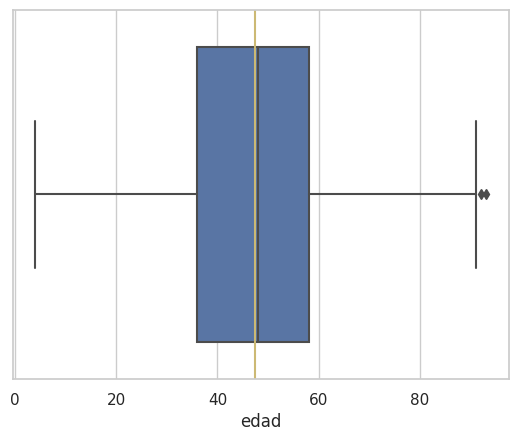

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_numericas['edad'])
plt.axvline(df_numericas['edad'].mean(), c='y')

- La mayoría de nuestros datos están concentrados en valores menores a 60 y que las edades muy altas son anomalías en el conjunto.
- También sabemos que nuestros datos en general no están muy dispersos.
- La media y la mediana casi concuerdan, lo que significa que la distribución de los datos es casi simétrica. Esto sugiere que no hay sesgo significativo hacia valores más altos o más bajos en los datos.


#####Insulina ( picomoles por litro (pmol/L)

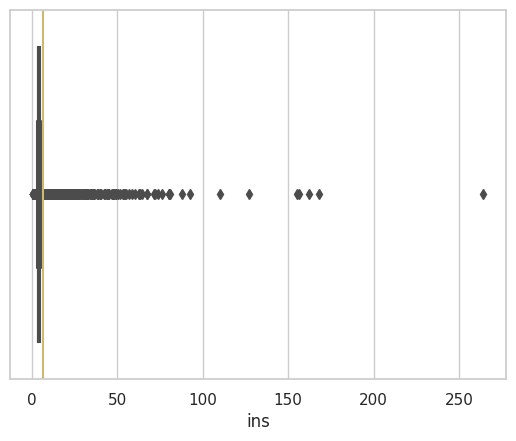

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_numericas['ins'])
plt.axvline(df_numericas['ins'].mean(), c='y')

Debido a que el rango intercuantílico es muy pequeño (0.7), significa que la caja es muy pequeña, casi inexistente; por lo tanto no hay mucha variabilidad en los datos.
Por otro lado, observamos que hay bastantes datos atípicos que exceden el valor de 10 y que se alejan bastante de la media. Eso es muy preocupante.

También hay una "colita" de datos hacia la derecha que se extiende bastante lejos.

#####Tensión arterial

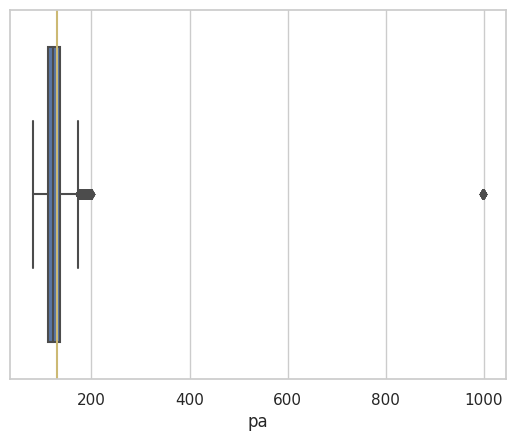

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_numericas['pa'])
plt.axvline(df_numericas['pa'].mean(), c='y')

- En esta gráfica observamos que la mayoría de los datos se concentran en valores menores a 150.
- Los valores atípicos no exceden el valor de 200, pero podemos observar que hay un valor que casi llega al mil. En este caso, lo más probable es que haya habido un error al registrar la presión de un individuo.
- La media es mayor que la mediana, lo que indica que hay valores más altos que están sesgando la distribución hacia arriba.



#####Horas de sueño

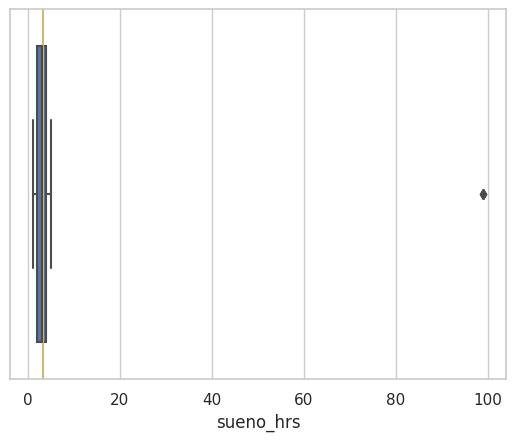

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_numericas['sueno_hrs'])
plt.axvline(df_numericas['sueno_hrs'].mean(), c='y')

- En esta gráfica observamos que la mayoría de los datos se concentran en valores menores a 5.
- Sólo hay un avlor atípico que casi llega a los 100, por lo que es muy probable que haya sido un error de registro.

#####Masa corporal

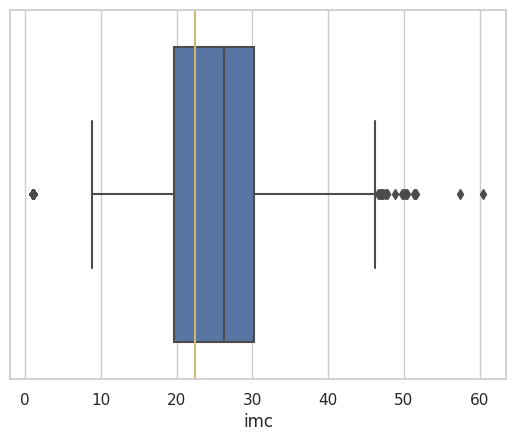

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_numericas['imc'])
plt.axvline(df_numericas['imc'].mean(), c='y')

- Aquí observamos que la mayoría de los datos del imc están concentrados en valores menores a 30.
- Los valores mayores a 45 son anomalías en nuestro conjunto. Además, hay datos con valor 1,en este caso debe de tratarse de un error al realizar el registro, ya que es práctimente imposible obtener este valor.
- Si la mediana es mayor que la media, sugiere que hay valores más bajos que están sesgando la distribución hacia abajo, que en este caso el valor 1 sería lo que provoca el sesgo.



##### Actividad física total

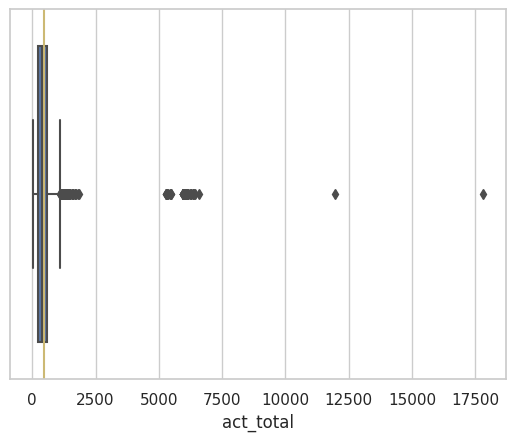

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=df_numericas['act_total'])
plt.axvline(df_numericas['act_total'].mean(), c='y')

- Aquí observamos que la mayoría de los datos están concentrados en valores menores a 1500.
- Los valores mayores a 1500 son anomalías en nuestro conjunto. Se observa que hay una "cola" que tiende hacia la derecha.
- En este caso, la media es mayor que la mediana, por lo tanto, indica que hay valores más altos que están sesgando la distribución hacia arriba


#### Rango Intercuartílico y valores atípicos
- Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.



In [ ]:
#Función para filtrar los valores atípicos
def filtrado(columna):
  p25_3 = columna.quantile(0.25)
  p75_3 =  columna.quantile(0.75)
  #rango intercuartílico
  iqr3 = p75_3 - p25_3
  filtro_inferior3 = columna > p25_3 - (iqr3 * 1.5)
  filtro_superior3 = columna < p75_3 + (iqr3 * 1.5)

  return columna[filtro_inferior3 & filtro_superior3]

In [ ]:
#Función para obtener medianas, medias y desviaciones estándares
def medidas_centrales(columna):
  mediana = columna.median()
  print(f"La mediana es {mediana}")
  #Media
  media= columna.mean()
  print(f"La media es {media}")
  #Desviación estándar
  std = columna.std()
  print(f"La desviación estándar es {std}")


#####Edad

Datos con valores atípicos
La mediana es 48.0
La media es 47.31560852624341
La desviación estándar es 14.445572144284785

Datos sin valores atípicos
La mediana es 48.0
La media es 47.2848623853211
La desviación estándar es 14.40286703346023


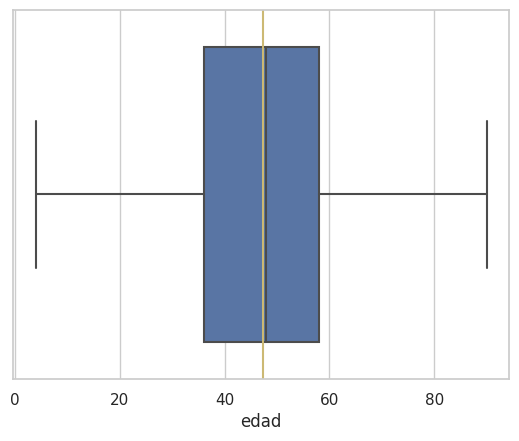

In [ ]:
#Se guarda los datos de la variable numérica
edad_antes=df_numericas['edad']
#Se realiza el filtrado usando la función
edad_despues=filtrado(edad_antes)
# Se imprime los valores de medida central para comparlos
# los datos antes y después del filtrado
print("Datos con valores atípicos")
medidas_centrales(edad_antes)
print("\nDatos sin valores atípicos")
medidas_centrales(edad_despues)

#Se muestra el boxplot con los valores atípicos eliminados
sns.boxplot(x=edad_despues)
plt.axvline(df_numericas['edad'].mean(), c='y')

Al eliminar los valores atípicos, nos percatamos que las medidas centrales casi coinciden, por lo que tiene casi una simetría perfecta.

#####Insulina

Datos con valores atípicos
La mediana es 4.0
La media es 6.73582397432959
La desviación estándar es 9.802019913581468

Datos sin valores atípicos
La mediana es 4.0
La media es 4.03612213740458
La desviación estándar es 0.25595936362882393


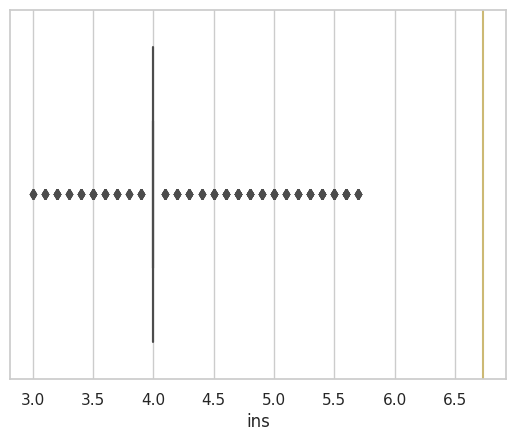

In [ ]:
#Se guarda los datos de la variable numérica
ins_antes=df_numericas['ins']
#Se realiza el filtrado usando la función
ins_despues=filtrado(ins_antes)
# Se imprime los valores de medida central para comparlos
# los datos antes y después del filtrado
print("Datos con valores atípicos")
medidas_centrales(ins_antes)
print("\nDatos sin valores atípicos")
medidas_centrales(ins_despues)

#Se muestra el boxplot con los valores atípicos eliminados
sns.boxplot(x=ins_despues)
plt.axvline(df_numericas['ins'].mean(), c='y')

La media sigue siendo mayor que la mediana incluso después del filtrado, lo que indica que todavía hay valores más altos que están sesgando la distribución hacia arriba.

Y debido a que el rango intercuantílico es muy pequeño, la caja es imperceptible.

##### Presión arterial

Datos con valores atípicos
La mediana es 121.0
La media es 130.37222094888838
La desviación estándar es 73.88164431451159

Datos sin valores atípicos
La mediana es 121.0
La media es 122.9111163782887
La desviación estándar es 17.843078626460372


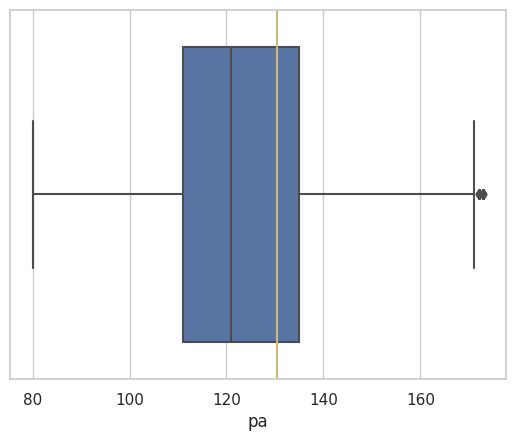

In [ ]:
#Se guarda los datos de la variable numérica
pa_antes=df_numericas['pa']
#Se realiza el filtrado usando la función
pa_despues=filtrado(pa_antes)
# Se imprime los valores de medida central para comparlos
# los datos antes y después del filtrado
print("Datos con valores atípicos")
medidas_centrales(pa_antes)
print("\nDatos sin valores atípicos")
medidas_centrales(pa_despues)

#Se muestra el boxplot con los valores atípicos eliminados
sns.boxplot(x=pa_despues)
plt.axvline(df_numericas['pa'].mean(), c='y')

La media sigue siendo mayor que la mediana, lo que indica que hay valores más altos que están sesgando la distribución hacia arriba.

También podemos ver que la presión arterial no excede de 140 mm/Hg

#####Horas totales de sueño

Datos con valores atípicos
La mediana es 3.0
La media es 3.2399724959889986
La desviación estándar es 2.778287004387446

Datos sin valores atípicos
La mediana es 3.0
La media es 3.1740825688073393
La desviación estándar es 1.1869203182058827


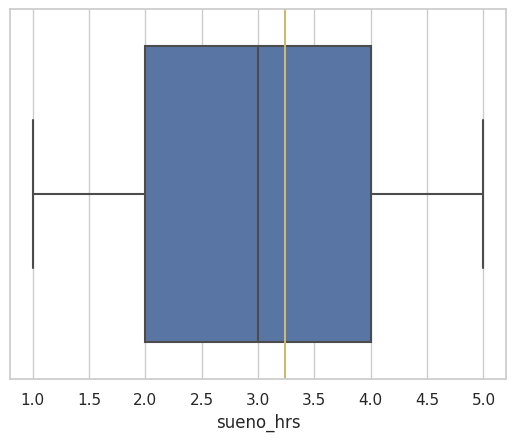

In [ ]:
#Se guarda los datos de la variable numérica
sueno_hrs_antes=df_numericas['sueno_hrs']
#Se realiza el filtrado usando la función
sueno_hrs_despues=filtrado(sueno_hrs_antes)
# Se imprime los valores de medida central para comparlos
# los datos antes y después del filtrado
print("Datos con valores atípicos")
medidas_centrales(sueno_hrs_antes)
print("\nDatos sin valores atípicos")
medidas_centrales(sueno_hrs_despues)

#Se muestra el boxplot con los valores atípicos eliminados
sns.boxplot(x=sueno_hrs_despues)
plt.axvline(df_numericas['sueno_hrs'].mean(), c='y')

Al eliminar el único valor atípico nos podemos dar cuenta que la media se acerca más a la mediana, pero sigue siendo mayor, por lo que todavía hay datos que sesgan la distribución de datos.

#####Índice de masa corporal

Datos con valores atípicos
La mediana es 26.22929759
La media es 22.45202371207678
La desviación estándar es 12.314528159722522

Datos sin valores atípicos
La mediana es 27.935917494999998
La media es 28.22886242883196
La desviación estándar es 5.358474491219452


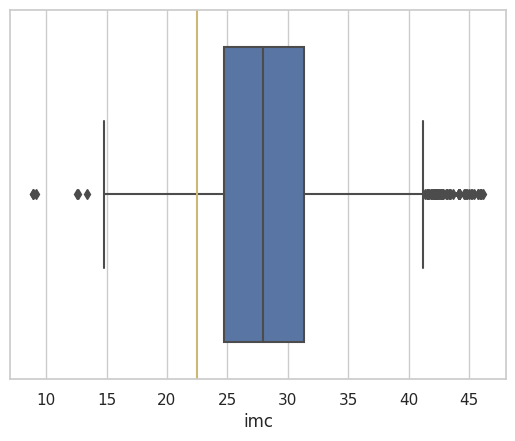

In [ ]:
#Se guarda los datos de la variable numérica
imc_antes=df_numericas['imc']
#Se realiza el filtrado usando la función
imc_despues=filtrado(imc_antes)
# Se imprime los valores de medida central para comparlos
# los datos antes y después del filtrado
print("Datos con valores atípicos")
medidas_centrales(imc_antes)
print("\nDatos sin valores atípicos")
medidas_centrales(imc_despues)

#Se muestra el boxplot con los valores atípicos eliminados

sns.boxplot(x=imc_despues)
plt.axvline(df_numericas['imc'].mean(), c='y')

La mediana sigue siendo mayor que la media, todavía existen valores pequeñosque están sesgando la distribución hacia abajo.

#####Actividad física total

Datos con valores atípicos
La mediana es 380.0
La media es 481.8152647261059
La desviación estándar es 673.7028569444775

Datos sin valores atípicos
La mediana es 375.0
La media es 409.793241023234
La desviación estándar es 231.981039194704


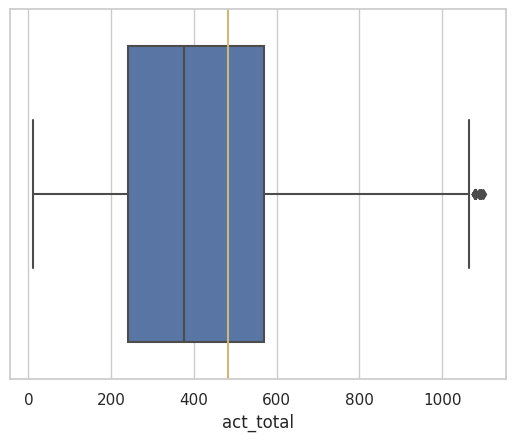

In [ ]:
#Se guarda los datos de la variable numérica
act_antes=df_numericas['act_total']
#Se realiza el filtrado usando la función
act_despues=filtrado(act_antes)
# Se imprime los valores de medida central para comparlos
# los datos antes y después del filtrado
print("Datos con valores atípicos")
medidas_centrales(act_antes)
print("\nDatos sin valores atípicos")
medidas_centrales(act_despues)

#Se muestra el boxplot con los valores atípicos eliminados

sns.boxplot(x=act_despues)
plt.axvline(df_numericas['act_total'].mean(), c='y')

Con la eliminación de varios valores atípicos podemos ver que los datos se concentran  en valores menores a 600 hrs.
La media sigue siendo mayor, por lo que hay datos mayores que sesgan la distribución.

#### Tablas de frecuencias e histogramas
- Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.


Las tablas de frecuencias dividen nuestro conjunto en segmentos de igual tamaño que contiene un número variable de muestras.

Para generar una tabla de frecuencias:
1. Se debe de revisar el rango para decidir en cuántos segmentos vamos a dividir nuestros datos.
2. Se usará el método cut para segmentar los datos de cada columna.

3. Para dividir el dataset por segmentos, se utilizará la función *groupby* y se le pasará cada columna del dataframe.  Después se usará un count para saber cuántas muestras hay en cada grupo.

4. Finalmente se crean los histogramas

Lo anterior se realizará para las las 23 columnas numéricas.

In [ ]:
# Función para obtener todo lo anterior
def info(serie):
  #obtener el rango
  rango = serie.max()-serie.min()
  print (f"El rango es de {rango}")
  #Se realiza la segmentación
  segmentos = pd.cut(serie, 15)
  seg = serie.groupby(segmentos).count()
  print(f"\n La tabla de frecuencias de {seg}")

  #Se grafican los histogramas
  sns.set(style="white")
  sns.histplot(serie, bins=20)

  #Se obtiene el coeficiente de asimetría
  asimetria = skew(serie)
  print(f"\nCoeficiente de asimetría es de {asimetria}")

  # Se obtiene la curtosis
  kurtosis(serie)
  print(f"\nLa curtosis es de {asimetria}\n")


**Edad**

El rango es de 89

 La tabla de frecuencias de edad
(3.911, 9.933]        5
(9.933, 15.867]      12
(15.867, 21.8]      149
(21.8, 27.733]      317
(27.733, 33.667]    406
(33.667, 39.6]      460
(39.6, 45.533]      485
(45.533, 51.467]    708
(51.467, 57.4]      642
(57.4, 63.333]      556
(63.333, 69.267]    469
(69.267, 75.2]       99
(75.2, 81.133]       32
(81.133, 87.067]     17
(87.067, 93.0]        6
Name: edad, dtype: int64

Coeficiente de asimetría es de -0.13022150195711182

La curtosis es de -0.13022150195711182



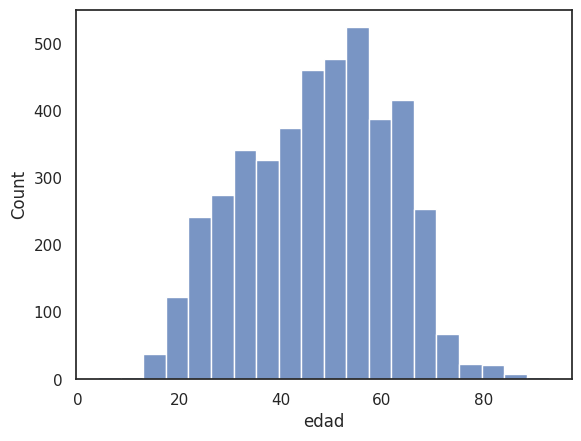

In [ ]:
edad_tf = df_numericas['edad']
info(edad_tf)


Al analizar la edad, nos damos cuenta de:
- Rango de Edades: La mayor concentración de individuos se encuentra en el rango de edades entre 39.6 y 51.467.

- Asimetría y curtosis: Ambos valen -0.13, por lo que tienen una distribución normal.

**Concentración de homoglobina**

El rango es de 14.399999999999999

 La tabla de frecuencias de conc_hgb
(5.486, 6.46]        3
(6.46, 7.42]         4
(7.42, 8.38]         6
(8.38, 9.34]        13
(9.34, 10.3]        14
(10.3, 11.26]       34
(11.26, 12.22]     109
(12.22, 13.18]     219
(13.18, 14.14]     319
(14.14, 15.1]     3115
(15.1, 16.06]      272
(16.06, 17.02]     143
(17.02, 17.98]      72
(17.98, 18.94]      33
(18.94, 19.9]        7
Name: conc_hgb, dtype: int64

Coeficiente de asimetría es de -0.5267264851047844

La curtosis es de -0.5267264851047844



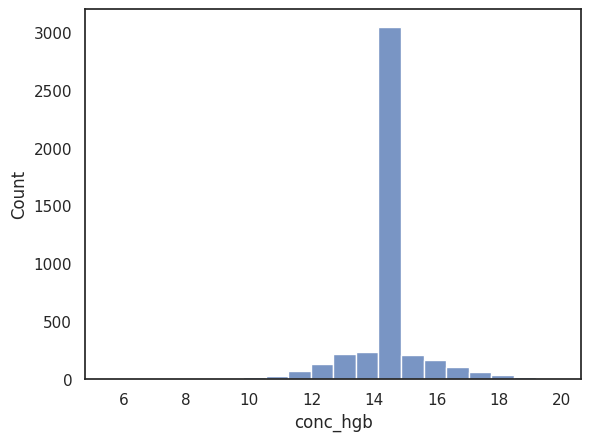

In [ ]:
info(df_numericas['conc_hgb'])


Análisis de concentración de hemoglobina
- Rango de la variable: La mayoría de los individuos tienen concentraciones de hemoglobina entre 14.14 y 15.1.

- Asimetría y curtosis: Son negativas, lo que sugieren que la cola de la izquierda es más larga que la cola de la derecha junto con una distribución escarpada (colas cortas y cercanos al punto central).

**Temperatura ambiente**

Es la temperatura a la que fue tomada la tensión arterial

El rango es de 33

 La tabla de frecuencias de temp_amb
(1.967, 4.2]       4
(4.2, 6.4]         7
(6.4, 8.6]        30
(8.6, 10.8]       47
(10.8, 13.0]     111
(13.0, 15.2]      93
(15.2, 17.4]      81
(17.4, 19.6]     117
(19.6, 21.8]     100
(21.8, 24.0]    3557
(24.0, 26.2]      90
(26.2, 28.4]      67
(28.4, 30.6]      31
(30.6, 32.8]      18
(32.8, 35.0]      10
Name: temp_amb, dtype: int64

Coeficiente de asimetría es de -1.9570514607305822

La curtosis es de -1.9570514607305822



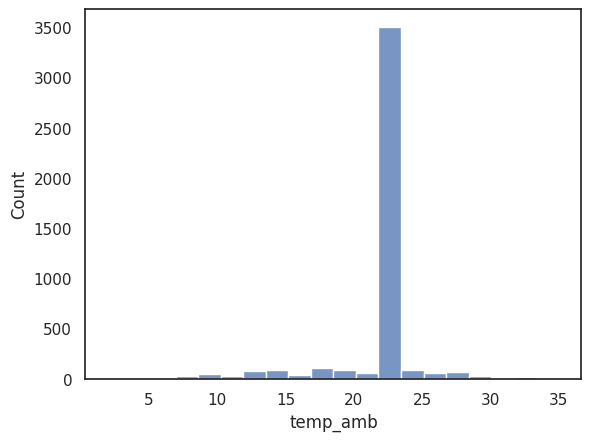

In [ ]:
info(df_numericas['temp_amb'])

La mayor concentración de temperaturas se encuentra alrededor de 21.8 a 24.0, pero la asimetría y la curtosis negativa sugieren que la cola de la izquierda es más larga que la cola de la derecha junto con una distribución escarpada (colas cortas y cercanos al punto central).

**Albumina**

El rango es de 4.3

 La tabla de frecuencias de alb
(0.996, 1.287]       2
(1.287, 1.573]      11
(1.573, 1.86]       18
(1.86, 2.147]       27
(2.147, 2.433]      54
(2.433, 2.72]       73
(2.72, 3.007]      131
(3.007, 3.293]      86
(3.293, 3.58]      175
(3.58, 3.867]      200
(3.867, 4.153]    3277
(4.153, 4.44]      198
(4.44, 4.727]       87
(4.727, 5.013]      20
(5.013, 5.3]         4
Name: alb, dtype: int64

Coeficiente de asimetría es de -2.5026194926566676

La curtosis es de -2.5026194926566676



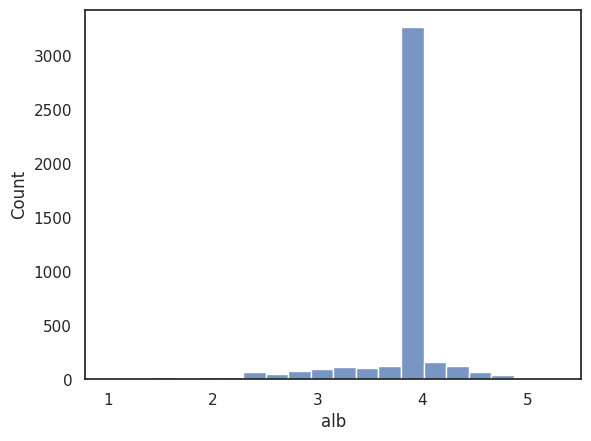

In [ ]:
info(df_numericas['alb'])

La mayor concentración de niveles de albúmina se encuentra alrededor de 3.867 a 4.153, pero la asimetría y la curtosis negativa sugieren que la cola de la izquierda es más larga que la cola de la derecha junto con una distribución escarpada (colas cortas y datos cercanos al punto central).

**Índice de masa corporal**

El rango es de 59.51347647

 La tabla de frecuencias de imc
(0.94, 4.968]        943
(4.968, 8.935]         2
(8.935, 12.903]        3
(12.903, 16.87]       24
(16.87, 20.838]      211
(20.838, 24.805]     633
(24.805, 28.773]    1073
(28.773, 32.741]     841
(32.741, 36.708]     394
(36.708, 40.676]     135
(40.676, 44.643]      69
(44.643, 48.611]      23
(48.611, 52.578]      10
(52.578, 56.546]       0
(56.546, 60.513]       2
Name: imc, dtype: int64

Coeficiente de asimetría es de -0.7717003430436795

La curtosis es de -0.7717003430436795



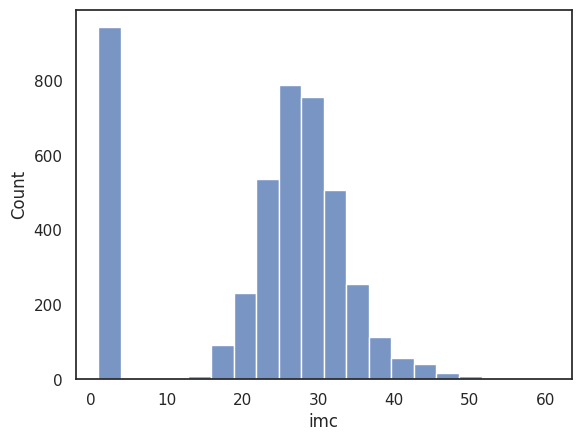

In [ ]:
info(df_numericas['imc'])

La alta concentración de valores bajos y la asimetría positiva podrían sugerir que la mayoría de los individuos en el conjunto de datos tienen una función renal saludable. Sin embargo, la presencia de colas pesadas en la distribución indica que hay algunos valores atípicos extremadamente altos que podrían indicar problemas renales.

La asimetría positiva y la curtosis indican que la cola de la derecha es más larga que la cola de la izquierda y que están más lejanos del punto central y que por lo tanto hay colas largas. Hay más dispersión en los datos.

**Ácido úrico**

El rango es de 10.8

 La tabla de frecuencias de urac
(0.189, 0.92]       2
(0.92, 1.64]        4
(1.64, 2.36]       31
(2.36, 3.08]      104
(3.08, 3.8]       250
(3.8, 4.52]       278
(4.52, 5.24]     3229
(5.24, 5.96]      203
(5.96, 6.68]      114
(6.68, 7.4]        82
(7.4, 8.12]        40
(8.12, 8.84]       12
(8.84, 9.56]        9
(9.56, 10.28]       3
(10.28, 11.0]       2
Name: urac, dtype: int64

Coeficiente de asimetría es de 0.8717008779215505

La curtosis es de 0.8717008779215505



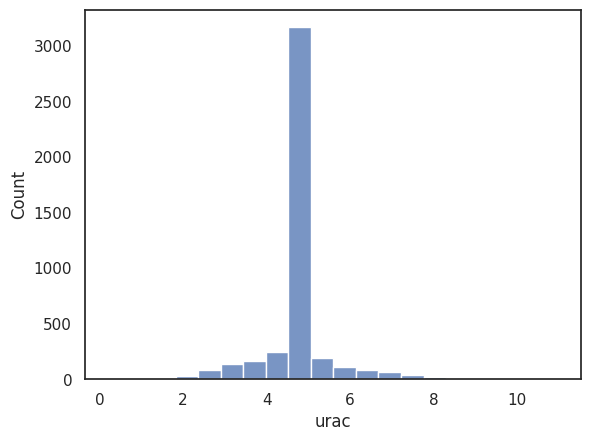

In [ ]:
info(df_numericas['urac'])

La mayor concentración de niveles de ácido úrico se encuentra alrededor de 4.52 a 5.24, pero la asimetría positiva y la curtosis sugieren que la cola de la derecha es más larga que la cola de la izquierda y que están más lejanos del punto central y que por lo tanto tenemos colas largas.

**Colesterol HDL**

El rango es de 270

 La tabla de frecuencias de c_hdl
(8.73, 27.0]       160
(27.0, 45.0]      3800
(45.0, 63.0]       357
(63.0, 81.0]        35
(81.0, 99.0]         8
(99.0, 117.0]        1
(117.0, 135.0]       1
(135.0, 153.0]       0
(153.0, 171.0]       0
(171.0, 189.0]       0
(189.0, 207.0]       0
(207.0, 225.0]       0
(225.0, 243.0]       0
(243.0, 261.0]       0
(261.0, 279.0]       1
Name: c_hdl, dtype: int64

Coeficiente de asimetría es de 8.374869957727379

La curtosis es de 8.374869957727379



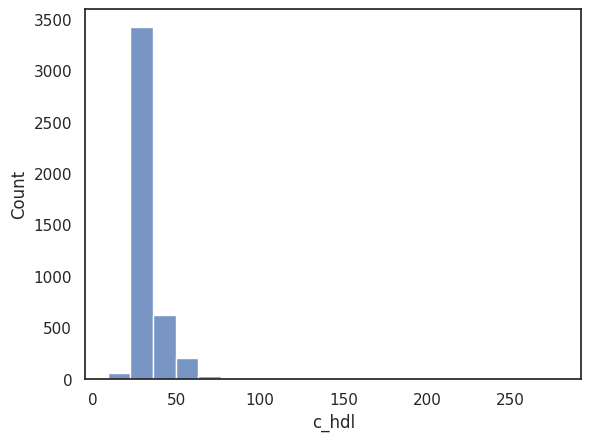

In [ ]:
info(df_numericas['c_hdl'])

 La mayor concentración de niveles de colesterol HDL se encuentra alrededor de 27.0 a 45.0, pero la asimetría positiva y la curtosis sugieren que la cola de la derecha es más larga que la cola de la izquierda y que están más lejanos del punto central y que por lo tanto tenemos colas largas. Es importante considerar estos patrones al interpretar los resultados relacionados con el colesterol HDL en el conjunto de datos. Valores más altos de colesterol HDL generalmente se consideran beneficiosos para la salud, por lo que los valores más bajos podrían indicar un mayor riesgo cardiovascular.

**Colesterol LDL**

El rango es de 291.9

 La tabla de frecuencias de c_ldl
(10.808, 30.56]       10
(30.56, 50.02]        98
(50.02, 69.48]       219
(69.48, 88.94]      3325
(88.94, 108.4]       344
(108.4, 127.86]      202
(127.86, 147.32]     113
(147.32, 166.78]      33
(166.78, 186.24]      12
(186.24, 205.7]        2
(205.7, 225.16]        1
(225.16, 244.62]       1
(244.62, 264.08]       1
(264.08, 283.54]       1
(283.54, 303.0]        1
Name: c_ldl, dtype: int64

Coeficiente de asimetría es de 2.1204421025514097

La curtosis es de 2.1204421025514097



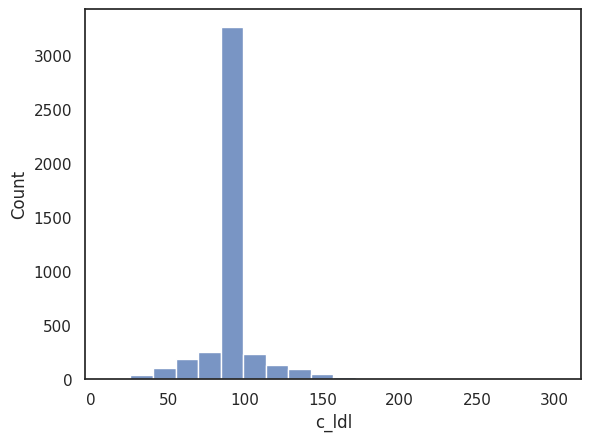

In [ ]:
info(df_numericas['c_ldl'])

La mayor concentración de niveles de colesterol LDL se encuentra alrededor de 69.48 a 108.4, pero la asimetría positiva y la curtosis sugieren que hay una tendencia hacia valores más bajos y que la distribución tiene colas más pesadas. Es importante considerar estos patrones al interpretar los resultados relacionados con el colesterol LDL en el conjunto de datos. Valores más bajos de colesterol LDL generalmente se consideran beneficiosos para la salud cardiovascular.







**Colesterol total**

El rango es de 641

 La tabla de frecuencias de c_total
(39.359, 82.733]        53
(82.733, 125.467]      310
(125.467, 168.2]      3506
(168.2, 210.933]       348
(210.933, 253.667]     116
(253.667, 296.4]        22
(296.4, 339.133]         4
(339.133, 381.867]       2
(381.867, 424.6]         0
(424.6, 467.333]         0
(467.333, 510.067]       0
(510.067, 552.8]         0
(552.8, 595.533]         0
(595.533, 638.267]       0
(638.267, 681.0]         2
Name: c_total, dtype: int64

Coeficiente de asimetría es de 4.250675824911985

La curtosis es de 4.250675824911985



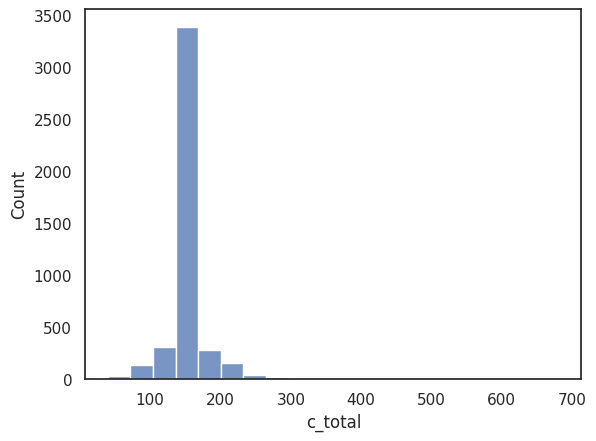

In [ ]:
info(df_numericas['c_total'])

La mayor concentración de niveles de colesterol total se encuentra alrededor de 125.467 a 168.2, pero la asimetría positiva y la curtosis indican que la cola de la derecha es más larga que la cola de la izquierda y que están más lejanos del punto central y que por lo tanto hay colas largas.

**Creatinina**

El rango es de 8.209999999999999

 La tabla de frecuencias de cr
(0.0518, 0.607]    3535
(0.607, 1.155]      802
(1.155, 1.702]       18
(1.702, 2.249]        2
(2.249, 2.797]        2
(2.797, 3.344]        0
(3.344, 3.891]        1
(3.891, 4.439]        0
(4.439, 4.986]        1
(4.986, 5.533]        1
(5.533, 6.081]        0
(6.081, 6.628]        0
(6.628, 7.175]        0
(7.175, 7.723]        0
(7.723, 8.27]         1
Name: cr, dtype: int64

Coeficiente de asimetría es de 19.29986722783627

La curtosis es de 19.29986722783627



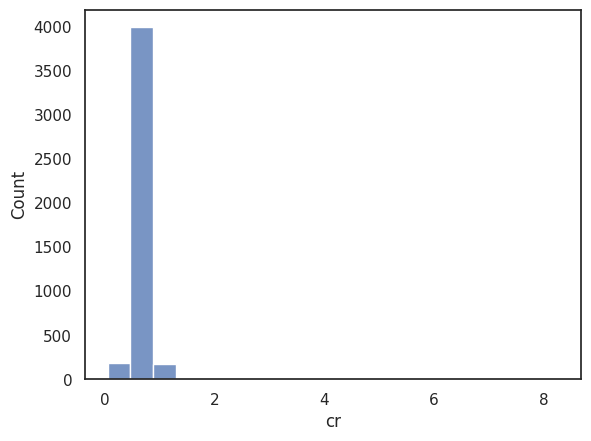

In [ ]:
info(df_numericas['cr'])

**Resultados de glucosa**

El rango es de 2361.6

 La tabla de frecuencias de glc_res
(8.038, 167.84]       4235
(167.84, 325.28]       113
(325.28, 482.72]        13
(482.72, 640.16]         1
(640.16, 797.6]          0
(797.6, 955.04]          0
(955.04, 1112.48]        0
(1112.48, 1269.92]       0
(1269.92, 1427.36]       0
(1427.36, 1584.8]        0
(1584.8, 1742.24]        0
(1742.24, 1899.68]       0
(1899.68, 2057.12]       0
(2057.12, 2214.56]       0
(2214.56, 2372.0]        1
Name: glc_res, dtype: int64

Coeficiente de asimetría es de 30.242830486175233

La curtosis es de 30.242830486175233



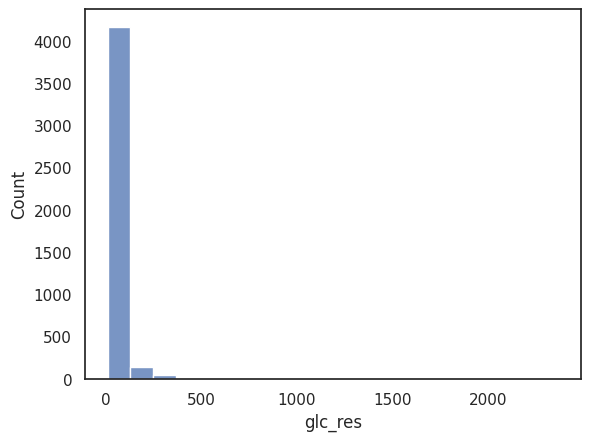

In [ ]:
info(df_numericas['glc_res'])

- Rango de glucosa en ayunas: La mayoría de los registros tienen niveles de glucosa en ayunas en el rango de 8.038 a 167.84.

- Asimetría: La distribución de la glucosa en ayunas muestra una asimetría positiva muy pronunciada, lo que indica que hay una concentración significativa de valores bajos que tiran de la distribución hacia valores más altos.

- Curtosis: Siendo positiva indica que hay más dispersión en los datos.

**Triglicéridos**

El rango es de 1297

 La tabla de frecuencias de tg
(21.703, 109.467]        471
(109.467, 195.933]      3554
(195.933, 282.4]         200
(282.4, 368.867]          57
(368.867, 455.333]        32
(455.333, 541.8]          16
(541.8, 628.267]           8
(628.267, 714.733]         4
(714.733, 801.2]           9
(801.2, 887.667]           5
(887.667, 974.133]         2
(974.133, 1060.6]          1
(1060.6, 1147.067]         1
(1147.067, 1233.533]       1
(1233.533, 1320.0]         2
Name: tg, dtype: int64

Coeficiente de asimetría es de 6.755346208180636

La curtosis es de 6.755346208180636



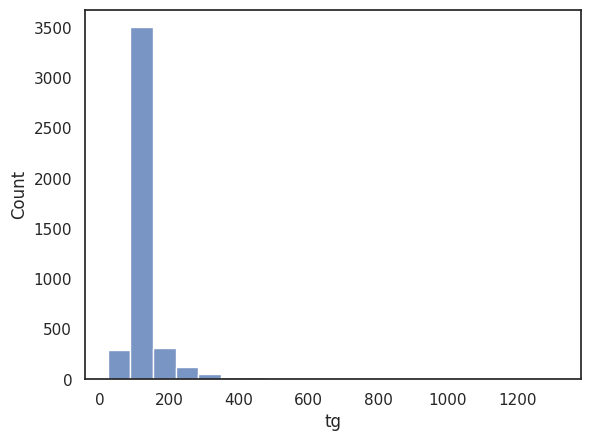

In [ ]:
info(df_numericas['tg'])

La asimetría positiva indica que la mayoría de las personas en el conjunto de datos tienen niveles normales de triglicéridos, pero hay algunos casos extremadamente altos que podrían considerarse valores atípicos. Valores elevados de triglicéridos pueden estar asociados con un mayor riesgo de enfermedad cardiovascular.

**Promedio de glucosa**

El rango es de 1049

 La tabla de frecuencias de glc_prom
(63.951, 134.933]      4119
(134.933, 204.867]      129
(204.867, 274.8]         70
(274.8, 344.733]         39
(344.733, 414.667]        4
(414.667, 484.6]          1
(484.6, 554.533]          0
(554.533, 624.467]        0
(624.467, 694.4]          0
(694.4, 764.333]          0
(764.333, 834.267]        0
(834.267, 904.2]          0
(904.2, 974.133]          0
(974.133, 1044.067]       0
(1044.067, 1114.0]        1
Name: glc_prom, dtype: int64

Coeficiente de asimetría es de 10.367259342726161

La curtosis es de 10.367259342726161



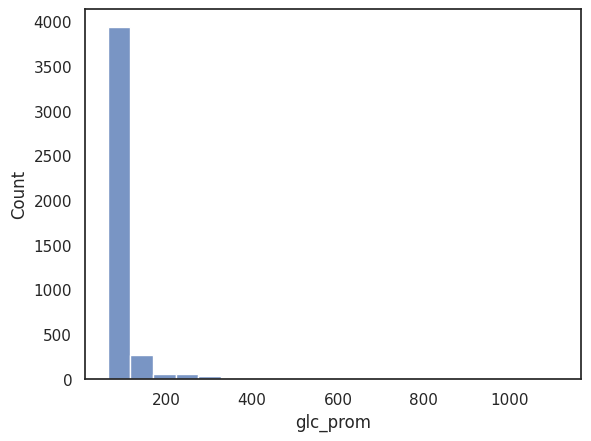

In [ ]:
info(df_numericas['glc_prom'])

- Rango de glucosa promedio: La mayoría de los registros tienen niveles de glucosa promedio en el rango de 63.951 a 134.933.

- Asimetría: La distribución de la glucosa promedio muestra una asimetría positiva muy pronunciada, indicando que hay una concentración significativa de valores bajos que tiran de la distribución hacia valores más altos.

- Curtosis: La distribución es leptocúrtica, con una curtosis positiva. Esto sugiere que la distribución tiene colas pesadas y es puntiaguda en comparación con una distribución normal.

**Concentración de hemoglobina glucosilada**

El rango es de 13.299999999999999

 La tabla de frecuencias de hgb_gluc
(3.887, 4.787]        51
(4.787, 5.673]      3816
(5.673, 6.56]        271
(6.56, 7.447]         65
(7.447, 8.333]        31
(8.333, 9.22]         28
(9.22, 10.107]        36
(10.107, 10.993]      17
(10.993, 11.88]       20
(11.88, 12.767]       12
(12.767, 13.653]      11
(13.653, 14.54]        3
(14.54, 15.427]        1
(15.427, 16.313]       0
(16.313, 17.2]         1
Name: hgb_gluc, dtype: int64

Coeficiente de asimetría es de 5.317734517708892

La curtosis es de 5.317734517708892



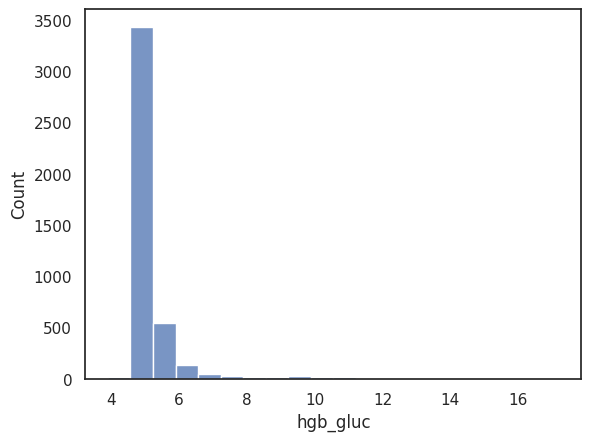

In [ ]:
info(df_numericas['hgb_gluc'])

Todas los demás histogramas poseen una curtosis y asimetría positiva, lo cual podría sugerir que la mayoría de los datos se encuentran en un rango relativamente estrecho, pero hay algunos valores atípicos significativamente más altos que la mayoría

**Ferritina**

El rango es de 612.5

 La tabla de frecuencias de ferritina
(0.0875, 41.533]      4194
(41.533, 82.367]       113
(82.367, 123.2]         27
(123.2, 164.033]        16
(164.033, 204.867]       3
(204.867, 245.7]         0
(245.7, 286.533]         3
(286.533, 327.367]       3
(327.367, 368.2]         0
(368.2, 409.033]         0
(409.033, 449.867]       0
(449.867, 490.7]         1
(490.7, 531.533]         2
(531.533, 572.367]       0
(572.367, 613.2]         1
Name: ferritina, dtype: int64

Coeficiente de asimetría es de 12.270156700960474

La curtosis es de 12.270156700960474



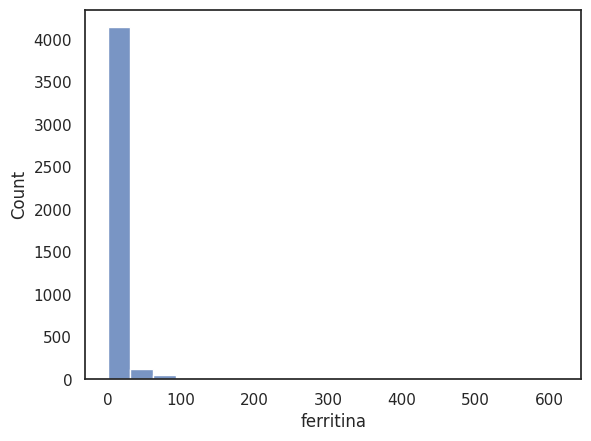

In [ ]:
info(df_numericas['ferritina'])

**Folato**

El rango es de 148.8

 La tabla de frecuencias de folato
(4.051, 14.12]       193
(14.12, 24.04]      4082
(24.04, 33.96]        75
(33.96, 43.88]         9
(43.88, 53.8]          1
(53.8, 63.72]          0
(63.72, 73.64]         0
(73.64, 83.56]         0
(83.56, 93.48]         0
(93.48, 103.4]         0
(103.4, 113.32]        0
(113.32, 123.24]       2
(123.24, 133.16]       0
(133.16, 143.08]       0
(143.08, 153.0]        1
Name: folato, dtype: int64

Coeficiente de asimetría es de 10.821784269194541

La curtosis es de 10.821784269194541



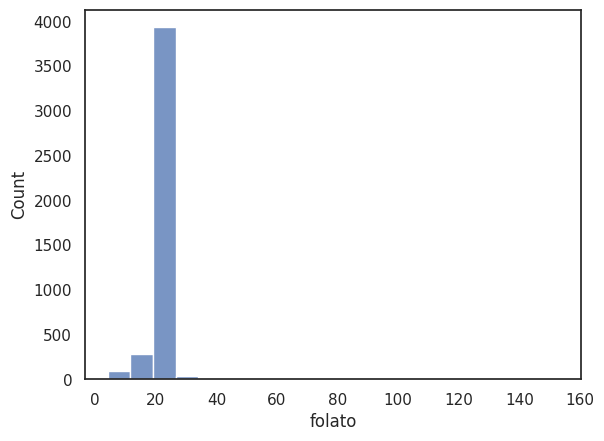

In [ ]:
info(df_numericas['folato'])

**Homocisteína**

El rango es de 48.44

 La tabla de frecuencias de hc
(1.512, 4.789]        69
(4.789, 8.019]      4121
(8.019, 11.248]      149
(11.248, 14.477]      15
(14.477, 17.707]       5
(17.707, 20.936]       0
(20.936, 24.165]       1
(24.165, 27.395]       1
(27.395, 30.624]       1
(30.624, 33.853]       0
(33.853, 37.083]       0
(37.083, 40.312]       0
(40.312, 43.541]       0
(43.541, 46.771]       0
(46.771, 50.0]         1
Name: hc, dtype: int64

Coeficiente de asimetría es de 12.098777298066162

La curtosis es de 12.098777298066162



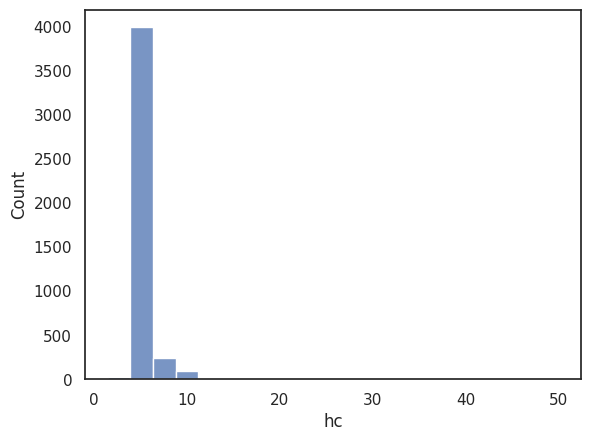

In [ ]:
info(df_numericas['hc'])

**Transferrina**

El rango es de 16.099999999999998

 La tabla de frecuencias de tf
(0.0839, 1.173]     4100
(1.173, 2.247]       222
(2.247, 3.32]         24
(3.32, 4.393]          6
(4.393, 5.467]         8
(5.467, 6.54]          1
(6.54, 7.613]          0
(7.613, 8.687]         0
(8.687, 9.76]          0
(9.76, 10.833]         1
(10.833, 11.907]       0
(11.907, 12.98]        0
(12.98, 14.053]        0
(14.053, 15.127]       0
(15.127, 16.2]         1
Name: tf, dtype: int64

Coeficiente de asimetría es de 21.68970827487194

La curtosis es de 21.68970827487194



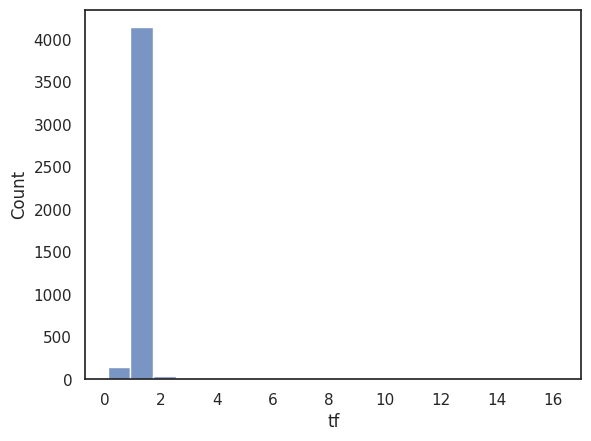

In [ ]:
info(df_numericas['tf'])

**Nivel de proteína C reactiva**

El rango es de 10.76

 La tabla de frecuencias de prc
(0.00924, 0.737]    4235
(0.737, 1.455]        81
(1.455, 2.172]        23
(2.172, 2.889]        16
(2.889, 3.607]         3
(3.607, 4.324]         2
(4.324, 5.041]         1
(5.041, 5.759]         0
(5.759, 6.476]         0
(6.476, 7.193]         0
(7.193, 7.911]         0
(7.911, 8.628]         0
(8.628, 9.345]         0
(9.345, 10.063]        0
(10.063, 10.78]        2
Name: prc, dtype: int64

Coeficiente de asimetría es de 14.395205473059942

La curtosis es de 14.395205473059942



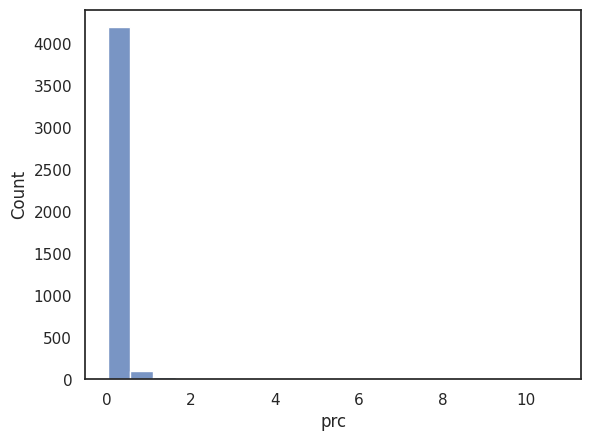

In [ ]:
info(df_numericas['prc'])

**Insulina**

El rango es de 263.5

 La tabla de frecuencias de ins
(0.336, 18.167]       4130
(18.167, 35.733]       169
(35.733, 53.3]          34
(53.3, 70.867]          14
(70.867, 88.433]         8
(88.433, 106.0]          1
(106.0, 123.567]         1
(123.567, 141.133]       1
(141.133, 158.7]         2
(158.7, 176.267]         2
(176.267, 193.833]       0
(193.833, 211.4]         0
(211.4, 228.967]         0
(228.967, 246.533]       0
(246.533, 264.1]         1
Name: ins, dtype: int64

Coeficiente de asimetría es de 10.497832976315896

La curtosis es de 10.497832976315896



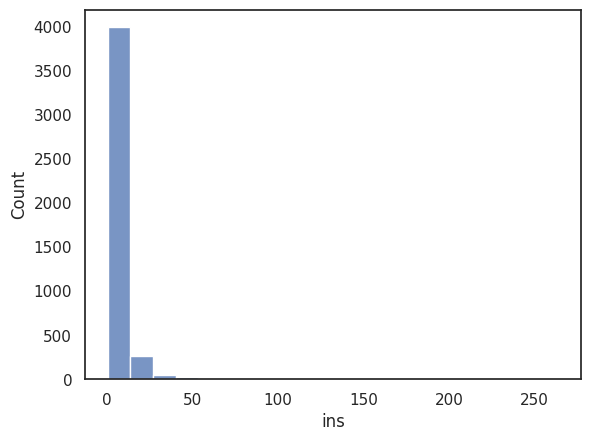

In [ ]:
info(df_numericas['ins'])

**Tensión arterial**

El rango es de 919

 La tabla de frecuencias de pa
(79.081, 141.267]     3549
(141.267, 202.533]     785
(202.533, 263.8]         0
(263.8, 325.067]         0
(325.067, 386.333]       0
(386.333, 447.6]         0
(447.6, 508.867]         0
(508.867, 570.133]       0
(570.133, 631.4]         0
(631.4, 692.667]         0
(692.667, 753.933]       0
(753.933, 815.2]         0
(815.2, 876.467]         0
(876.467, 937.733]       0
(937.733, 999.0]        29
Name: pa, dtype: int64

Coeficiente de asimetría es de 10.804419564850704

La curtosis es de 10.804419564850704



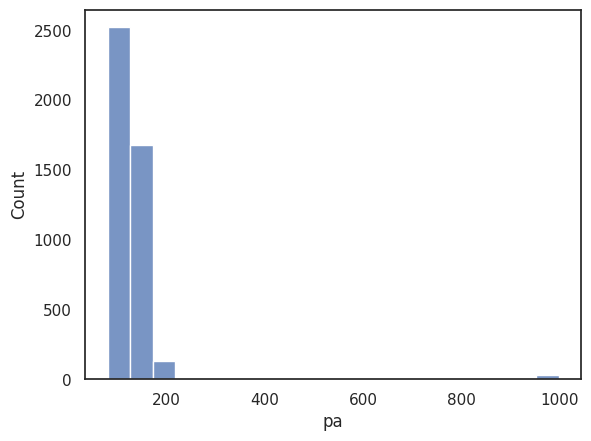

In [ ]:
info(df_numericas['pa'])

**Horas de sueño**

El rango es de 98

 La tabla de frecuencias de sueno_hrs
(0.902, 7.533]      4360
(7.533, 14.067]        0
(14.067, 20.6]         0
(20.6, 27.133]         0
(27.133, 33.667]       0
(33.667, 40.2]         0
(40.2, 46.733]         0
(46.733, 53.267]       0
(53.267, 59.8]         0
(59.8, 66.333]         0
(66.333, 72.867]       0
(72.867, 79.4]         0
(79.4, 85.933]         0
(85.933, 92.467]       0
(92.467, 99.0]         3
Name: sueno_hrs, dtype: int64

Coeficiente de asimetría es de 28.130211447481464

La curtosis es de 28.130211447481464



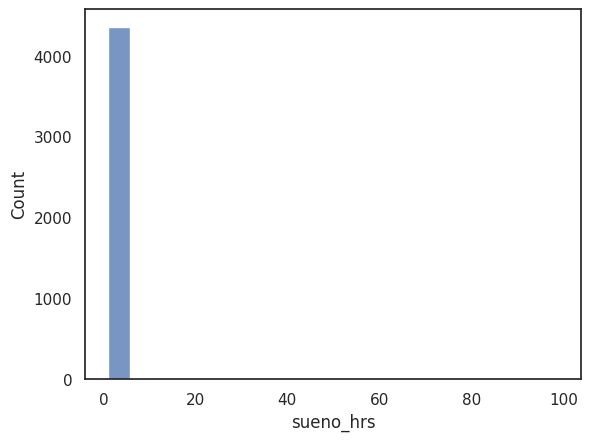

In [ ]:
info(df_numericas['sueno_hrs'])

**Actividad física total**

El rango es de 17810

 La tabla de frecuencias de act_total
(-7.81, 1197.333]         4275
(1197.333, 2384.667]        44
(2384.667, 3572.0]           0
(3572.0, 4759.333]           0
(4759.333, 5946.667]        18
(5946.667, 7134.0]          24
(7134.0, 8321.333]           0
(8321.333, 9508.667]         0
(9508.667, 10696.0]          0
(10696.0, 11883.333]         0
(11883.333, 13070.667]       1
(13070.667, 14258.0]         0
(14258.0, 15445.333]         0
(15445.333, 16632.667]       0
(16632.667, 17820.0]         1
Name: act_total, dtype: int64

Coeficiente de asimetría es de 10.209834222573733

La curtosis es de 10.209834222573733



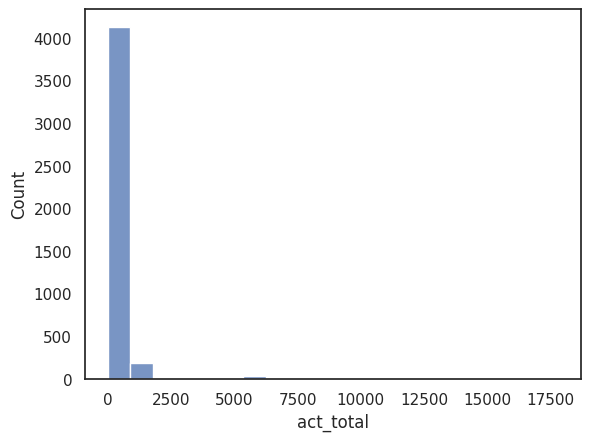

In [ ]:
info(df_numericas['act_total'])

####Gráficas de densidad
- Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

De las variables numéricas que tenemos ninguna puede ser segmentada en categorías, por lo tanto cólo vamos a realziar las gráficas de densidad de todas las columnas de manera independiente.

In [ ]:
plt.figure(figsize=(12, 25))

# Itera a través de todas las columnas del DataFrame
for i, column in enumerate(df_numericas.columns):
  # Crea un subplot para cada columna
  plt.subplot(8, 3, i + 1) # Ajusta el número de filas y columnas según el tamaño de tu DataFrame

  # Crea una gráfica de densidad utilizando Seaborn
  sns.kdeplot(df_numericas[column], fill=True, color='skyblue', linewidth=2)

  # Añade etiquetas y título para cada subplot
  plt.title(f'Densidad de {column}')
  plt.xlabel(column)

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()

NameError: name 'df' is not defined

<Figure size 1500x2000 with 0 Axes>

### 2.3 Exploración de Variables Categóricas y Análisis Multivariable


##### Anotación en gráficas
1. Agregar anotaciones y títulos a las gráficas que hemos hecho hasta el momento.

Haremos las anotaciones a todos los histogramas anteriormente generadas:

**Edad**

[Text(0.5, 1.0, 'Edades de los pacientes en México'),
 Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Conteo')]

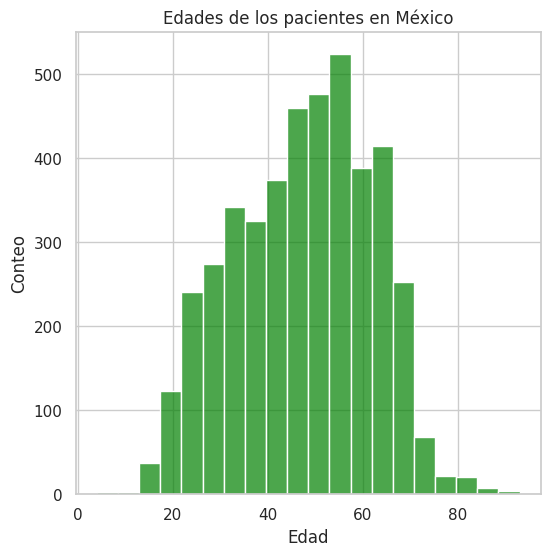

In [ ]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['edad'], bins=20, color='green', alpha=0.7)
ax.set(title="Edades de los pacientes en México", xlabel="Edad", ylabel="Conteo")

**Concentración de homoglobina**

[Text(0.5, 1.0, 'Concentración de homoglobina en la sangre en pacientes de México'),
 Text(0.5, 0, 'Concentración de homoglobina (g/dL)'),
 Text(0, 0.5, 'Conteo')]

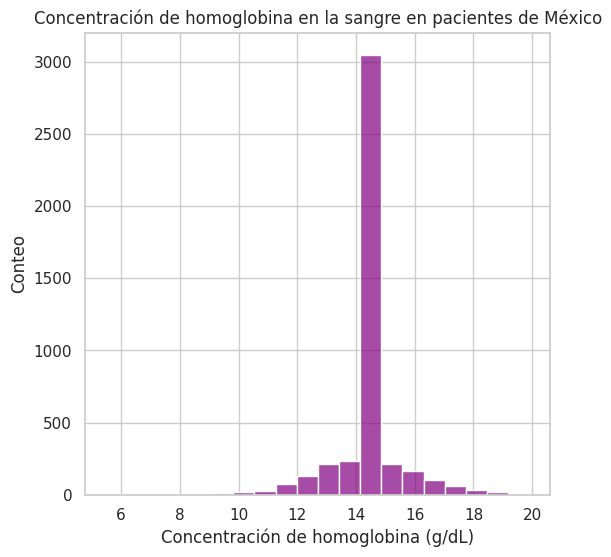

In [ ]:

fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['conc_hgb'], bins=20, color='purple', alpha=0.7)
ax.set(title="Concentración de homoglobina en la sangre en pacientes de México", xlabel="Concentración de homoglobina (g/dL)", ylabel="Conteo")

**Temperatura ambiente**

[Text(0.5, 1.0, 'Temperatura en la que se tomó la tensión arterial'),
 Text(0.5, 0, 'Temperatura (°C)'),
 Text(0, 0.5, 'Conteo')]

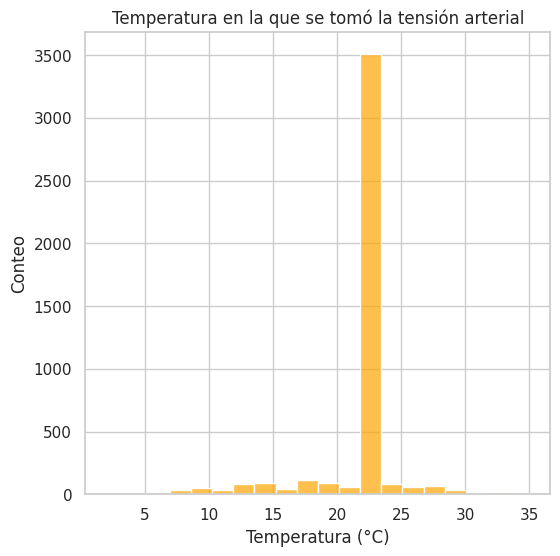

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['temp_amb'], bins=20, color='orange', alpha=0.7)
ax.set(title="Temperatura en la que se tomó la tensión arterial", xlabel="Temperatura (°C)", ylabel="Conteo")

**Albumina**

[Text(0.5, 1.0, 'Niveles de concentración de albúmina en la sangre en pacientes de México'),
 Text(0.5, 0, 'Concentración de albúmina (g/dL)'),
 Text(0, 0.5, 'Conteo')]

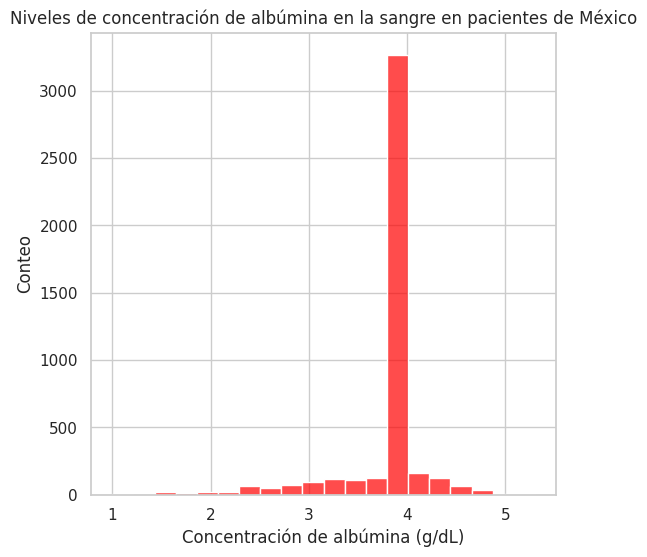

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['alb'], bins=20,  color='red', alpha=0.7)
ax.set(title="Niveles de concentración de albúmina en la sangre en pacientes de México", xlabel="Concentración de albúmina (g/dL)", ylabel="Conteo")

**Índice de masa corporal**

[Text(0.5, 1.0, 'Índice de masa corporal de los pacientes en México'),
 Text(0.5, 0, 'Índice de masa corporal (g/dL)'),
 Text(0, 0.5, 'Conteo')]

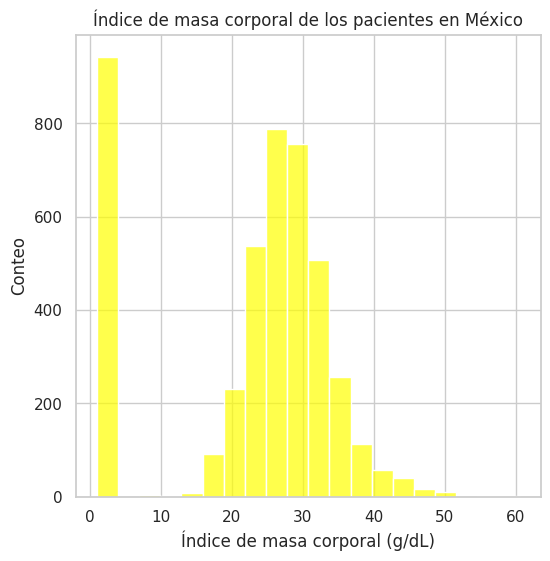

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['imc'], bins=20,  color='yellow', alpha=0.7)
ax.set(title="Índice de masa corporal de los pacientes en México", xlabel="Índice de masa corporal (g/dL)", ylabel="Conteo")

**Ácido úrico**

[Text(0.5, 1.0, 'Nivel de ácido úrico en la sangre de pacientes en México'),
 Text(0.5, 0, 'Ácido úrico (mg/dL)'),
 Text(0, 0.5, 'Conteo')]

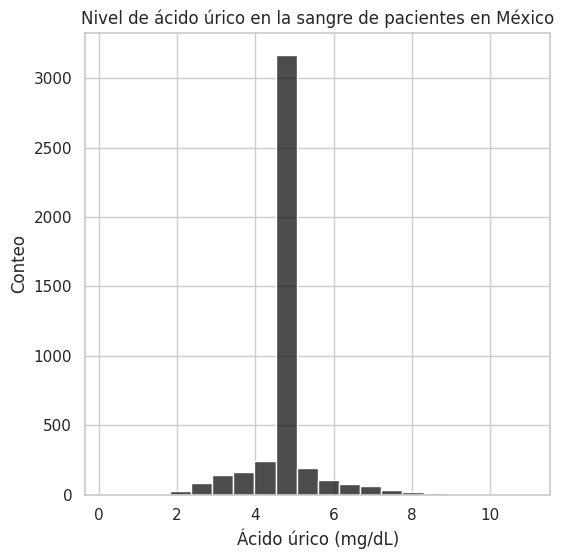

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['urac'], bins=20,  color='black', alpha=0.7)
ax.set(title="Nivel de ácido úrico en la sangre de pacientes en México", xlabel="Ácido úrico (mg/dL)", ylabel="Conteo")

**Colesterol HDL**

[Text(0.5, 1.0, 'Nivel de colesterol de lipoproteínas de alta densidad (HDL) de pacientes en México'),
 Text(0.5, 0, 'Colesterol HDL (mg/dL)'),
 Text(0, 0.5, 'Conteo')]

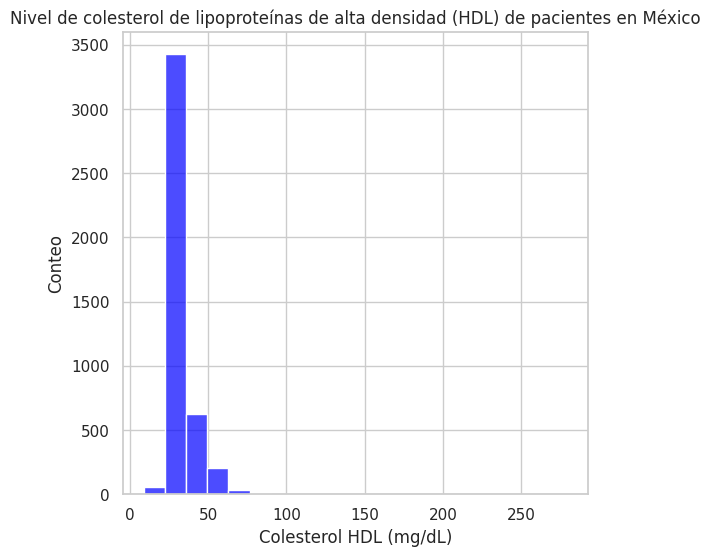

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['c_hdl'], bins=20,  color='blue', alpha=0.7)
ax.set(title="Nivel de colesterol de lipoproteínas de alta densidad (HDL) de pacientes en México", xlabel="Colesterol HDL (mg/dL)", ylabel="Conteo")

**Colesterol LDL**

[Text(0.5, 1.0, 'Nivel de colesterol de lipoproteínas de baja densidad (LDL) de pacientes en México'),
 Text(0.5, 0, 'Colesterol LDL (mg/dL)'),
 Text(0, 0.5, 'Conteo')]

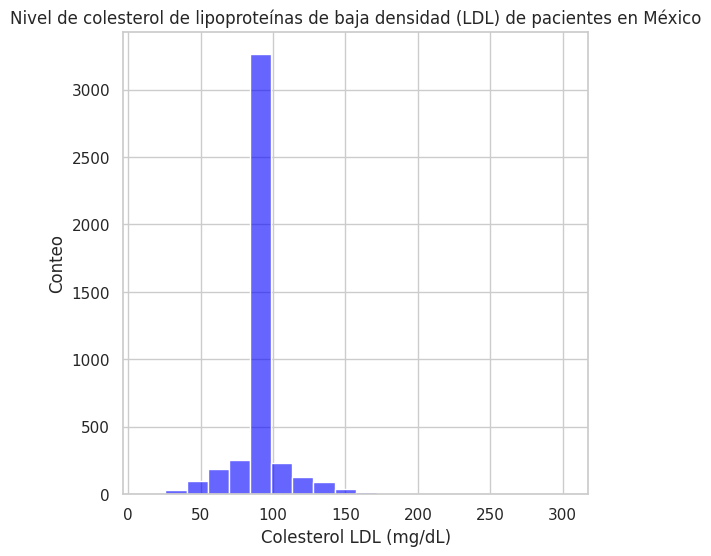

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['c_ldl'], bins=20,  color='blue', alpha=0.6)
ax.set(title="Nivel de colesterol de lipoproteínas de baja densidad (LDL) de pacientes en México", xlabel="Colesterol LDL (mg/dL)", ylabel="Conteo")

**Colesterol total**

[Text(0.5, 1.0, 'Nivel total de colesterol en la sangre de pacientes en México'),
 Text(0.5, 0, 'Colesterol total (mg/dL)'),
 Text(0, 0.5, 'Conteo')]

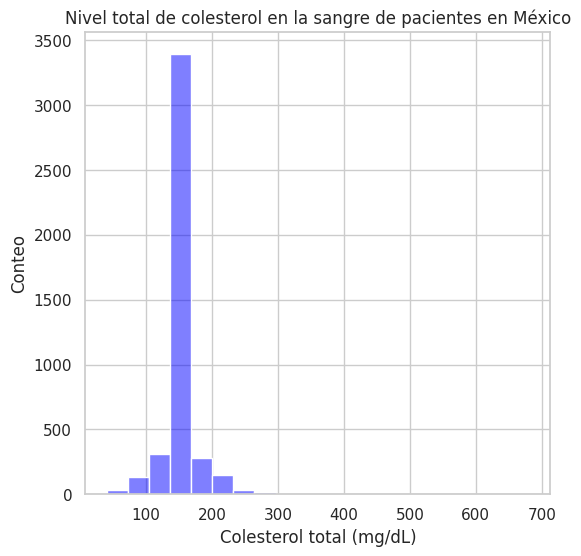

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['c_total'], bins=20,  color='blue', alpha=0.5)
ax.set(title="Nivel total de colesterol en la sangre de pacientes en México", xlabel="Colesterol total (mg/dL)", ylabel="Conteo")

**Creatinina**

[Text(0.5, 1.0, 'Concentración de creatinina en la sangre de pacientes en México'),
 Text(0.5, 0, 'Colesterol total (mg/dL)'),
 Text(0, 0.5, 'Conteo')]

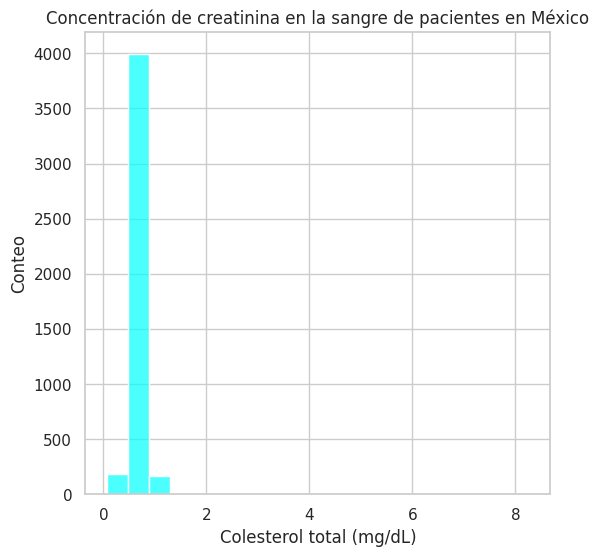

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['cr'], bins=20,  color='cyan', alpha=0.7)
ax.set(title="Concentración de creatinina en la sangre de pacientes en México", xlabel="Colesterol total (mg/dL)", ylabel="Conteo")

**Resultados glucosa**

[Text(0.5, 1.0, 'Nivel de glucosa de pacientes en México'),
 Text(0.5, 0, 'Glucosa (mg/dL)'),
 Text(0, 0.5, 'Conteo')]

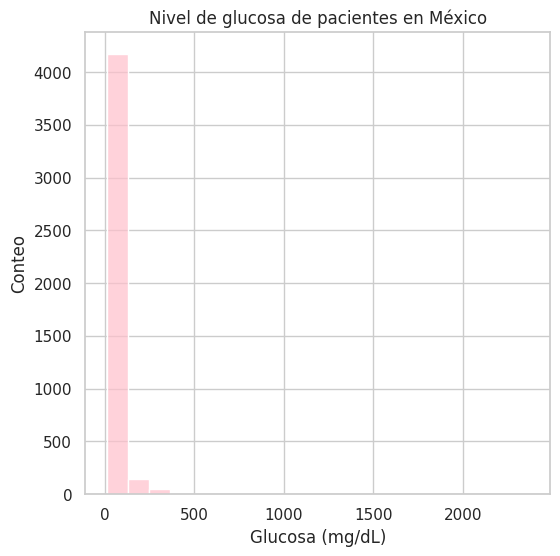

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['glc_res'], bins=20,  color='pink', alpha=0.7)
ax.set(title="Nivel de glucosa de pacientes en México", xlabel="Glucosa (mg/dL)", ylabel="Conteo")

**Triglicéridos**

[Text(0.5, 1.0, 'Valor de triglicéridos de pacientes en México'),
 Text(0.5, 0, 'Triglicéridos (mg/dL)'),
 Text(0, 0.5, 'Conteo')]

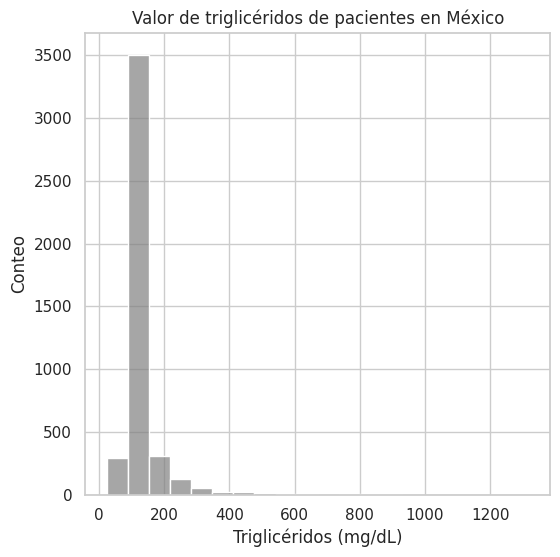

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['tg'], bins=20,  color='gray', alpha=0.7)
ax.set(title="Valor de triglicéridos de pacientes en México", xlabel="Triglicéridos (mg/dL)", ylabel="Conteo")

**Promedio de glucosa**

[Text(0.5, 1.0, 'Nivel promedio de glucosa de pacientes en México'),
 Text(0.5, 0, 'Glucosa (mg/dL)'),
 Text(0, 0.5, 'Conteo')]

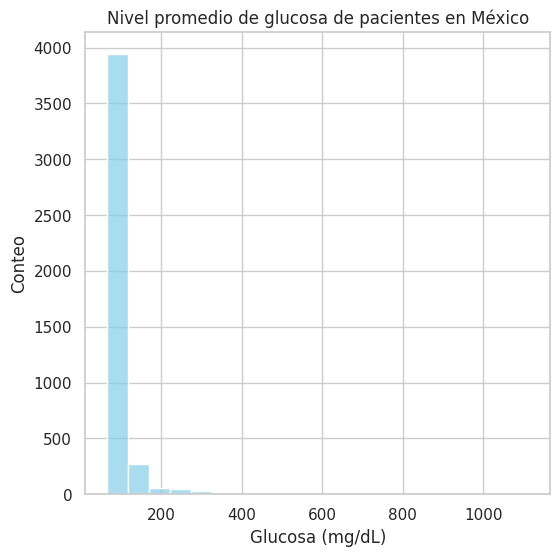

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['glc_prom'], bins=20,  color='skyblue', alpha=0.7)
ax.set(title="Nivel promedio de glucosa de pacientes en México", xlabel="Glucosa (mg/dL)", ylabel="Conteo")

**Concentración de hemoglobina glucosilada**

[Text(0.5, 1.0, 'Concentración de hemoglobina glucosilada en la sangre de pacientes en México'),
 Text(0.5, 0, 'Hemoglobina glucosilada (%)'),
 Text(0, 0.5, 'Conteo')]

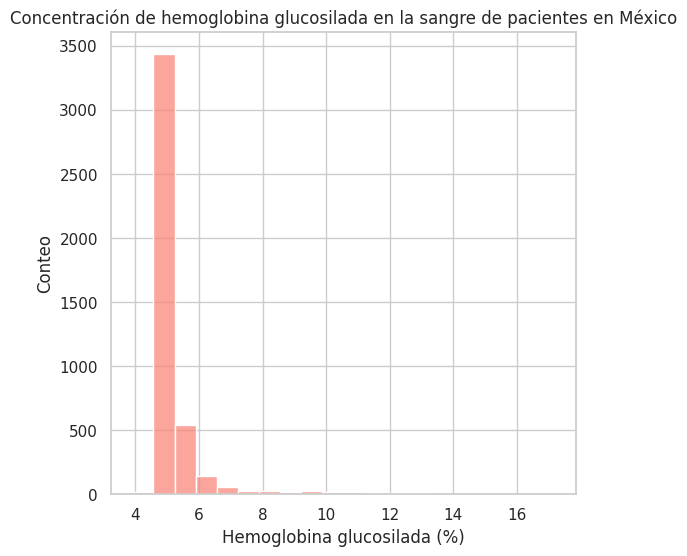

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['hgb_gluc'], bins=20,  color='salmon', alpha=0.7)
ax.set(title="Concentración de hemoglobina glucosilada en la sangre de pacientes en México", xlabel="Hemoglobina glucosilada (%)", ylabel="Conteo")

**Ferritina**

[Text(0.5, 1.0, 'Valor de la ferritina en la sangre de pacientes en México'),
 Text(0.5, 0, 'Ferritina (ng/mL)'),
 Text(0, 0.5, 'Conteo')]

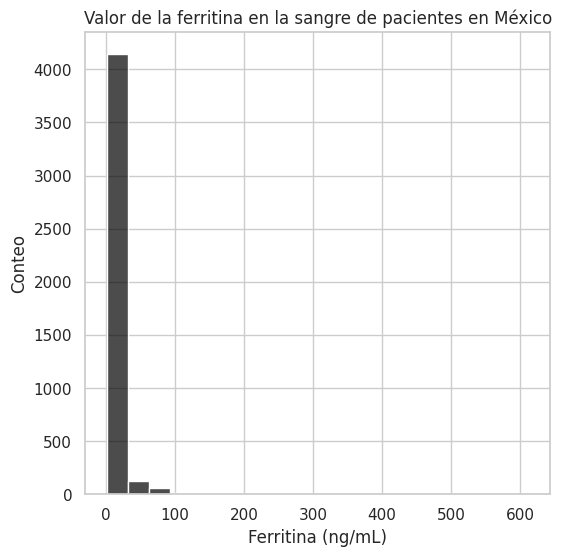

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['ferritina'], bins=20,  color='black', alpha=0.7)
ax.set(title="Valor de la ferritina en la sangre de pacientes en México", xlabel="Ferritina (ng/mL)", ylabel="Conteo")

**Folato**

[Text(0.5, 1.0, 'Nivel de folato en la sangre de pacientes en México'),
 Text(0.5, 0, 'Folato (ng/mL)'),
 Text(0, 0.5, 'Conteo')]

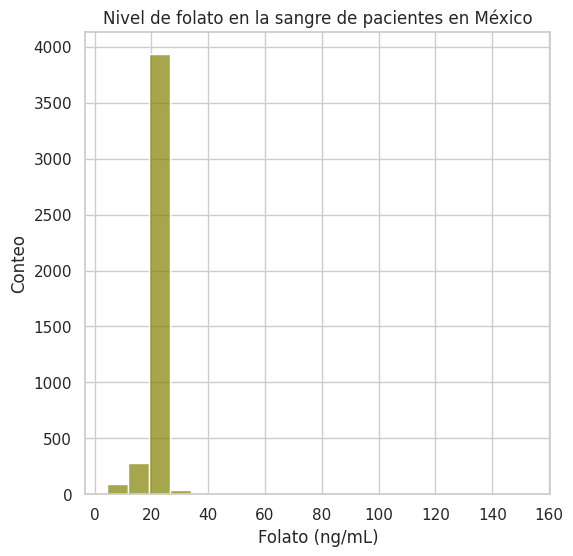

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['folato'], bins=20,  color='olive', alpha=0.7)
ax.set(title="Nivel de folato en la sangre de pacientes en México", xlabel="Folato (ng/mL)", ylabel="Conteo")

**Homocisteína**

[Text(0.5, 1.0, 'Valor de la homocisteína en la sangre de pacientes en México'),
 Text(0.5, 0, 'Homocisteína (µmol/L)'),
 Text(0, 0.5, 'Conteo')]

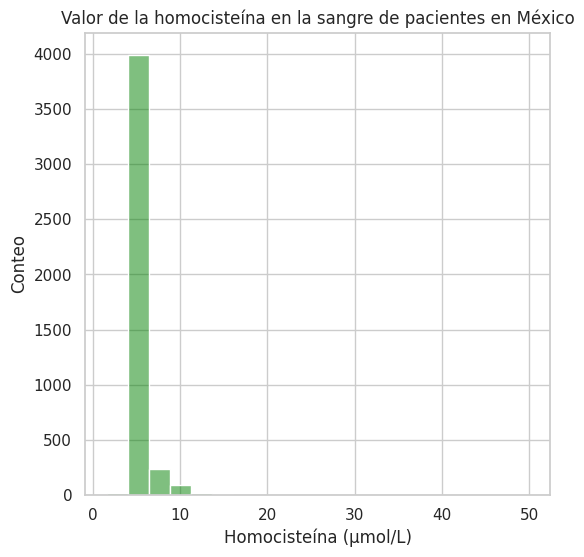

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['hc'], bins=20,  color='green', alpha=0.5)
ax.set(title="Valor de la homocisteína en la sangre de pacientes en México", xlabel="Homocisteína (µmol/L)", ylabel="Conteo")

**Transferrina**

[Text(0.5, 1.0, 'Concentración de transferrina en la sangre de pacientes en México'),
 Text(0.5, 0, 'Transferrina (mg/dL)'),
 Text(0, 0.5, 'Conteo')]

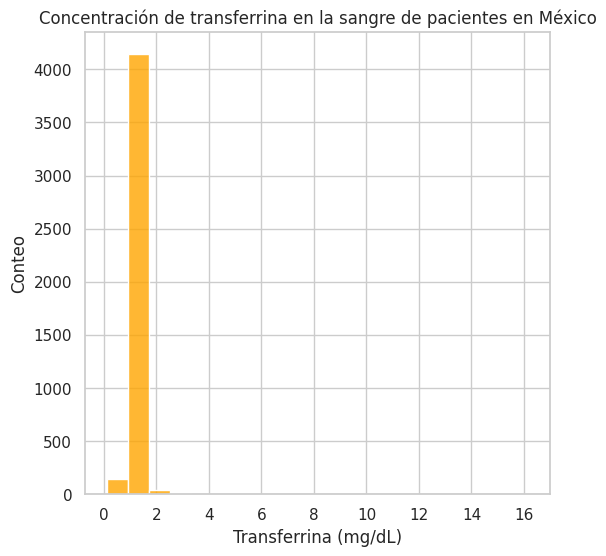

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['tf'], bins=20,  color='orange', alpha=0.8)
ax.set(title="Concentración de transferrina en la sangre de pacientes en México", xlabel="Transferrina (mg/dL)", ylabel="Conteo")

**Nivel de proteína C reactiva**

[Text(0.5, 1.0, 'Nivel de proteína C reactiva en la sangre de pacientes en México'),
 Text(0.5, 0, 'Proteína C reactiva (mg/L)'),
 Text(0, 0.5, 'Conteo')]

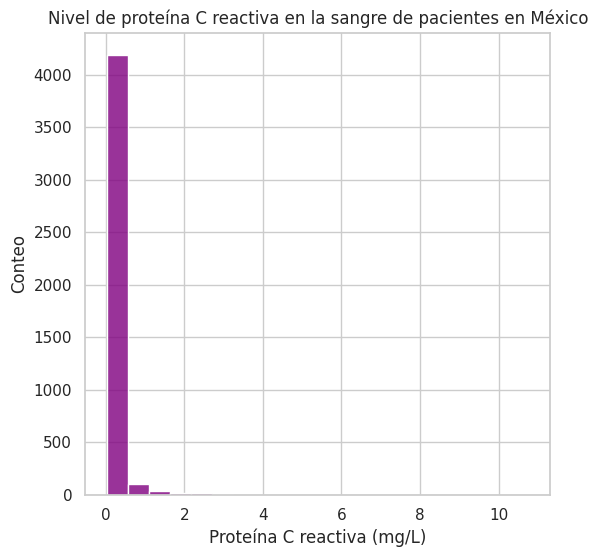

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['prc'], bins=20,  color='purple', alpha=0.8)
ax.set(title="Nivel de proteína C reactiva en la sangre de pacientes en México", xlabel="Proteína C reactiva (mg/L)", ylabel="Conteo")

**Insulina**

[Text(0.5, 1.0, 'Concentración de insulina en la sangre de pacientes en México'),
 Text(0.5, 0, 'Insulina (µU/mL)'),
 Text(0, 0.5, 'Conteo')]

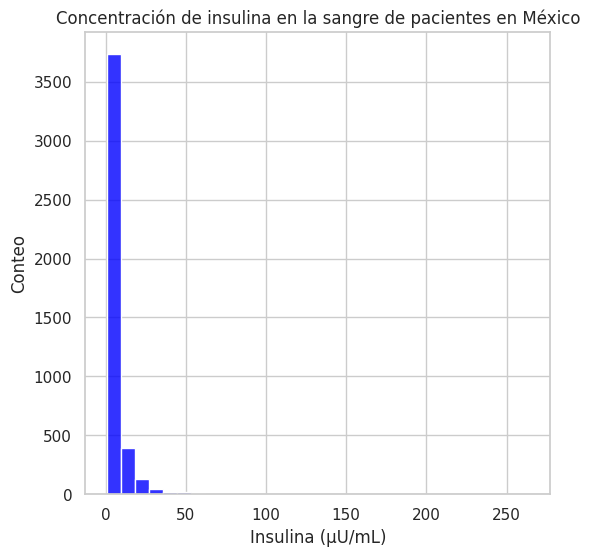

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['ins'], bins=30,  color='blue', alpha=0.8)
ax.set(title="Concentración de insulina en la sangre de pacientes en México", xlabel="Insulina (µU/mL)", ylabel="Conteo")

**Tensión arterial**

[Text(0.5, 1.0, 'Presión arterial de pacientes en México'),
 Text(0.5, 0, 'Presión arterial (mmHg)'),
 Text(0, 0.5, 'Conteo')]

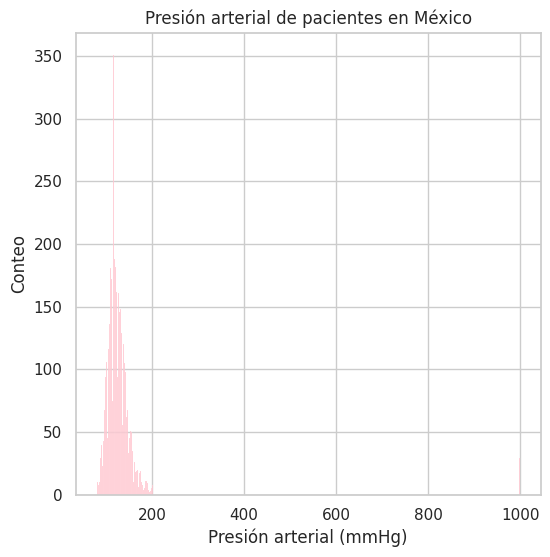

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['pa'], bins=500,  color='pink', alpha=0.8)
ax.set(title="Presión arterial de pacientes en México", xlabel="Presión arterial (mmHg)", ylabel="Conteo")

**Horas totales de sueño**

[Text(0.5, 1.0, 'Número de horas de sueño de los pacientes en México'),
 Text(0.5, 0, 'Horas'),
 Text(0, 0.5, 'Conteo')]

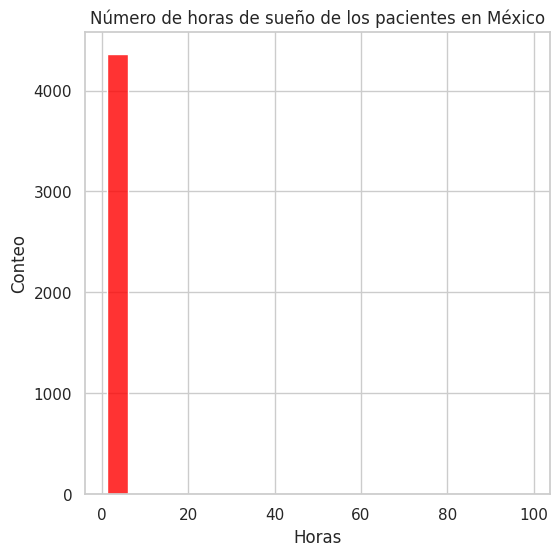

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['sueno_hrs'], bins=20,  color='red', alpha=0.8)
ax.set(title="Número de horas de sueño de los pacientes en México", xlabel="Horas", ylabel="Conteo")

**Actividad física total**

[Text(0.5, 1.0, 'Actividad física total de los pacientes en México'),
 Text(0.5, 0, 'Horas'),
 Text(0, 0.5, 'Conteo')]

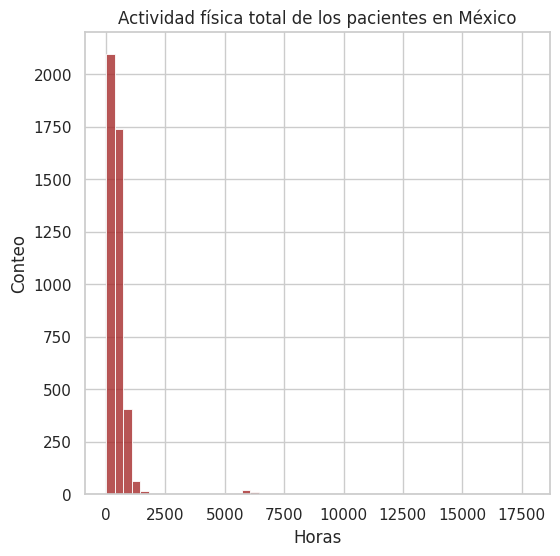

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = sns.histplot(df_numericas['act_total'], bins=50,  color='brown', alpha=0.8)
ax.set(title="Actividad física total de los pacientes en México", xlabel="Horas", ylabel="Conteo")

##### Gráficas de barra
2. Realizar gráficas de barras para explorar la distribución de variables categóricas.

Utilizaremos el dataframe **df_drop** ya que es la que contiene las columnas categóricas, dichas columnas son:
- *sexo*
- *riesgo_hta*


In [ ]:
df_drop.columns

Index(['sexo', 'edad', 'conc_hgb', 'temp_amb', 'urac', 'alb', 'c_hdl', 'c_ldl',
       'c_total', 'cr', 'glc_res', 'ins', 'tg', 'glc_prom', 'hgb_gluc',
       'ferritina', 'folato', 'hc', 'prc', 'tf', 'pa', 'sueno_hrs', 'imc',
       'act_total', 'riesgo_hta'],
      dtype='object')

**Sexo**

In [ ]:
#Valores únicos que contiene la columna sexo
df_drop['sexo'].unique()

['F', 'M']
Categories (2, object): ['M', 'F']

In [ ]:
#Cuántos valores existen por categoría en la columna sexo
df_drop['sexo'].value_counts()

F    2676
M    1687
Name: sexo, dtype: int64

[Text(0.5, 1.0, 'Sexo de los pacientes en México'), Text(0, 0.5, 'Conteo')]

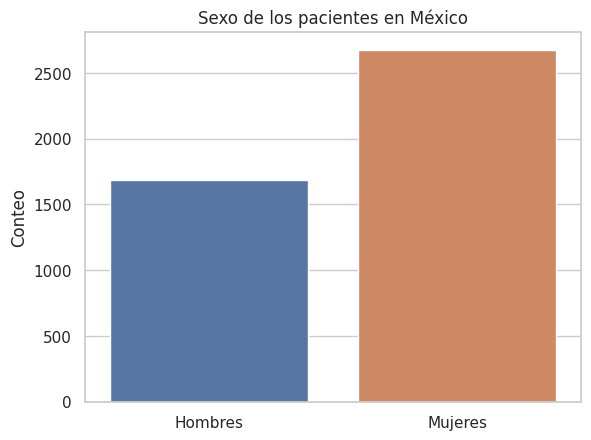

In [ ]:
## Se guardan los valores existentes por categoría
counts = df_drop['sexo'].value_counts()
#Se sustituye los valores de 1 y 2 con los respectivos nombres de las categorías (Hombres y mujeres)
new_labels = ['Hombres', 'Mujeres']

## se crea la gráfica de barras
ax = sns.barplot(x=counts.index, y=counts)
plt.xticks(range(len(counts)), new_labels)
ax.set(title="Sexo de los pacientes en México", ylabel="Conteo")

[Text(0.5, 1.0, 'Sexo de los pacientes en México'),
 Text(0, 0.5, 'Porcentaje (%)')]

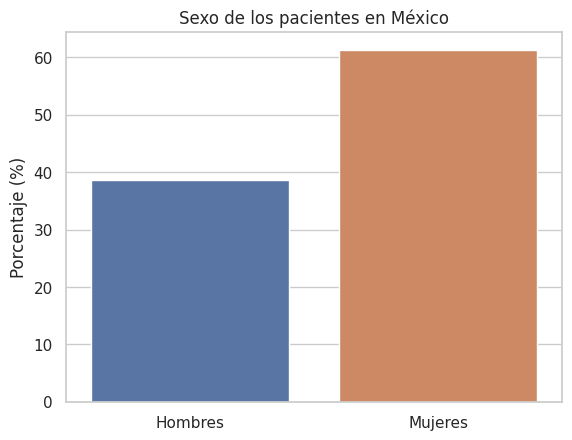

In [ ]:
as_percentages = counts * 100 / counts.sum()
ax = sns.barplot(x=as_percentages.index,y=as_percentages)
plt.xticks(range(len(counts)), new_labels)
ax.set(title="Sexo de los pacientes en México", ylabel="Porcentaje (%)")

In [ ]:
df_drop['sexo'].mode()

0    F
Name: sexo, dtype: category
Categories (2, object): ['M', 'F']

**Riesgo de desarrollar hipertensión**

In [ ]:
#Valores únicos que contiene la columna sexo
df_drop['riesgo_hta'].unique()

['Si', 'No']
Categories (2, object): ['No', 'Si']

In [ ]:
#Cuántos valores existen por categoría en la columna sexo
df_drop['riesgo_hta'].value_counts()

Si    2816
No    1547
Name: riesgo_hta, dtype: int64

[Text(0.5, 1.0, 'Riesgo de desarrollar hipertensión en los pacientes en México'),
 Text(0, 0.5, 'Conteo')]

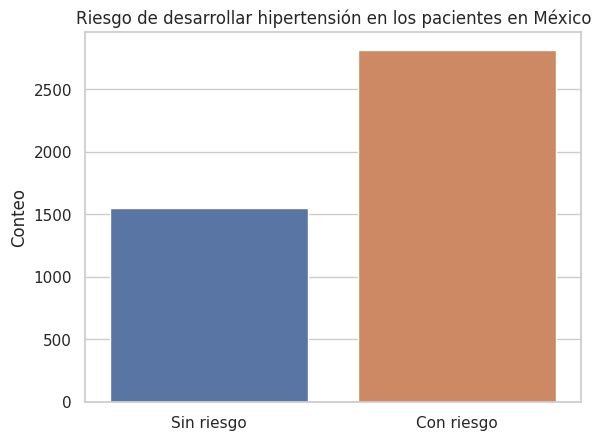

In [ ]:
## Se guardan los valores existentes por categoría
categorica = df_drop['riesgo_hta'].value_counts()
#Se sustituye los valores de 0 y 1 con los respectivos nombres de las categorías (Sin riesgo y con riesgo)
etiquetas = ['Sin riesgo', 'Con riesgo']

## se crea la gráfica de barras
ax = sns.barplot(x=categorica.index, y=categorica)
plt.xticks(range(len(categorica)), etiquetas)
ax.set(title="Riesgo de desarrollar hipertensión en los pacientes en México", ylabel="Conteo")

[Text(0.5, 1.0, 'Riesgo de desarrollar hipertensión en los pacientes en México'),
 Text(0, 0.5, 'Porcentaje (%)')]

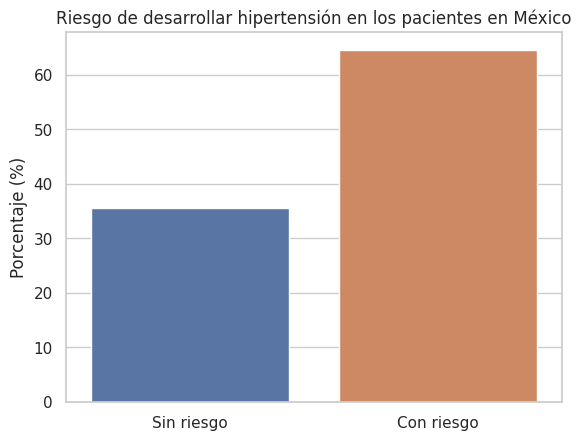

In [ ]:
#En forma de porcentaje
porcentajes = categorica * 100 / categorica.sum()
ax1 = sns.barplot(x=porcentajes.index,y=porcentajes)
plt.xticks(range(len(categorica)), etiquetas)
ax1.set(title="Riesgo de desarrollar hipertensión en los pacientes en México", ylabel="Porcentaje (%)")

In [ ]:
df_drop['riesgo_hta'].mode()

0    Si
Name: riesgo_hta, dtype: category
Categories (2, object): ['No', 'Si']

##### Tablas de contingencia y gráficas en múltiples ejes
3. Realizar tablas de contingencia y gráficas con múltiples axes para explorar dos o más variables categóricas.

Para hacer el análisis de la tabla de contingencia más interesante, convertiremos la *pa* (presión arterial) en una variable categórica y lo guardaremos en una copia del dataframe original

In [ ]:
def categorizar_presion_arterial(valor_presion):
  if valor_presion < 120:
      return "Normal"
  elif 120 <= valor_presion < 130:
      return "Elevada"
  else:
      return "Muy Alta"

df_copy = df_drop.copy()
df_copy['pa'] = df_copy['pa'].apply(categorizar_presion_arterial)
df_copy.head(10)

,sexo,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,...,ferritina,folato,hc,prc,tf,pa,sueno_hrs,imc,act_total,riesgo_hta
0,F,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,Normal,4,32.889389,120,Si
1,F,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,2.7,23.4,4.90,0.02,1.1,Normal,2,1.000000,240,No
2,F,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,Normal,1,1.000000,480,No
3,M,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,2.7,23.4,4.90,0.02,1.1,Normal,5,26.265339,275,Si
4,F,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,2.7,23.4,4.90,0.02,1.1,Elevada,2,1.000000,255,No
5,F,70,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,Muy Alta,3,1.000000,775,No
6,F,30,13.8,15,4.6,3.8,42,84.0,139,0.65,...,44.0,10.6,6.94,2.38,1.1,Normal,2,39.031773,300,Si
7,F,29,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,Normal,3,24.741058,600,Si
8,M,58,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,Normal,4,25.411527,740,Si
9,F,62,14.5,9,4.4,3.8,44,133.0,236,0.66,...,2.7,23.4,4.90,0.02,1.1,Normal,2,1.000000,150,Si


In [ ]:
crosstab = pd.crosstab(df_copy['pa'] ,[df_copy['riesgo_hta'],df_copy['sexo']], margins=True, margins_name="Total")
crosstab

riesgo_hta   No         Si       Total
sexo          M    F     M     F      
pa                                    
Elevada      92  125   273   339   829
Muy Alta    239  308   462   525  1534
Normal      261  522   360   857  2000
Total       592  955  1095  1721  4363

Gracias a este crosstab podemos ver más a detalle el riesgo de desarrollar hipertensión por género y ver cómo se relaciona con la presión arterial.

Se observan varias cosas:
- El total de la categoría "Normal" en presión arterial es la más frecuente en todas las combinaciones de "sexo" y "riesgo_hta".
- La categoría "Muy Alta" en presión arterial tiende a ser más frecuente en mujeres ("F") y en aquellas con riesgo de hipertensión ("Sí").
- La categoría "Elevada" en presión arterial es más frecuente en mujeres ("F") y en riesgo de hipertensión ("Si").
- En general, la categoría "Normal" es más frecuente en aquellos sin riesgo de hipertensión ("No").
- Las categorías de "Elevada" y "Muy Alta" son más frecuentes en aquellos con riesgo de hipertensión ("Sí").
- Las mujeres ("F") tienden a predominar en ambas categorías de riesgo de hipertensión ("Si" y "No") independientemente de la presión arterial debido a que el número es mayor en el dataset.

Ahora haremos las gráficas de múltiples ejes para tener mayor claridad

In [ ]:
crosstab.columns

MultiIndex([(   'No', 'M'),
            (   'No', 'F'),
            (   'Si', 'M'),
            (   'Si', 'F'),
            ('Total',  '')],
           names=['riesgo_hta', 'sexo'])

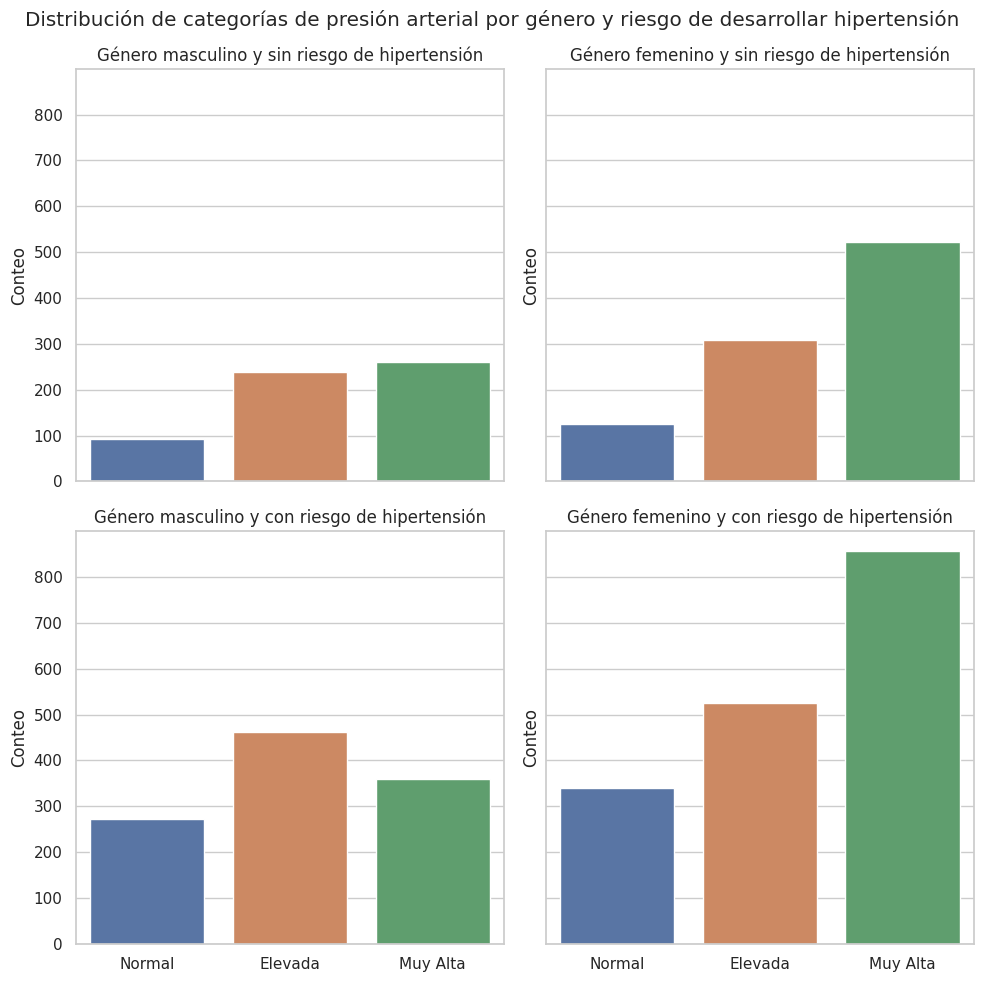

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
indice_pa = df_copy['pa'].unique()
fig.suptitle("Distribución de categorías de presión arterial por género y riesgo de desarrollar hipertensión")
sns.barplot(x=indice_pa, y=crosstab['No']['M'].iloc[:-1], ax=axes[0][0])
sns.barplot(x=indice_pa, y=crosstab['No']['F'].iloc[:-1], ax=axes[0][1])
sns.barplot(x=indice_pa, y=crosstab['Si']['M'].iloc[:-1], ax=axes[1][0])
sns.barplot(x=indice_pa, y=crosstab['Si']['F'].iloc[:-1], ax=axes[1][1])
axes[0][0].set(xlabel='', ylabel='Conteo', title="Género masculino y sin riesgo de hipertensión")
axes[0][1].set(xlabel='', ylabel='Conteo', title="Género femenino y sin riesgo de hipertensión")
axes[1][0].set(xlabel='', ylabel='Conteo', title="Género masculino y con riesgo de hipertensión")
axes[1][1].set(xlabel='', ylabel='Conteo', title="Género femenino y con riesgo de hipertensión")

fig.tight_layout()

plt.show()

##### Boxplots y violinplots
4. Usar boxplots y violinplots para explorar variables numéricas segmentadas por variables categóricas.

In [ ]:
df_drop.columns

Index(['sexo', 'edad', 'conc_hgb', 'temp_amb', 'urac', 'alb', 'c_hdl', 'c_ldl',
       'c_total', 'cr', 'glc_res', 'ins', 'tg', 'glc_prom', 'hgb_gluc',
       'ferritina', 'folato', 'hc', 'prc', 'tf', 'pa', 'sueno_hrs', 'imc',
       'act_total', 'riesgo_hta'],
      dtype='object')

Utilizaremos las siguientes variables:
- riesgo_hta - riesgo a desarrollar hipertensión(categórica)
- edad (numérica)
- act_total - Horas totales de actividad física (numérica)
- imc - Índice de masa temporal (numérica)

**Riesgo a desarrollar hipertensión y edad**

<Axes: xlabel='riesgo_hta', ylabel='edad'>

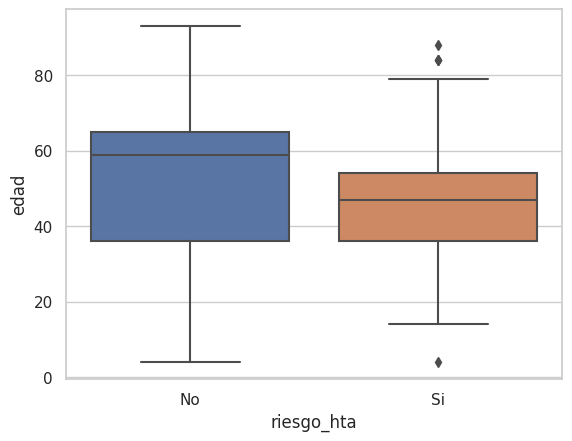

In [ ]:
sns.boxplot(x=df_drop['riesgo_hta'], y=df_drop['edad'])

- La mediana de la edad en la categoría "Sí" (con riesgo de hipertensión) parece ser más baja que en la categoría "No" (sin riesgo de hipertensión). Esto sugiere que, en promedio, las personas con riesgo de hipertensión tienden a ser más jóvenes que aquellas sin riesgo de hipertensión.

- La caja de la categoría "Si" es más estrecha que la de la categoría "No", indicando una menor variabilidad en las edades de las personas con riesgo de hipertensión en comparación con aquellas sin riesgo.

- La categoría "No" tiene más valores atípicos y un rango intercuartílico más amplio, lo que sugiere una mayor variabilidad en las edades de las personas sin riesgo de hipertensión.

<Axes: xlabel='riesgo_hta', ylabel='edad'>

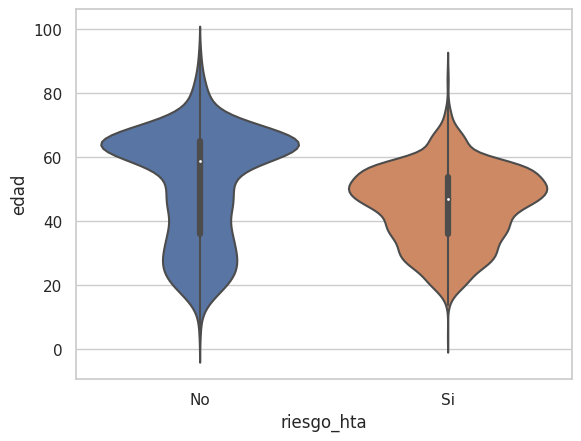

In [ ]:
sns.violinplot(x=df_drop['riesgo_hta'], y=df_drop['edad'])

En la categoría "No", el violín parece tener una densidad mayor alrededor de los valores 60 y 70, mientras que en la categoría "Sí", la densidad es más difusa y abarca un rango más amplio.

El violinplot sugiere que las personas con riesgo de hipertensión ("Sí") tienden a tener una distribución de edades más amplia y menos concentrada en comparación con aquellas sin riesgo ("No").

**Riesgo a desarrollar hipertensión y horas totales de actividad física**

<Axes: xlabel='riesgo_hta', ylabel='act_total'>

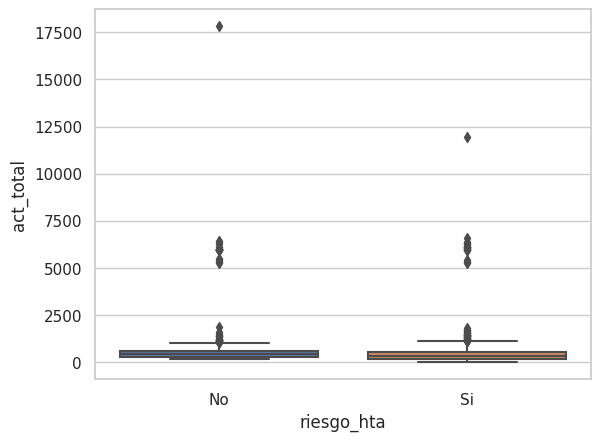

In [ ]:
sns.boxplot(x=df_drop['riesgo_hta'], y=df_drop['act_total'])

Debido a que la presencia de valores atípicos no nos permite analizar detalladamente los boxplots, los eliminaremos con una función anteriormente creada, y volveremos a generar el boxplot:

In [ ]:
act_filtrado = filtrado(df_drop['act_total'])

<Axes: xlabel='riesgo_hta', ylabel='act_total'>

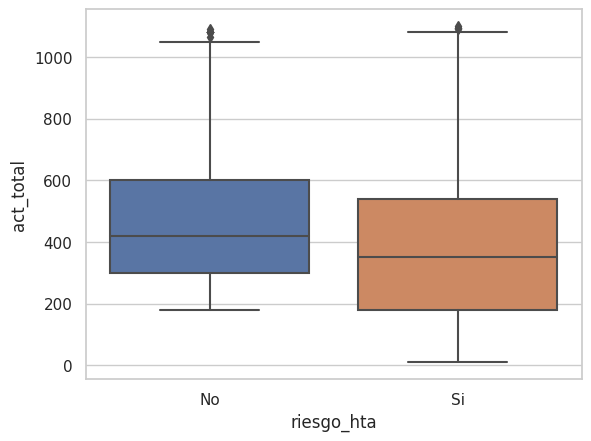

In [ ]:
sns.boxplot(x=df_drop['riesgo_hta'], y=act_filtrado)

- La mediana en la categoría "Si" está mas baja que en la categoría "No". Esto sugiere que, en promedio, las personas con riesgo de hipertensión tienden a tener una actividad total más baja.

- La caja que representa el IQR en la categoría "Sí" es más amplia que en la categoría "No". Esto indica que hay una mayor variabilidad en la actividad total entre las personas con riesgo de hipertensión.

- Ambas categorías tienen algunos valores atípicos (outliers), especialmente en la categoría "No". Estos valores pueden indicar casos excepcionales con niveles de actividad total muy altos.

- La forma de las cajas sugiere que la distribución de la actividad total es más dispersa en la categoría "Sí". La categoría "No" tiene una distribución más concentrada.

<Axes: xlabel='riesgo_hta', ylabel='act_total'>

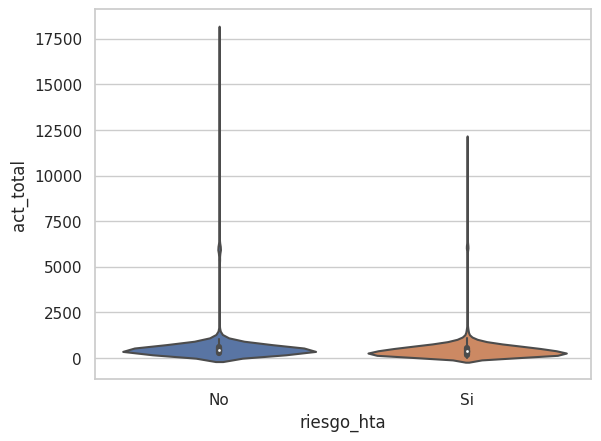

In [ ]:
sns.violinplot(x=df_drop['riesgo_hta'], y=df_drop['act_total'])

También eliminaremos los datos atípicos para poder visualizar de mejor manera el violinplot-

<Axes: xlabel='riesgo_hta', ylabel='act_total'>

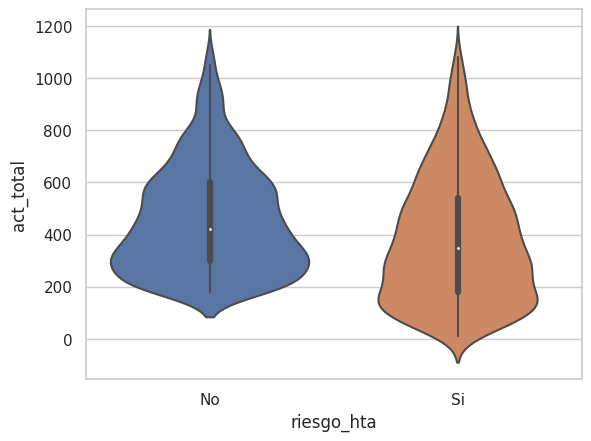

In [ ]:
sns.violinplot(x=df_drop['riesgo_hta'], y=act_filtrado)

- El violín correspondiente a la categoría "No" es más ancho entre los valores 200 y 400, lo que indica una mayor densidad de datos en esa región. En comparación, el violín de la categoría "Sí" es más ancho entre los valores 0 y 200, lo que significa que las personas con riesgo de hipertensión hacen menos actividad física que los que no están en riesgo.

- Hay puntos fuera de los violines, especialmente en la categoría "No". Estos puntos podrían indicar valores atípicos o casos excepcionales de niveles extremos de actividad física en personas sin riesgo de hipertensión.


**Riesgo a desarrollar hipertensión e índice de masa corporal**

<Axes: xlabel='riesgo_hta', ylabel='imc'>

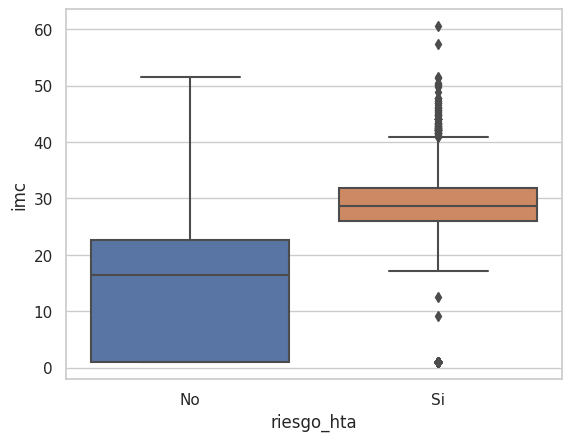

In [ ]:
sns.boxplot(x=df_drop['riesgo_hta'], y=df_drop['imc'])

- Observamos que la mediana en la categoría "Sí" es más alta que en la categoría "No". Esto sugiere que, en promedio, las personas con riesgo de hipertensión tienden a tener un IMC superior en comparación con aquellas sin riesgo.

- Las cajas muestran la dispersión intercuartil (IQR), y vemos que el IQR en la categoría "No" es un poco más amplia que en la categoría "Si". Esto indica que hay una mayor variabilidad en los valores de IMC en personas sin riesgo de hipertensión.

- Hay algunos puntos fuera de los bigotes en ambas categorías, indicando valores atípicos. Estos valores sesgan la distribución de los datos.


<Axes: xlabel='riesgo_hta', ylabel='imc'>

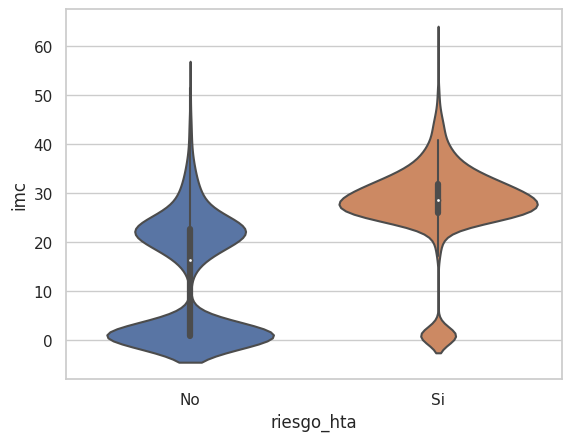

In [ ]:
sns.violinplot(x=df_drop['riesgo_hta'], y=df_drop['imc'])

- Se observa una diferencia notoria en la forma de los violines entre las categorías. El violin correspondiente a la categoría "No" es más ancho en la región de IMC más bajo, indicando una mayor concentración de datos en valores más bajos de IMC. En contraste, el violin de la categoría "Sí" es más ancho en la región de IMC más alto, sugiriendo una mayor densidad de datos en valores más altos de IMC. Esto indica que los pacientes con mayor índice de IMC tienen más riesgo de desarrollar hipertensión.
- La variabilidad en la forma de los violines indica que hay una amplia gama de valores de IMC en ambas categorías. La categoría "Sí" muestra una mayor dispersión en los valores más altos de IMC.

###2.4 Correlaciones y Regresión Linear Simple



##### Matriz de correlaciones y pairplot
1. Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.

Para generar la matriz de correlaciones es necesario usar sólo las variables numéricas, por lo tanto usaremos el dataframe **df_numericas**

In [ ]:
df_numericas.corr()

,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,glc_res,...,hgb_gluc,ferritina,folato,hc,prc,tf,pa,sueno_hrs,imc,act_total
edad,1.000000,0.012559,-0.035913,0.023910,-0.072665,0.037497,0.068088,0.076112,0.059931,0.072003,...,0.145905,-0.136022,0.126483,-0.160573,-0.134411,-0.039105,0.103613,-0.008645,-0.563871,-0.026226
conc_hgb,0.012559,1.000000,-0.137340,0.255487,0.113639,0.010071,0.146494,0.136141,0.072956,0.040352,...,0.015817,-0.072670,0.144875,-0.196868,-0.219316,-0.345393,0.041667,-0.010968,0.003379,0.025059
temp_amb,-0.035913,-0.137340,1.000000,0.056493,0.171676,-0.077663,-0.048485,-0.083438,-0.047159,-0.079789,...,-0.098112,-0.053498,0.062040,-0.044247,-0.077964,-0.038217,-0.014625,-0.016006,0.010294,0.025495
urac,0.023910,0.255487,0.056493,1.000000,0.336066,0.095273,0.184426,0.217284,0.373418,-0.113488,...,-0.166442,-0.106854,0.107728,-0.101643,-0.070952,-0.047103,0.063916,-0.051050,0.012269,0.017134
alb,-0.072665,0.113639,0.171676,0.336066,1.000000,0.213057,0.348498,0.394298,0.041073,-0.006207,...,-0.172079,-0.088804,0.097512,-0.053787,-0.109368,-0.027339,-0.002328,-0.026739,0.029870,0.023142
c_hdl,0.037497,0.010071,-0.077663,0.095273,0.213057,1.000000,0.349432,0.489226,0.149015,0.116786,...,0.143708,0.035155,-0.039633,0.058703,0.074756,0.025089,0.002168,0.002974,-0.045080,-0.020597
c_ldl,0.068088,0.146494,-0.048485,0.184426,0.348498,0.349432,1.000000,0.853718,0.100802,0.125747,...,0.148080,-0.022654,0.020698,-0.031326,-0.030484,-0.013404,0.009129,-0.002393,-0.010230,-0.016168
c_total,0.076112,0.136141,-0.083438,0.217284,0.394298,0.489226,0.853718,1.000000,0.151525,0.160573,...,0.203557,-0.003955,0.020524,-0.011193,0.000654,-0.019278,0.016087,-0.007394,-0.025022,-0.019938
cr,0.059931,0.072956,-0.047159,0.373418,0.041073,0.149015,0.100802,0.151525,1.000000,0.007256,...,0.053616,0.062751,0.021144,0.026533,0.104527,-0.010411,0.027625,0.011568,-0.064528,-0.000270
glc_res,0.072003,0.040352,-0.079789,-0.113488,-0.006207,0.116786,0.125747,0.160573,0.007256,1.000000,...,0.626874,0.016505,0.019042,-0.021859,0.017018,0.003087,-0.004415,0.038821,-0.024403,-0.013400


Debido a que son 23 columnas, es difícil analizar las distintas correlaciones, por eso usaremos un mapa de calor para visualizarlo:

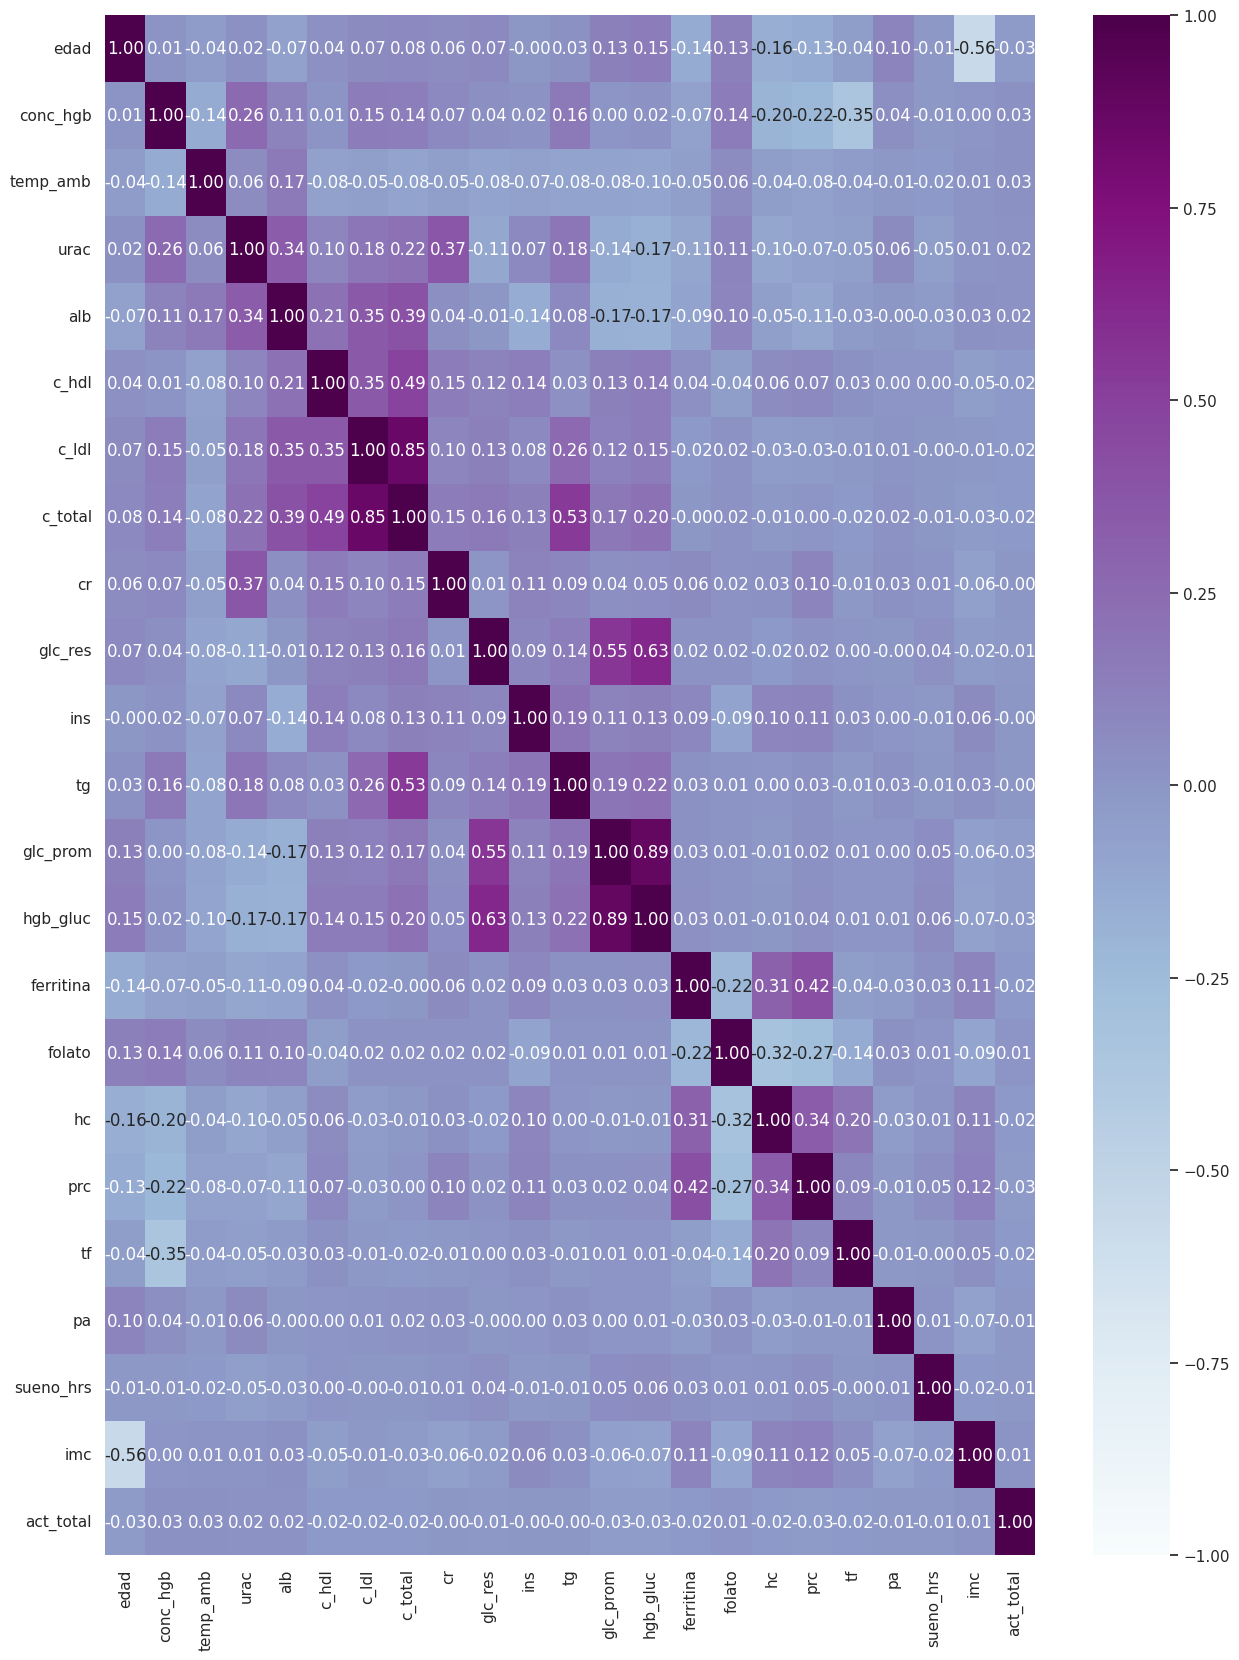

In [ ]:
plt.figure(figsize=(15,20))
ax = sns.heatmap(df_numericas.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f",cmap="BuPu")

Como se puede observar, hay todo tipo de correlación, a continuación se enlistan las variables más significativas con su respectiva correlación:
- Variables con correlación positiva
  - [0.89] hgb_gluc y glc_prom (hemoglobina glucosilada y resultados de glucosa)
  - [0.85] c_total y c_ldl (colesterol total y colesterol LDL, también conocido como colesterol "malo")
  - [0.63] hgb_gluc y glc_res (hemoglobina glucosilada y resultados de glucosa)
  - [0.55] glc_prom y glc_res (promedio de glucosa y resultados de glucosa)
  - [0.53] c_total y tg (colesterol total y triglicéridos)

Si la correlación está cercano de 1, pero no es exactamente 1, indica una fuerte relación lineal positiva entre las variables. Los puntos en un gráfico tienden a estar muy cerca de una línea ascendente, pero puede haber algunas desviaciones.

- Variables con correlación negativa
  - [-0.56] imc y edad (índice de masa corporal y edad)
  - [-0.35] tg y conc_hgb (triglicéridos y concentración de homoglobina)
  - [-0.32] hc y folato (homocisteína y folato)
  - [-0.27] pcr y folato (proteína C reactiva)

Si la correlación está cercano de -1, pero no es exactamente -1, indica una fuerte relación lineal negativa entre las variables. Los puntos en un gráfico tienden a estar muy cerca de una línea descendente, pero puede haber algunas desviaciones.

- Variables sin correlación

  Para este caso entontramos varias correlaciones que tienden a 0, lo cual significa que no hay un patrón discernible en la relación entre las variables cuando se grafican. Sin embargo, es importante recordar que la falta de una correlación lineal no implica necesariamente la ausencia de otra forma de relación.


A continuación vamos a generar un pairplot para tener una visión general de las relaciones y distribuciones en un formato más fácil de interpretar:

In [ ]:
df_numericas.columns

Index(['edad', 'conc_hgb', 'temp_amb', 'urac', 'alb', 'c_hdl', 'c_ldl',
       'c_total', 'cr', 'glc_res', 'ins', 'tg', 'glc_prom', 'hgb_gluc',
       'ferritina', 'folato', 'hc', 'prc', 'tf', 'pa', 'sueno_hrs', 'imc',
       'act_total'],
      dtype='object')

In [ ]:
#creación del pairplot
sns.pairplot(df_numericas)

Podemos observar que las variables hgb_gluc y glc_prom tiene efectivamente muestran una línea ascendente casi perfecta, aunque hay algunos puntos que no coinciden.

En la relación de las variables c_total y c_ldl no se muestra una línea ascendente bien definida, pero se puede notar que los datos tienen esa tendencia de ir formando una linea ascendente. Lo mismo sucede con hgb_gluc y glc_res

Las correlaciones de las variables glc_prom y glc_res la visualización no es tan clara. Lo mismo sucede con c_total y tg.









#### Gráficas de dispersión y valores atípicos
2. Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.

>**Correlación entre las variables imc y edad.**


>Analizaremos la correlación negativa entre las variables imc y edad (-0.56). Primero crearemos la gráfica de dispersión para observar los valores atípicos

In [ ]:
sns.scatterplot(x=df_numericas['imc'], y=df_numericas['edad'])

Observamos que para para las personas que tienen una edad mayor de 60 tienen un imc igual a 1, lo cual nos indica que se podría tratar de un error al haber registrado esos valores para los pacientes. Por lo tanto podemos tratarlos como valores atípicos, los eliminaremos y volveremos a realizar la gráfica para ver qué sucede:

In [ ]:
df_no_unos = df_numericas[df_numericas['imc'] > 1]

In [ ]:
df_no_unos.shape

In [ ]:
sns.scatterplot(x=df_no_unos['imc'], y=df_no_unos['edad'])

Se eliminaron los valores correspondientes a uno, pero la gráfica no cambió mucho. Veamos cómo afectó al coeficiente de correlación:


In [ ]:
df_no_unos['imc'].corr(df_no_unos['edad'])

El coeficiente pasó de ser -0.56 a 0.15. No es una correlación positiva muy fuerte pero hubo un gran cambio. Posiblemente al habir eliminado los valores atípicos también hayamos afectado de manera significativa a las demás variables numéricas, porque eliminamos casi 1000 datos.

#### Después de la eliminación de valores atípicos.
3. Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.

Ahora veremos cómo afectó la eliminación de los valores atípicos en la variable **imc** con respecto a las demás variables mediante el heatmat y el pairplot:

In [ ]:
plt.figure(figsize=(15,20))
ax = sns.heatmap(df_no_unos.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f",cmap="BuPu")

Después de haber analizado el heatmap, nos percatamos que las correlaciones sí cambiaron bastante:
- Variables con correlación positiva
  - [0.89] hgb_gluc y glc_prom (hemoglobina glucosilada y resultados de glucosa) - Bajó a 0.84
  - [0.85] c_total y c_ldl (colesterol total y colesterol LDL, también conocido como colesterol "malo") - Se mantuvo igual
  - [0.63] hgb_gluc y glc_res (hemoglobina glucosilada y resultados de glucosa) - Bajó a 0.59
  - [0.55] glc_prom y glc_res (promedio de glucosa y resultados de glucosa) - Bajó a 0.49
  - [0.53] c_total y tg (colesterol total y triglicéridos) - Subió a 0.55


- Variables con correlación negativa
  - [-0.56] imc y edad (índice de masa corporal y edad) - Cambió a 0.16
  - [-0.35] tg y conc_hgb (triglicéridos y concentración de homoglobina) - Cambió a 0.17
  - [-0.32] hc y folato (homocisteína y folato) - Subió a -0.31
  - [-0.27] pcr y folato (proteína C reactiva) - Subió a -0.26






In [ ]:
sns.pairplot(df_no_unos)

Después de haber analizado el heatmap y el pairplot, concluimos que la eliminación de los valores atípicos (1) en la variable **imc** puede haber mejorado la estabilidad y la representatividad de las correlaciones, ofreciendo una perspectiva más precisa de las relaciones entre las variables restantes en el conjunto de datos, por lo que los resultados  de las correlaciones anteriores no eran del todo correctas.

####Regresión lineal
4. Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

Lo primero que haremos es decidir cuál va a ser nuestra variable independiente y cuál la dependiente. Recordemos que la variable independiente es la que se usa para predecir a la otra; le llamamos independiente porque podemos cambiarla sin condición alguna.

En este caso, y debido a que su correlación es alta, **c_total** (concentración total de colesterol) y **c_ldl** (colesterol "malo") serán las variables dependiente e indeprendientes respectivamente.

Usaremos el datafram **df_no_unos** debido a que en ese dataframe se han eliminado los valores atípicos de 1 en **imc**, lo cuales sesgaban nuestros datos y nos mostraban valores irreales.

In [ ]:
df_no_unos['c_total'].corr(df_no_unos['c_ldl'])

In [ ]:
#creación de la gráfica de dispersión
sns.scatterplot(x=df_no_unos['c_ldl'],y=df_no_unos['c_total'])

Comenzaremos con la creación del modelo de regresión lineal simple

In [ ]:
from sklearn.linear_model import LinearRegression
# Mandamos crear el modelo
lr = LinearRegression()
# Fit: Para entrenar el modelo con los datos
lr.fit(df_no_unos['c_ldl'].to_frame(), df_no_unos['c_total'])

In [ ]:
# Predicción de valores
y_predict = lr.predict(df_no_unos['c_ldl'].to_frame())

In [ ]:
# Graficación de resultados
sns.scatterplot(x=df_no_unos['c_ldl'], y=df_no_unos['c_total'])
sns.scatterplot(x=df_no_unos['c_ldl'], y=y_predict, c='r')

In [ ]:
sns.scatterplot(x=df_no_unos['c_ldl'], y=df_no_unos['c_total'])
sns.lineplot(x=df_no_unos['c_ldl'], y=y_predict, c='r')

**Efectividad del modelo**

Para medir la efectividad de nuestro modelo se utilizará el coeficiente de determinación o R2 (R squared).

In [ ]:
lr.score(df_no_unos['c_ldl'].to_frame(), df_no_unos['c_total'])

El valor de 0.7154 indica que el modelo de regresión explica aproximadamente el 71.54% de la variabilidad en la variable dependiente (en este caso, el colesterol total) según los datos de entrenamiento. Este es un buen indicador, ya que es relativamente alto y sugiere que el modelo tiene capacidad para predecir cuál es el nivel de colesterol en una persona a partir del colesterol ldl.

###2.5 Distribuciones muestrales y técnicas de evaluación de modelos
1. Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.

El dataframe que vamos a utilizar es el **df_numericas**, ya que es el que contiene todas las variables numéricas.

In [ ]:
df_numericas.head()

In [ ]:
df_numericas.describe()

In [ ]:
columna_rangos = df_numericas.apply(lambda col: col.max() - col.min())
columna_rangos

In [ ]:
iqr = df_numericas.quantile(0.75) - df_numericas.quantile(0.25)
iqr

In [ ]:
media_truncada = df_numericas.apply(lambda col: stats.trim_mean(col, 0.1))
media_truncada

####Bootstrap, error estándar e intervalo de confianza
2. Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:
  - La distribución, su asimetría y curtosis
  - El error estándar
  - El intervalo de confianza que te parezca más apropiado


El bootstrap es una técnica que nos permite estimar la variabilidad de un estadístico de interés al tomar muestras diferentes (con reemplazo) del conjunto de datos **df_numericas**. Esto es útil cuando no queremos hacer suposiciones específicas sobre la forma de la distribución  y queremos obtener una comprensión robusta de la variabilidad del estadístico.

En este caso, exploraremos 3 variables numéricas: pa (presión arterial), imc (índice de masa corporal), y act_total (actividad física total).

Nuestro estadístico de interés será la media truncada.

##### Presión arterial

In [ ]:
from scipy.stats import trim_mean

# Porcentaje de recorte para la media truncada (10%)
trim_percentage = 10

# Función para calcular la media truncada de una muestra
def calculate_trimmed_mean(sample):
    return trim_mean(sample, proportiontocut=trim_percentage / 100)

# Seleccionar las columna relevante
presion_arterial = df_numericas['pa']

# Inicializar una lista 'trimmed_means' para almacenar las medias truncadas de las muestras bootstrap
trimmed_means = []

# Realizar el procedimiento bootstrap 100,000 veces
for i in range(100_000):
    # Extraer una muestra aleatoria con reemplazo de tamaño 50 de las columnas de interés
    sample = presion_arterial.sample(n=50, replace=True)

    # Calcular la media truncada de la muestra bootstrap y agregarla a la lista 'trimmed_means'
    trimmed_means.append(calculate_trimmed_mean(sample))

# Convertir la lista de medias truncadas en una Serie de pandas llamada 'serie_trimmed_means'
serie_trimmed_means_1 = pd.Series(trimmed_means)

NameError: ignored

In [ ]:
sns.histplot(serie_trimmed_means_1)

Aunque la forma general no parece ser perfectamente normal, la distribución tiene una apariencia razonablemente suave y centrada. Esto podría indicar que la media truncada proporciona una estimación robusta de la presión arterial, incluso en presencia de algunas variaciones en los datos. Además, no parece haber colas pronunciadas en el histograma, lo que indica que las medias truncadas de las muestras bootstrap no están siendo influenciadas significativamente por valores atípicos extremos.

In [ ]:
#Asimetría
print(f"Asimetría: {serie_trimmed_means_1.skew()}")

El sesgo es ligeramente positivo, lo que indica una cola derecha en la distribución de las medias truncadas. Esto sugiere que hay una concentración ligeramente mayor de valores más altos en comparación con una distribución perfectamente simétrica. Sin embargo, el sesgo es cercano a cero, lo que sugiere que la distribución es bastante simétrica.

In [ ]:
#Curtosis (elevación o achatamiento de la gráfica)
print(f"Curtosis: {serie_trimmed_means_1.kurtosis()}")

La curtosis es positiva, pero cercana a cero. Esto indica que las colas de la distribución son ligeramente más pesadas que las de una distribución normal estándar, pero no de manera significativa.

In [ ]:
#Error estándar
print(f"Error estándar: {serie_trimmed_means_1.std()}")

Error estándar: 2.863290555546711


El error estándar ha cambiado de 73.881644 a 2.863, eso indica una disminución significativa en la variabilidad de las estimaciones. Un error estándar más pequeño significa que las estimaciones son más consistentes y están más cerca de la verdadera media poblacional.

In [ ]:
##Intervalos de confianza del 95%
limite_inferior_1 = serie_trimmed_means_1.quantile(0.025)
limite_superior_1 = serie_trimmed_means_1.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior_1} < {serie_trimmed_means_1.mean()} < {limite_superior_1}')

In [ ]:
sns.histplot(serie_trimmed_means_1)
plt.axvline(limite_inferior_1)
plt.axvline(limite_superior_1);

##### Índice de masa corporal

In [ ]:
from scipy.stats import trim_mean

# Porcentaje de recorte para la media truncada (10%)
trim_percentage = 15

# Función para calcular la media truncada de una muestra
def calculate_trimmed_mean(sample):
    return trim_mean(sample, proportiontocut=trim_percentage / 100)

# Seleccionar las columna relevante
masa_corporal = df_numericas['imc']

# Inicializar una lista 'trimmed_means' para almacenar las medias truncadas de las muestras bootstrap
trimmed_means = []

# Realizar el procedimiento bootstrap 100,000 veces
for i in range(100_000):
    # Extraer una muestra aleatoria con reemplazo de tamaño 50 de las columnas de interés
    sample = masa_corporal.sample(n=100, replace=True)

    # Calcular la media truncada de la muestra bootstrap y agregarla a la lista 'trimmed_means'
    trimmed_means.append(calculate_trimmed_mean(sample))

# Convertir la lista de medias truncadas en una Serie de pandas llamada 'serie_trimmed_means'
serie_trimmed_means_2 = pd.Series(trimmed_means)

In [ ]:
sns.histplot(serie_trimmed_means_2)

In [ ]:
#Asimetría
print(f"Asimetría: {serie_trimmed_means_2.skew()}")

In [ ]:
#Curtosis (elevación o achatamiento de la gráfica)
print(f"Curtosis: {serie_trimmed_means_2.kurtosis()}")

Tanto la curtosis como la asímetrís tienden a 0, lo que implica que la distribución es bastante simétrica y que hay menos presencia de valores extremos en comparación con una distribución normal.

In [ ]:
#Error estándar
print(f"Error estándar: {serie_trimmed_means_2.std()}")

El erro estándar pasó de 12.314528 a ser 1.6101046598763462. Esto implica que las muestras tienden a proporcionar estimaciones más precisas de los parámetros poblacionales.


In [ ]:
##Intervalos de confianza del 99%
limite_inferior_2 = serie_trimmed_means_2.quantile(0.005)
limite_superior_2 = serie_trimmed_means_2.quantile(0.995)

In [ ]:
print(f'Intervalo de 99% confianza de la media: {limite_inferior_2} < {serie_trimmed_means_2.mean()} < {limite_superior_2}')

In [ ]:
sns.histplot(serie_trimmed_means_2)
plt.axvline(limite_inferior_2)
plt.axvline(limite_superior_2);

#####Actividad física total

In [ ]:
from scipy.stats import trim_mean

# Porcentaje de recorte para la media truncada (10%)
trim_percentage = 10

# Función para calcular la media truncada de una muestra
def calculate_trimmed_mean(sample):
    return trim_mean(sample, proportiontocut=trim_percentage / 100)

# Seleccionar las columna relevante
act_fisica = df_numericas['act_total']

# Inicializar una lista 'trimmed_means' para almacenar las medias truncadas de las muestras bootstrap
trimmed_means = []

# Realizar el procedimiento bootstrap 100,000 veces
for i in range(100_000):
    # Extraer una muestra aleatoria con reemplazo de tamaño 50 de las columnas de interés
    sample = act_fisica.sample(n=100, replace=True)

    # Calcular la media truncada de la muestra bootstrap y agregarla a la lista 'trimmed_means'
    trimmed_means.append(calculate_trimmed_mean(sample))

# Convertir la lista de medias truncadas en una Serie de pandas llamada 'serie_trimmed_means'
serie_trimmed_means_3 = pd.Series(trimmed_means)

In [ ]:
sns.histplot(serie_trimmed_means_3)

In [ ]:
#Asimetría
print(f"Asimetría: {serie_trimmed_means_3.skew()}")

In [ ]:
#Curtosis (elevación o achatamiento de la gráfica)
print(f"Curtosis: {serie_trimmed_means_3.kurtosis()}")

La distribución parece ser simétrica y no presenta colas pesadas, lo que sugiere una distribución relativamente normal y centrada alrededor de su media.

In [ ]:
#Error estándar
print(f"Error estándar: {serie_trimmed_means_3.std()}")

El error estándar pasó de 673.702857 a ser 26.27300137626256, lo que implica más consistencia en los datos.

In [ ]:
##Intervalos de confianza del 99%
limite_inferior_3 = serie_trimmed_means_3.quantile(0.005)
limite_superior_3 = serie_trimmed_means_3.quantile(0.995)

In [ ]:
print(f'Intervalo de 99% confianza de la media: {limite_inferior_3} < {serie_trimmed_means_3.mean()} < {limite_superior_3}')

In [ ]:
sns.histplot(serie_trimmed_means_3)
plt.axvline(limite_inferior_3)
plt.axvline(limite_superior_3);


#### Entrenamiento y prueba
3. Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.



Primero veremos las correlaciones para poder elegir las variables independientes y la variable dependiente. Usaremos el dataframe **df_no_unos** que no tiene valores atípicos:


In [ ]:
plt.figure(figsize=(15,20))
ax1 = sns.heatmap(df_no_unos.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f",cmap="BuPu")

Vamos a intentar predecir los triglicéridos (tg) usando el colesterol total (c_total) y el colesterol LDL (c_ldl).

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Seleccionar las variables predictoras (X) y la variable objetivo (y)
X = df_no_unos[['c_total', 'c_ldl']]
y = df_no_unos['tg']
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True)

NameError: ignored

In [ ]:
# Inicializar el modelo de regresión lineal
lr = LinearRegression()
# Entrenar el modelo utilizando el conjunto de entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calcular y mostrar el coeficiente de determinación (R²) en el conjunto de prueba
print(f"Coeficiente de determinación (R²) en el conjunto de prueba: {lr.score(X_test, y_test)}")

Coeficiente de determinación (R²) en el conjunto de prueba: 0.40678172487414255


El resultado del coeficiente de determinación (R²) de 0.3981 podría sugerir que el modelo de regresión lineal múltiple explica aproximadamente el 39.81% de la variabilidad en la variable dependiente 'tg' en el conjunto de prueba. En otras palabras, el modelo no explica la totalidad de la variabilidad en 'tg', pero captura un porcentaje significativo de ella.

#### Validación cruzada


La validación cruzada es una técnica utilizada en machine learning para evaluar el rendimiento de un modelo de manera más robusta y confiable. Por eso la utilizaremos para evaluar el rendimiento del modelo anterior. Esta técnica realiza múltiples evaluaciones utilizando diferentes divisiones de los datos en conjuntos de entrenamiento y prueba. De esta manera reducimos la posibilidad de que la evaluación esté sesgada por una partición particular de los datos.

Utilizaremos el dataframe **df_no_unos** que fue utilizado para crear el modelo de regresión lineal múltiple.

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression

In [ ]:
# Seleccionar las variables predictoras (X) y la variable objetivo (y)
x_vc = df_no_unos[['c_total', 'c_ldl']]
y_vc = df_no_unos['tg']

#Crear el modelo de regresión lineal:
lr = LinearRegression()

NameError: ignored

In [ ]:
#Realizar la validación cruzada y obtener resultados:
#scoring="r2" indica que el coeficiente de determinación R²
#es una métrica de evaluación.
scores = cross_validate(lr, x_vc, y_vc, scoring="r2")

NameError: ignored

In [ ]:
#diccionario con varias métricas de rendimiento
#para cada iteración de la validación cruzada.
scores

NameError: ignored

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Un puntaje R² de 0.414 indica que el modelo explica alrededor del 41.4% de la variabilidad en la variable objetivo 'tg' (triglicéridos). Esto significa que el modelo tiene un rendimiento moderado en la predicción de la variable dependiente. Y si lo comparamos con el valor de R2 obtenido del modelo de regresión lineal múltiple  que fue de 0.39561217601123044, observamos que el modelo de regresión evaluado con la validación cruzada tiene un rendimiento ligeramente mejor.

Después de haber utilizado esta técnica obtuvimos una medida del desempeño mucho más confiable.

###2.6 Visualización de Datos Avanzada

- Realizar nuevos tipos de gráficas que nos ayuden a explorar y entender mejor nuestros datos
- Estilizar nuestras gráficas para que sean agradables a la vista y llamen la atención.

En este apartado realizaremos algunos gráficos que nos dan perspectivas distintas sobre nuestros datos. Algunas de estas gráficas no son tan comunes como las que ya hemos aprendido, pero resultan ser muy útiles para algunas situaciones específicas.

####Estilos


El tema de "estilos" en el contexto de la programación y visualización de datos generalmente se refiere a la apariencia visual de gráficos y elementos visuales en un entorno de desarrollo o biblioteca específicos.

Los estilos nos ayudan a que nuestros datos sean mas entendibles y los podamos representar de manera que a simple vista pueda ser comprendido

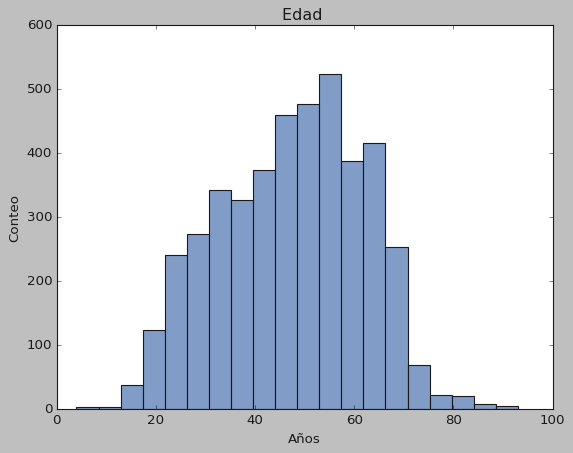

In [ ]:
ax = sns.histplot(df_numericas['edad'], bins=20, alpha=0.7)
ax.set(title="Edad ", xlabel="Años", ylabel="Conteo")
plt.style.use('classic')

####Treemap


Los treemaps son gráficos que sirven para visualizar datos jerárquicos usando figuras (normalmente rectángulos) anidadas, en este caso nos ayudan para poder ver las relaciones que se tienen y nos resulte mas facil comprenderlas



Visualización de Organigramas: Los treemaps pueden representar la estructura organizativa de una empresa.
Análisis Financiero: Se pueden utilizar para visualizar la distribución de ingresos, gastos y activos.
Exploración de Directorios: En sistemas de archivos, los treemaps pueden mostrar la estructura de directorios y el espacio utilizado.

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
df_grouped = df.groupby('edad')[['sueno_hrs', 'act_total']].max()

df_grouped.head()

,sueno_hrs,act_total
edad,,
4,2,540
8,5,540
9,4,660
12,1,570
14,3,420


In [ ]:
df_grouped['count'] = 1

In [ ]:
fig = px.treemap(df_grouped, path=['sueno_hrs','act_total'], values='count')
fig.show()

####Diagrama de dispersión por categorias

En general, un diagrama de dispersión, también conocido como gráfico de dispersión o scatter plot en inglés, es una herramienta visual que muestra la relación entre dos variables.

 En un diagrama de dispersión, cada punto representa una observación en un conjunto de datos y se ubica en un plano bidimensional con ejes x e y, donde cada eje representa una variable diferente.

 Por ejemplo, podrías tener diferentes categorías o grupos de datos y colorear los puntos en el diagrama de dispersión de acuerdo con esas categorías para destacar patrones o diferencias entre los grupos.

In [ ]:
df_grouped2 = df_drop.groupby('edad')[['act_total', 'sueno_hrs', 'imc', 'pa']].max()

In [ ]:
edad = df_grouped2[df_grouped2['imc'] == 1]

Text(0, 0.5, 'Presión Arterial')

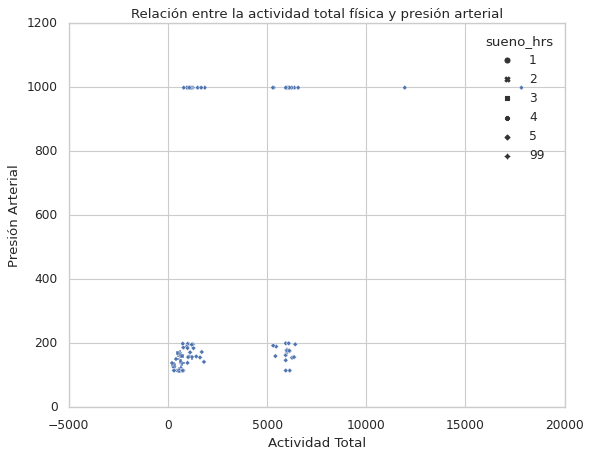

In [ ]:
sns.scatterplot(x=df_grouped2['act_total'], y=df_grouped2['pa'],style=df_grouped2['sueno_hrs']);
plt.title('Relación entre la actividad total física y presión arterial')
plt.xlabel('Actividad Total')
plt.ylabel('Presión Arterial')

####Diagrama de dispersión con variables condicionantes

 El "Diagrama de dispersión con variables condicionantes" se refiere a un tipo de gráfico de dispersión en el que se explora la relación entre dos variables, teniendo en cuenta o condicionado por una tercera variable.

En este contexto, la tercera variable actúa como un factor condicional que puede influir en la relación entre las dos variables principales.



In [ ]:
df_grouped3 = df.groupby('edad')[['sueno_hrs', 'act_total','pa']].max()

df_grouped3.head()

,sueno_hrs,act_total,pa
edad,,,
4,2,540,115
8,5,540,115
9,4,660,125
12,1,570,115
14,3,420,115


In [ ]:
df_sh = df_grouped3[df_grouped3['sueno_hrs'].isin([1,2,3,4,5])]

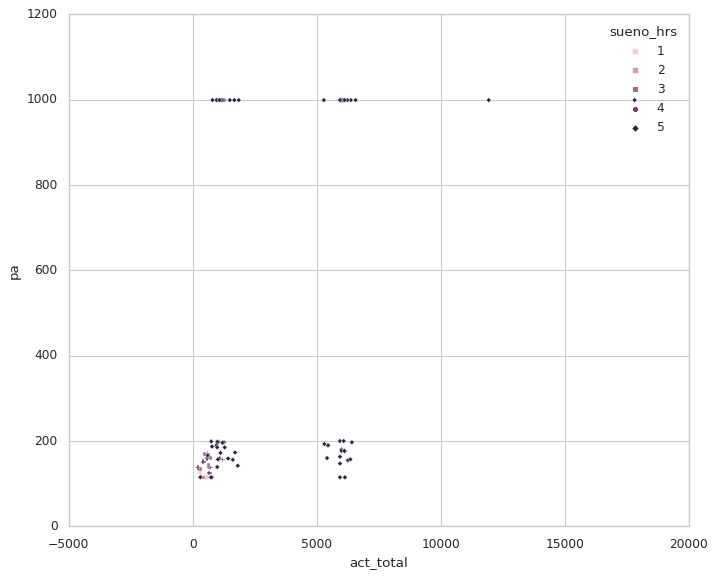

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.scatterplot(x=df_sh['act_total'], y=df_sh['pa'], hue=df_sh['sueno_hrs'], style=df_sh['sueno_hrs'], ax=ax);

####Binnings hexagonales


El término "Binnings Hexagonales" se refiere a una técnica de visualización que combina la idea de binnings (agrupaciones) con hexágonos para representar la densidad o distribución de datos espaciales.

 Es comúnmente utilizado en visualizaciones de datos geoespaciales, donde la información se agrupa en hexágonos en lugar de cuadrados (como se hace en los binnings tradicionales).

La idea principal detrás de los binnings hexagonales es proporcionar una representación más suave y estéticamente agradable de la densidad de puntos en un mapa. Cada hexágono actúa como un bin que contiene y representa la cantidad de puntos o la intensidad de algún valor en esa área específica del mapa.

<Figure size 640x480 with 0 Axes>

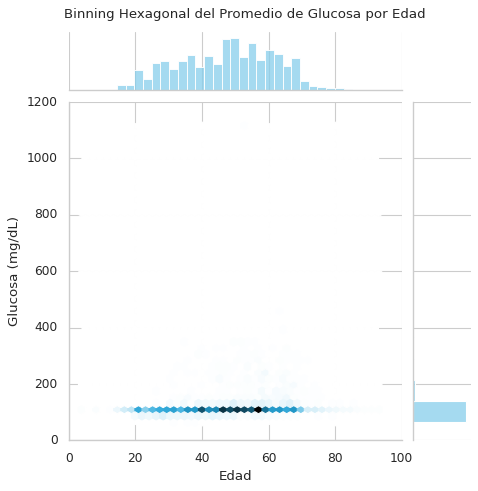

In [ ]:

plt.figure(figsize=(8, 6))
sns.jointplot(x=df_numericas['edad'], y=df_numericas['glc_prom'], kind='hex', color='skyblue')

# Configurar título y etiquetas de los ejes
plt.suptitle("Binning Hexagonal del Promedio de Glucosa por Edad", y=1.02)
plt.xlabel("Edad")
plt.ylabel("Glucosa (mg/dL)")

# Mostrar el gráfico
plt.show()

####Graficas de barras apiladas

El término "gráficas de barras apiladas" se refiere a un tipo de gráfico de barras que muestra múltiples series de datos apiladas una encima de la otra en lugar de colocarse de forma lateral.

Cada barra en la gráfica representa una categoría o punto de datos, y las diferentes secciones apiladas dentro de cada barra representan diferentes partes o subcategorías de la totalidad.

Este tipo de gráfico es útil para comparar la relación entre las partes y el todo en varias categorías. La altura total de cada barra representa la suma de los valores en todas las subcategorías.

Primero graficaremos la frecuencia de las horas de sueño que hemos analizado anteriormente. Queremos ver cuántas veces aparece cada uno en nuestro dataset para compararlos.

In [ ]:
df_binario = df_drop.copy()

In [ ]:
mapeo_sexo = {'M': 1, 'F':2}
mapeo_riesgo = {'No':0, 'Si':1}
df_binario['sexo'] = df_binario['sexo'].replace(mapeo_sexo)
df_binario['riesgo_hta'] = df_binario['riesgo_hta'].replace(mapeo_riesgo)
df_binario

,sexo,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,...,ferritina,folato,hc,prc,tf,pa,sueno_hrs,imc,act_total,riesgo_hta
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.9,0.02,1.1,107,4,32.889389,120,1
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,2.7,23.4,4.9,0.02,1.1,104,2,1.000000,240,0
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.9,0.02,1.1,105,1,1.000000,480,0
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,2.7,23.4,4.9,0.02,1.1,117,5,26.265339,275,1
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,2.7,23.4,4.9,0.02,1.1,123,2,1.000000,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2,62,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.9,0.02,1.1,125,4,1.000000,280,0
4359,1,39,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.9,0.02,1.1,130,4,19.193721,780,0
4360,2,69,15.9,11,2.9,1.9,21,44.0,74,0.34,...,2.7,23.4,4.9,0.02,1.1,147,4,1.000000,300,0
4361,1,67,17.6,14,5.5,4.0,44,96.0,171,0.80,...,2.7,23.4,4.9,0.02,1.1,108,2,1.000000,240,0


In [ ]:
df_binario = df_binario.astype({"sexo":'int',"riesgo_hta":'int'})

In [ ]:
df_grouped4 = df_binario.groupby('edad')[['sueno_hrs', 'sexo']].max()

df_grouped4.head()

,sueno_hrs,sexo
edad,,
4,2,2
8,5,1
9,4,2
12,1,2
14,3,1


In [ ]:
df_numericas['sueno_hrs'].unique()

array([ 4,  2,  1,  5,  3, 99])

In [ ]:
df_sh = df_grouped4[df_grouped4['sueno_hrs'].isin([1,2,3,4,5])]

In [ ]:
value_counts_all = df_sh['sueno_hrs'].value_counts()

value_counts_all

5    65
4     7
3     5
1     2
2     1
Name: sueno_hrs, dtype: int64

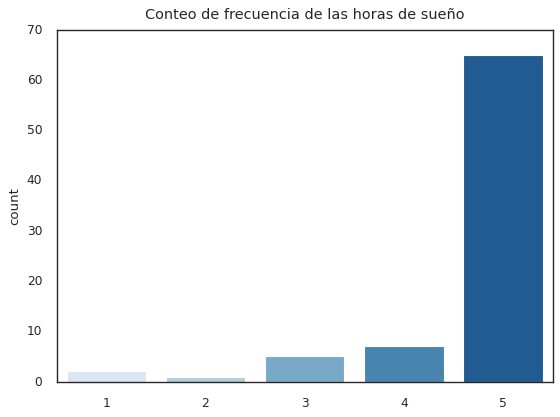

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=value_counts_all.index, y=value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de las horas de sueño', fontsize=13, pad=10);

In [ ]:
df_grouped4['count'] = 1

df_grouped4.head()

,sueno_hrs,sexo,count
edad,,,
4,2,2,1
8,5,1,1
9,4,2,1
12,1,2,1
14,3,1,1


In [ ]:
df_sh_with_count = df_grouped4[df_grouped4['sueno_hrs'].isin([1,2,3,4,5])]
df_sh_with_count

,sueno_hrs,sexo
edad,,
4,2,2
8,5,1
9,4,2
12,1,2
14,3,1
...,...,...
88,5,2
90,4,2
91,3,2


In [ ]:
value_counts = df_sh_with_count.groupby(['sueno_hrs', 'sexo'])['count'].sum()

value_counts

sueno_hrs  sexo
1          2        2
2          2        1
3          1        1
           2        4
4          1        1
           2        6
5          1        1
           2       64
Name: count, dtype: int64

In [ ]:
value_counts = value_counts.unstack(1)

value_counts

sexo,1,2
sueno_hrs,,
1,NaN,2.0
2,NaN,1.0
3,1.0,4.0
4,1.0,6.0
5,1.0,64.0


In [ ]:
value_counts = value_counts.fillna(0)
value_counts

sexo,1,2
sueno_hrs,,
1,0.0,2.0
2,0.0,1.0
3,1.0,4.0
4,1.0,6.0
5,1.0,64.0


In [ ]:
value_counts.index

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='sueno_hrs')

In [ ]:
value_counts.count()

sexo
1    5
2    5
dtype: int64

<ipython-input-495-ce027f3b5fea>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



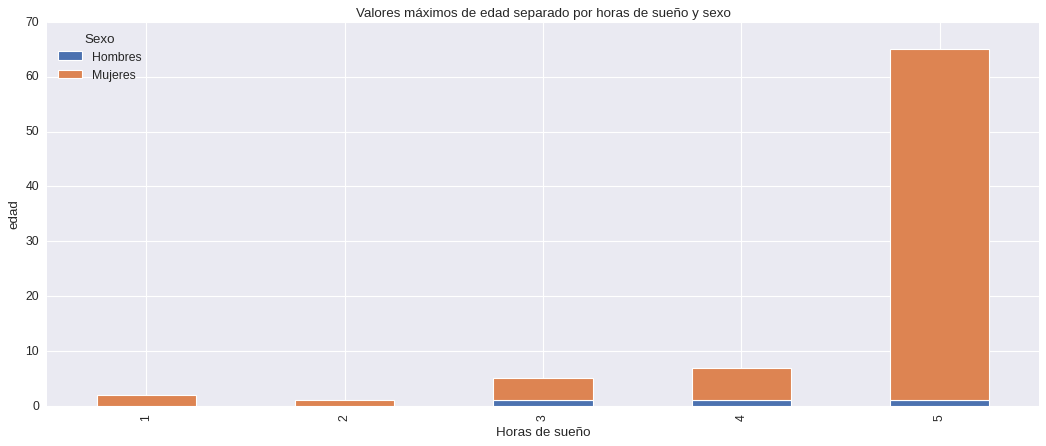

In [ ]:
# Configuración de estilo
plt.style.use('seaborn-darkgrid')

# gráfico de barras apiladas
ax=value_counts.plot(kind='bar', stacked=True, figsize=(16, 6))

# Agregar etiquetas y título
plt.xlabel('Horas de sueño')
plt.ylabel('edad')
plt.title('Valores máximos de edad separado por horas de sueño y sexo')
etiquetas_color = ['Hombres', 'Mujeres']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, etiquetas_color, title='Sexo', loc='upper left')
# Mostrar el gráfico
plt.show()

###2.7 Procesamiento de Lenguaje Natural
- Aplicar los conceptos de Procesamiento de Lenguaje Natural aprendidos en esta sesión a nuestro proyecto



Debido a que no tenemos un dataset con datos no estructurados, utilizaremos un dataset que encontramos en la plataforma de kaggle, el cual se llama [Amazon Sales Dataset](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)

Se utilizó la biblioteca pandas de Python para leer el archivo CSV desde una URL y cargarlo en un DataFrame. No se utilizó el dataset desde Kaggle, preferimos descargarlo y almacenarlo en un repositorio público en github.

In [ ]:
import pandas as pd
df_pln = pd.read_csv("https://raw.githubusercontent.com/lizbeth-cortes/Data_science/main/amazon.csv", index_col=0)
df_pln

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
product_id,,,,,,,,,,,,,,,
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri..."

Despues de tener la base ya cargada agrupamos los siguientes valores

In [ ]:
grouped_by_product_name = df_pln.groupby('product_name')['category'].max()

grouped_by_product_name

product_name
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!                                                                                                                        Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!                                                                                                     Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor                                                Electronics|WearableTechnology|SmartWatches
10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox    Electronics|HomeTheat

Juntando los datos anteriores podemos ver cuales tienen el costo mas bajo o alto dependiendo el tipo de articulo que estemos buscando


Despues de que ya tenemos nuestros datos separados hay que limpiarlos un poco


In [ ]:
grouped_by_product_name = grouped_by_product_name.str.replace(r'\|',' ',regex=True)
grouped_by_product_name = grouped_by_product_name.str.replace('&', ' and ',regex=True)
grouped_by_product_name = grouped_by_product_name.str.lower()
grouped_by_product_name = grouped_by_product_name.str.strip()
grouped_by_product_name = grouped_by_product_name.str.replace('[^\w\s,]', ' ', regex=True)
grouped_by_product_name = grouped_by_product_name.str.replace('\d', '',regex=True)
grouped_by_product_name = grouped_by_product_name.str.replace('\\n', '',regex=True)
grouped_by_product_name = grouped_by_product_name.dropna()

grouped_by_product_name

product_name
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!                                                                                                                        home and kitchen heating,cooling and airqualit...
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!                                                                                                     home and kitchen heating,cooling and airqualit...
10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor                                                electronics wearabletechnology smartwatches
10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox    electronics hometheat

#### Regex
Usaremos expresiones regulares como patrones para buscar y manipular cadenas de texto.

In [ ]:
# Buscar una palabra en un texto
grouped_by_product_name[grouped_by_product_name.str.contains('electronic', case=False)]

product_name
10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor                                                electronics wearabletechnology smartwatches
10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox    electronics hometheater,tv and video accessori...
7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys                                                         electronics hometheater,tv and video accessori...
7SEVEN® Bluetooth Voice Command Remote for Xiaomi Redmi Mi Smart TV with Netflix & Prime Video Hot Keys XMRM-00A                                                                                            electronics hometheat

In [ ]:
# Textos que comiencen con la palabra 'Computers'
grouped_by_product_name[grouped_by_product_name.str.contains('^Home', case=False)]

product_name
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!                                                                                                                   home and kitchen heating,cooling and airqualit...
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!                                                                                                home and kitchen heating,cooling and airqualit...
3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)    home and kitchen craftmaterials scrapbooking tape
4 in 1 Handheld Electric Vegetable Cutter Set,Wireless Food Processor Electric Food Chopper for Garlic Chili Pepper Onion Ginger Celery Meat with Brush                                                home and kitchen kitchen and homeapplianc

In [ ]:
# Textos que contengan las palabras 'man' y/o 'woman' en singular y plural
grouped_by_product_name[grouped_by_product_name.str.contains('wom[ae]n|m[ae]n', case=False)]

product_name
Airtel Digital TV HD Set Top Box with 1 Month Basic Pack with Recording + Free Standard Installation                                                                                                       electronics hometheater,tv and video satellite...
Airtel Digital TV HD Set Top Box with FTA Pack | Unlimited Entertainment + Recording Feature + Free Standard Installation (6 Months Pack)                                                                  electronics hometheater,tv and video satellite...
Boya ByM1 Auxiliary Omnidirectional Lavalier Condenser Microphone with 20ft Audio Cable (Black)                                                                                                                     musicalinstruments microphones condenser
Dr Trust Electronic Kitchen Digital Scale Weighing Machine (Blue)                                                                                                                                          health and personalcare h

#### Nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Separamos cada oración en palabras
tokenized = grouped_by_product_name.apply(nltk.word_tokenize)
tokenized

product_name
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!                                                                                                                        [home, and, kitchen, heating, ,, cooling, and,...
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!                                                                                                     [home, and, kitchen, heating, ,, cooling, and,...
10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor                                            [electronics, wearabletechnology, smartwatches]
10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox    [electronics, homethe

In [ ]:
# Sumamos todas las listas para obtener una lista con todas las palabras en nuestro conjunto de datos
# Creamos un objeto Text

all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: home and kitchen heating , cooling and airquality...>

In [ ]:
# Utilizando concordance para encontrar ocurrencias de 'kitchen'
text.concordance('kitchen', lines=20)

Displaying 20 of 757 matches:
home and kitchen heating , cooling and airquality ro
ity roomheaters fanheaters home and kitchen heating , cooling and airquality ro
ies notepads and memobooks home and kitchen craftmaterials scrapbooking tape ho
aterials scrapbooking tape home and kitchen kitchen and homeappliances smallkit
 scrapbooking tape home and kitchen kitchen and homeappliances smallkitchenappl
accessories remotecontrols home and kitchen heating , cooling and airquality fa
irquality fans ceilingfans home and kitchen heating , cooling and airquality wa
eysers instantwaterheaters home and kitchen kitchen and homeappliances vacuum ,
nstantwaterheaters home and kitchen kitchen and homeappliances vacuum , cleanin
are vacuums wet dryvacuums home and kitchen kitchen and homeappliances vacuum ,
ums wet dryvacuums home and kitchen kitchen and homeappliances vacuum , cleanin
s and adapters otgadapters home and kitchen kitchen and homeappliances smallkit
apters otgadapters home and kitchen k

In [ ]:
# Utilizando similar para encontrar palabras similares a 'accessories'
text.similar('accessories')

peripherals home video memobooks choppers ironing irons pastacookers
windowcleaners sleeves sewing embroiderymachines toastersets
waterfilters purifiers externaldevices photography ceilingmounts
photostudio tripods


In [ ]:
# Total de palabras distintas
len(set(text))

372

In [ ]:
# Utilizamos FreqDist para analizar la distribución de frecuencia de nuestras palabras
all_words = tokenized.sum()
freq_dist = nltk.FreqDist(all_words)
print(freq_dist)

<FreqDist with 372 samples and 12599 outcomes>


In [ ]:
# Encontrar las 50 palabras más comunes
freq_dist.most_common(50)

[('and', 2786),
 ('accessories', 1265),
 ('kitchen', 757),
 (',', 609),
 ('electronics', 476),
 ('home', 448),
 ('computers', 375),
 ('cables', 361),
 ('homeappliances', 308),
 ('peripherals', 307),
 ('smallkitchenappliances', 181),
 ('usbcables', 161),
 ('hometheater', 154),
 ('tv', 154),
 ('video', 154),
 ('mobiles', 147),
 ('smartphones', 137),
 ('headphones', 123),
 ('heating', 116),
 ('cooling', 116),
 ('airquality', 116),
 ('irons', 97),
 ('mice', 84),
 ('vacuum', 82),
 ('cleaning', 82),
 ('ironing', 82),
 ('basicmobiles', 82),
 ('mobileaccessories', 74),
 ('televisions', 66),
 ('keyboards', 65),
 ('earbuds', 63),
 ('smarttelevisions', 60),
 ('inputdevices', 60),
 ('ear', 60),
 ('steamers', 58),
 ('wearabletechnology', 54),
 ('smartwatches', 54),
 ('in', 51),
 ('remotecontrols', 47),
 ('roomheaters', 46),
 ('waterheaters', 44),
 ('geysers', 44),
 ('vacuums', 41),
 ('laptopaccessories', 33),
 ('kettles', 32),
 ('hotwaterdispensers', 32),
 ('officeproducts', 31),
 ('chargers', 31),

#### NLP y Visualizaciones

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_pln['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [ ]:
from nltk.corpus import stopwords
tokenized = grouped_by_product_name.apply(nltk.word_tokenize)
all_words = tokenized.sum()

english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)
freq_dist.most_common(50)

[('accessories', 1265),
 ('kitchen', 757),
 (',', 609),
 ('electronics', 476),
 ('home', 448),
 ('computers', 375),
 ('cables', 361),
 ('homeappliances', 308),
 ('peripherals', 307),
 ('smallkitchenappliances', 181),
 ('usbcables', 161),
 ('hometheater', 154),
 ('tv', 154),
 ('video', 154),
 ('mobiles', 147),
 ('smartphones', 137),
 ('headphones', 123),
 ('heating', 116),
 ('cooling', 116),
 ('airquality', 116),
 ('irons', 97),
 ('mice', 84),
 ('vacuum', 82),
 ('cleaning', 82),
 ('ironing', 82),
 ('basicmobiles', 82),
 ('mobileaccessories', 74),
 ('televisions', 66),
 ('keyboards', 65),
 ('earbuds', 63),
 ('smarttelevisions', 60),
 ('inputdevices', 60),
 ('ear', 60),
 ('steamers', 58),
 ('wearabletechnology', 54),
 ('smartwatches', 54),
 ('remotecontrols', 47),
 ('roomheaters', 46),
 ('waterheaters', 44),
 ('geysers', 44),
 ('vacuums', 41),
 ('laptopaccessories', 33),
 ('kettles', 32),
 ('hotwaterdispensers', 32),
 ('officeproducts', 31),
 ('chargers', 31),
 ('networkingdevices', 30),


In [ ]:
# Conteo de una palabra y porcentaje de aparición
print(f'{(100 * freq_dist["accessories"] / len(all_words_except_stop_words)):.3f}%')

12.970%


Aqui podemos vizaulizar la frecuencia de las 20 palabras más comunes en reviews de Amazon

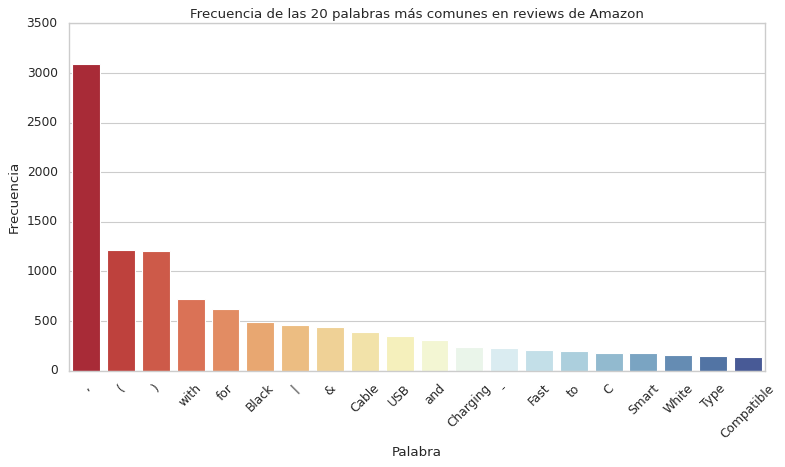

In [ ]:
from nltk import FreqDist

# Cargar el DataFrame desde el enlace
df_pln = pd.read_csv("https://raw.githubusercontent.com/lizbeth-cortes/Data_science/main/amazon.csv", index_col=0)

# Combinar todas las reseñas en un solo texto
text_data = ' product_name'.join(df_pln['product_name'].dropna().tolist())

# Tokenizar y calcular la frecuencia de las palabras
words = nltk.word_tokenize(text_data)
freq_dist = FreqDist(words)

# Obtener las 20 palabras más comunes
most_common_20 = freq_dist.most_common(20)

# Convertir a un DataFrame de pandas para facilitar la visualización
data = pd.DataFrame(most_common_20, columns=['Palabra', 'Frecuencia'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Palabra', y='Frecuencia', data=data, palette='RdYlBu')
plt.title('Frecuencia de las 20 palabras más comunes en reviews de Amazon')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización

plt.tight_layout()
plt.show()


Y aqui las 50 mas buscadas

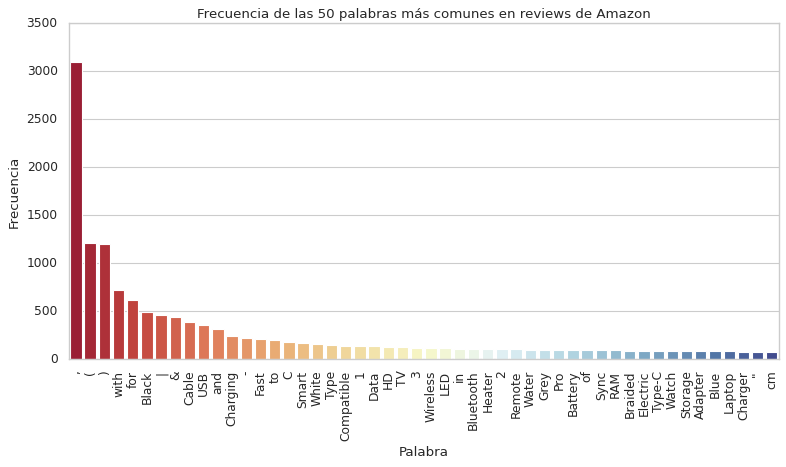

In [ ]:
# Combinar todas las reseñas en un solo texto
text_data = ' product_name'.join(df_pln['product_name'].dropna().tolist())

# Tokenizar y calcular la frecuencia de las palabras
words = nltk.word_tokenize(text_data)
freq_dist = FreqDist(words)

# Obtener las 20 palabras más comunes
most_common_50 = freq_dist.most_common(50)

# Convertir a un DataFrame de pandas para facilitar la visualización
data = pd.DataFrame(most_common_50, columns=['Palabra', 'Frecuencia'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Palabra', y='Frecuencia', data=data, palette='RdYlBu')
plt.title('Frecuencia de las 50 palabras más comunes en reviews de Amazon')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización

plt.tight_layout()
plt.show()

También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

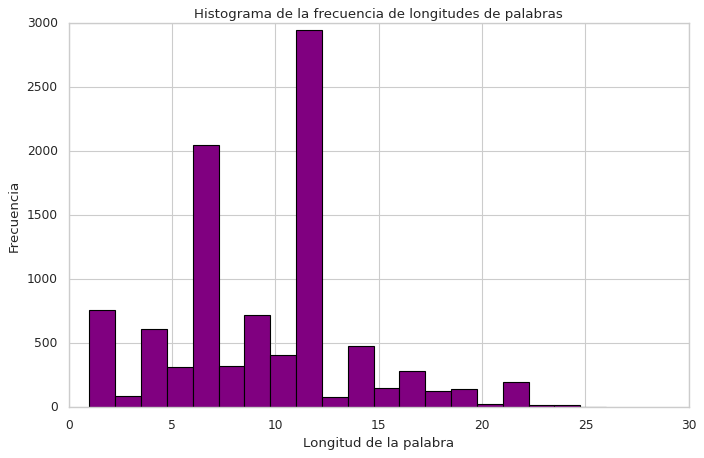

In [ ]:
word_lengths = [len(w) for w in all_words_except_stop_words]
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=20, color='purple', edgecolor='black')

# Configuración del histograma
plt.title('Histograma de la frecuencia de longitudes de palabras')
plt.xlabel('Longitud de la palabra')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

También podemos visualizar la frecuencia de los bigramas más comunes

In [ ]:
text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('and', 'accessories'): 855, ('home', 'and'): 448, ('and', 'kitchen'): 448, ('computers', 'and'): 375, ('kitchen', 'kitchen'): 309, ('kitchen', 'and'): 309, ('and', 'homeappliances'): 308, ('accessories', 'accessories'): 307, ('accessories', 'and'): 307, ('and', 'peripherals'): 307, ...})

<ipython-input-258-5cf46b050fbc>:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



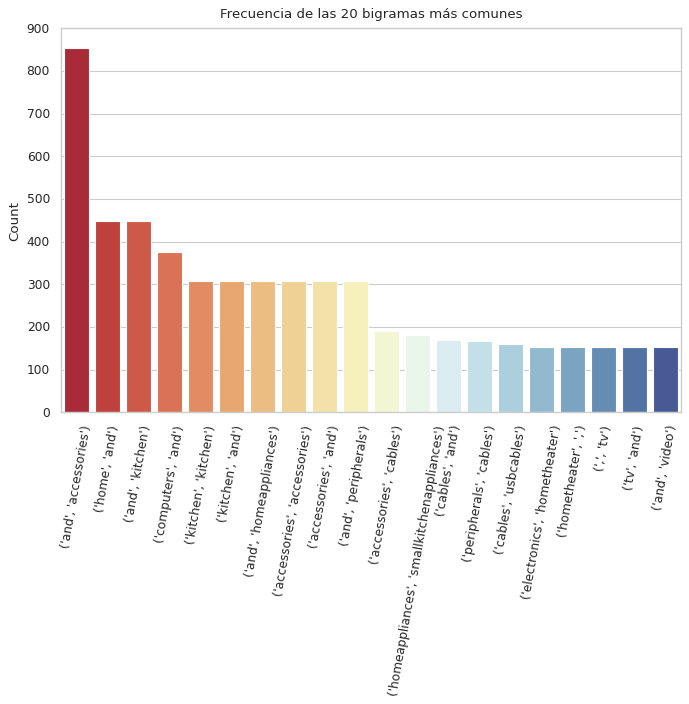

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0],y= most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

Por último vamos a generar y mostrar una nube de palabras utilizando la biblioteca WordCloud

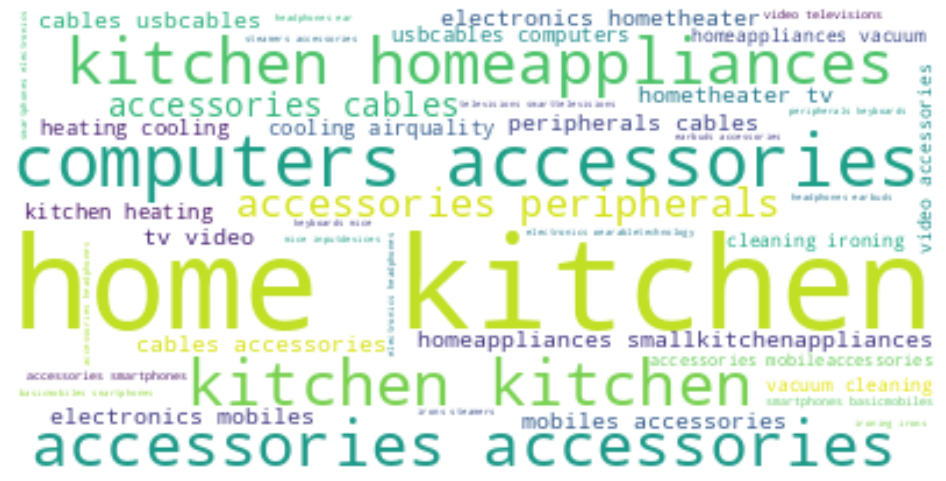

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2.8 Introducción a Machine Learning: Clasificación No Supervisada y Supervisada

####Modelo de Regresión Logística

Tenemos el dataframe df_drop con diversos parámetros de salud que permiten diagnósticar si las personas corren el riesgo de padecer hipertensión. El diagnóstico puede ser **'Si'** cuando la persona corre gran riesgo de padecer dicha enfermedad y **'No'** en caso contrario.

In [ ]:
df_drop.head(10)

,sexo,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,...,ferritina,folato,hc,prc,tf,pa,sueno_hrs,imc,act_total,riesgo_hta
0,F,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,107,4,32.889389,120,Si
1,F,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,2.7,23.4,4.90,0.02,1.1,104,2,1.000000,240,No
2,F,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,105,1,1.000000,480,No
3,M,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,2.7,23.4,4.90,0.02,1.1,117,5,26.265339,275,Si
4,F,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,2.7,23.4,4.90,0.02,1.1,123,2,1.000000,255,No
5,F,70,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,149,3,1.000000,775,No
6,F,30,13.8,15,4.6,3.8,42,84.0,139,0.65,...,44.0,10.6,6.94,2.38,1.1,119,2,39.031773,300,Si
7,F,29,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,113,3,24.741058,600,Si
8,M,58,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,102,4,25.411527,740,Si
9,F,62,14.5,9,4.4,3.8,44,133.0,236,0.66,...,2.7,23.4,4.90,0.02,1.1,111,2,1.000000,150,Si


Para esta tarea lo primero que realizamos es transformar los datos categoricos de la columna **riesgo_hta** y de la columna **sexo** a datos binarios, con el objetivo de que sean entendibles y utiles para el clasificador. Por tal motivo el diagnostico **No** se representara con el digito **0** y el diagnostico **Si** con el valor **1**.

In [ ]:
df_drop['riesgo_hta'] = df_drop['riesgo_hta'].apply(lambda x: 1 if x == 'Si' else 0)
df_drop['sexo'] = df_drop['sexo'].apply(lambda x: 1 if x == 'F' else 0)
df_drop.head(10)

,sexo,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,...,ferritina,folato,hc,prc,tf,pa,sueno_hrs,imc,act_total,riesgo_hta
0,1,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,107,4,32.889389,120,1
1,1,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,2.7,23.4,4.90,0.02,1.1,104,2,1.000000,240,0
2,1,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,105,1,1.000000,480,0
3,0,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,2.7,23.4,4.90,0.02,1.1,117,5,26.265339,275,1
4,1,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,2.7,23.4,4.90,0.02,1.1,123,2,1.000000,255,0
5,1,70,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,149,3,1.000000,775,0
6,1,30,13.8,15,4.6,3.8,42,84.0,139,0.65,...,44.0,10.6,6.94,2.38,1.1,119,2,39.031773,300,1
7,1,29,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,113,3,24.741058,600,1
8,0,58,14.2,22,4.8,4.0,34,86.0,139,0.58,...,2.7,23.4,4.90,0.02,1.1,102,4,25.411527,740,1
9,1,62,14.5,9,4.4,3.8,44,133.0,236,0.66,...,2.7,23.4,4.90,0.02,1.1,111,2,1.000000,150,1


A continuación estandarizamos todos los datos del dataframe a tipo float para posteriormente utilizar estos parametros de salud como datos de entrenamiento.

In [ ]:
df_drop = df_drop.astype({"sexo":'float',"edad":'float', "temp_amb":'float', "c_hdl":'float', "c_total":'float', "tg":'float', "glc_prom":'float',"pa":'float', "sueno_hrs":'float', "act_total":'float' })

Posteriormente eliminamos del conjunto de entrenamiento la columna "riesgo_hta", debido a que los datos de esta columna se utilizaran posteriormente como datos de prueba para el clasificador.

In [ ]:
X = df_drop.drop(columns=['riesgo_hta'])
y = df_drop['riesgo_hta']

La variable ***X*** nos muestra el conjunto de datos de entrenamiento, que corresponde a todos los parametros de salud que permiten determinar el riesgo de padecer hipertensión.

In [ ]:
X

,sexo,edad,conc_hgb,temp_amb,urac,alb,c_hdl,c_ldl,c_total,cr,...,hgb_gluc,ferritina,folato,hc,prc,tf,pa,sueno_hrs,imc,act_total
0,1.0,41.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,5.2,2.7,23.4,4.9,0.02,1.1,107.0,4.0,32.889389,120.0
1,1.0,65.0,14.1,9.0,4.4,3.8,73.0,130.0,252.0,0.62,...,6.2,2.7,23.4,4.9,0.02,1.1,104.0,2.0,1.000000,240.0
2,1.0,68.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,5.2,2.7,23.4,4.9,0.02,1.1,105.0,1.0,1.000000,480.0
3,0.0,35.0,15.7,11.0,6.5,4.1,49.0,107.0,203.0,0.91,...,5.3,2.7,23.4,4.9,0.02,1.1,117.0,5.0,26.265339,275.0
4,1.0,65.0,12.7,7.0,4.2,4.2,41.0,76.0,145.0,0.71,...,7.0,2.7,23.4,4.9,0.02,1.1,123.0,2.0,1.000000,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,1.0,62.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,5.2,2.7,23.4,4.9,0.02,1.1,125.0,4.0,1.000000,280.0
4359,0.0,39.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,5.2,2.7,23.4,4.9,0.02,1.1,130.0,4.0,19.193721,780.0
4360,1.0,69.0,15.9,11.0,2.9,1.9,21.0,44.0,74.0,0.34,...,5.3,2.7,23.4,4.9,0.02,1.1,147.0,4.0,1.000000,300.0
4361,0.0,67.0,17.6,14.0,5.5,4.0,44.0,96.0,171.0,0.80,...,5.3,2.7,23.4,4.9,0.02,1.1,108.0,2.0,1.000000,240.0


La variable ***y*** nos muestra el conjunto de datos de prueba que han sido etiquetados previamente por un experto de salud.

Recordando que la categoria 1 alude al diagnostico de riesgo positivo, y el 0 indica riesgo negativo.

In [ ]:
y

0       1
1       0
2       0
3       1
4       0
       ..
4358    0
4359    0
4360    0
4361    0
4362    0
Name: riesgo_hta, Length: 4363, dtype: category
Categories (2, int64): [0, 1]

En esta parte realizamos la importación de las librerias a utilizar, las cuales corresponden al tipo de modelo de clasificación a evaluar.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Antes de entrenar al clasificador debemos indicarle que datos y que cantidad de ellos seran utilizados como datos de entrenamiento y prueba. En este caso espcificamos que el 30% deberan ser utilizados como prueba y el 70% como entrenamiento.

Despues especificamos el modelo a utilizar y el numero de interacciones que se realizaran en el entrenamiento.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Ya que tenemos el modelo definido realizamos predicciones utilizando el conjunto de prueba

In [ ]:
y_pred = logisticRegr.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

Obtenemos la puntuacion de la exactitud promedio alcanzada con el modelo seleccionado.

La exactitud promedio puede encontrarse en un intervalo entre 0 y 1, donde 1 es una 'exactitud perfecta'. Sin embargo de acuerdo con nuestros resultados el modelo logra un buen desempeño de clasificación igual a 0.83 para la tarea en cuestión, pero no es perfecto. Lo que nos indica que resenta algunas dificultades para diferenciar a que clase pertenecen algunos datos.

In [ ]:
logisticRegr.score(X_test, y_test)

0.8334606569900688

#### Matriz de confusión

La Matriz de confusión es una matriz de 2x2, donde el eje x representa los resultados estimados por el modelo y el eje y representa la realidad (la clasificación que ya ha sido realizada en el dataset de prueba).

Este tipo de matriz cuenta con dos valores posibles: negativo y positivo. **Negativo** es la clasificación 0, el 'no'. **Positivo** es la clasificación 1, el sí (en nuestro ejemplo, positivo significa: 'riesgo de padecer hipertensión').

Dependiendo de cuál es la etiqueta real (la que sabemos que es cierta) y cuál fue la que nuestro modelo estimó, hay 4 posibles categorías:


*   **Verdadero Positivo** (VP): Cuando la etiqueta real era positiva y nuestro modelo regresó un resultado positivo.
*   **Falso Negativo** (FN): Cuando la etiqueta real era positiva pero nuestro modelo regresó un resultado negativo.
*   **Falso Positivo** (FP): Cuando la etiqueta real era negativa pero nuestro modelo regresó un resultado positivo.
*   **Verdadero Negativo** (VN): Cuando la etiqueta real era negativa y nuestro modelo regresó un resultado negativo.

Primero importamos la libreria que nos permitira obtener las metricas de una matriz de confusión previamente descritas.

In [ ]:
from sklearn import metrics

Debido a que previamnete ya entrenamos el modelo de clasificación, ahora generamos la matriz de confusión que recibe de parametros las etiquetas de entrenamiento y las etiquetas predichas por el clasificador.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[292, 172],
       [ 63, 782]])

Definimos las caracteristicas graficas de la matriz de confusón a crear.

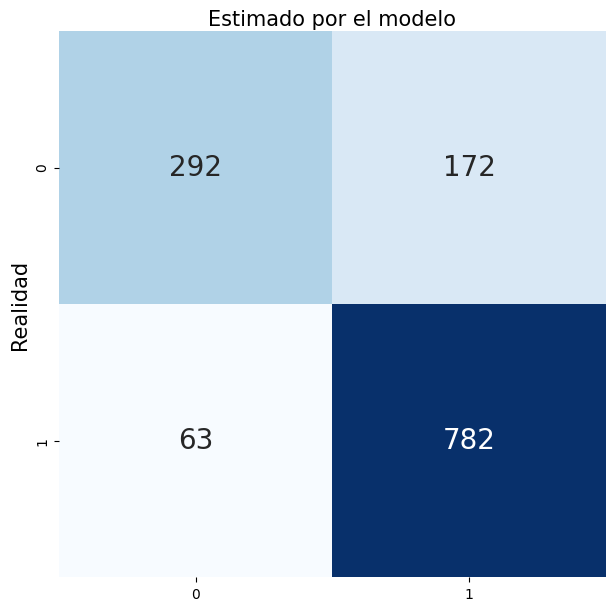

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

##### Precisión

**Precisión**: De todas las clasificaciones positivas que hicimos, ¿cuántas de ésas eran en realidad positivas?

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8197064989517819


##### Exactitud

**Exactitud**: Del total de clasificaciones que hicimos, ¿cuántas fueron clasificadas correctamente?

In [ ]:
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

Exactitud: 0.8204736440030558


##### Sensibilidad

**Sensibilidad**: De todas las clasificaciones positivas que había en realidad, ¿cuántas fueron clasificadas correctamente como positivas?

In [ ]:
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))

Sensibilidad: 0.9254437869822485


##### Especificidad

**Especificidad**: De todas las clasificaciones negativas que había en realidad, ¿cuántas fueron clasificadas correctamente como negativas?

In [ ]:
print("Especificidad:", tn / (tn + fp))

Especificidad: 0.6293103448275862


#### Curva ROC / AUC

La curva ROC grafica el cambio en la proporción de Verdaderos Positivos contra la proporción de Falsos Positivos a través de diferentes umbrales.

El área debajo de la curva, es toda el área que se encuentra por debajo de la curva ROC. Podemos tener un valor entre 0 y 1.

In [ ]:
y_pred_proba = logisticRegr.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.27034456, 0.72965544],
       [0.49502206, 0.50497794],
       [0.64105217, 0.35894783],
       [0.75048894, 0.24951106],
       [0.08148039, 0.91851961],
       [0.08593695, 0.91406305],
       [0.06103411, 0.93896589],
       [0.11247199, 0.88752801],
       [0.06195724, 0.93804276],
       [0.13872691, 0.86127309]])

Importamos la librería necesaria para la curva ROC y el área bajo la curva.

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

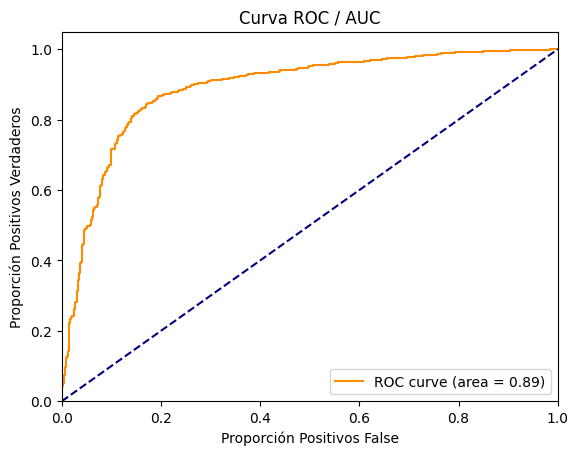

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Como era de esperarse, nuestro valor AUC es muy cercano al 1 (0.89). Esto significa que nuestro modelo puede diferenciar casi a la perfección entre negativos y positivos, y aunque muestra algunas deficiencias es muy probable que elija la clasificación correcta en la mayoria de los casos.